<p style="font-size: 10px; color: #666; text-align: right;">
Rova Ralaimidona · <a href="mailto:irova.com">irova@me.com</a>
</p>

<div style="
    background-color: #FADADD;
    color: #1E1E1E;
    padding: 15px;
    border-radius: 10px;
    font-size: 24px;
    font-weight: bold;
    text-align: center;
    margin-bottom: 20px;">
     Audit qualité des données Cartofriches – Phase EDA & Nettoyage
</div>

## 📌 Objectif  
Cartofriche est une application recenssant les données des friches en France, celle ci se présentent sous deux formes, une carte interactive affichant:  
• la liste des friches par zones et leur statuts avec projets en cours ou non. avec 14 986 données complétées. et des donnees interactives textuelles complétant les informations.  
• Les données agrégées sous forme de tableau contenant 28115 lignes.  
• Et enfin les données issues des différents observatoires. 7239 lignes  

L'objectif de ce Notebook est de travailler sur la qualités des données, leur complétude les valeurs manquantes les doublons, et afin de préparer les données éventuellement pour les analyses statistiques et pour la modélisation.
De comprendre les incohérences entre les quantités de données entre la carte et les tableaux.

Problématique comment la qualité des données affecte l'éxpérience utilisateur et la pertinence de l'utilisation de l'application?

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML, display

# Données simulées pour chaque KPI (à remplacer par tes vraies métriques)
kpi_scores = {
    "Complétude": 60.8,
    "Validité": 40.2,
    "Unicité": 22.1,
    "Criticité": 12.2,
    "Actualité": 91,
    "Pertinence": 32.9
}

# Couleurs pastel personnalisées
colors = {
    "Complétude": ["#AEDFF7", "#FFD3B6"],
    "Validité": ["#77DD77", "#FFB347"],
    "Unicité": ["#A8DADC", "#FFB5A7"],
    "Criticité": ["#FF6F61", "#C1F0F6"],
    "Actualité": ["#CBAACB", "#FFDAC1"],
    "Pertinence": ["#B5EAD7", "#FF9AA2"]
}

# Création d’un subplot 2x3
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"}]*3]*2,
    subplot_titles=[f"{k} : {v:.1f}%" for k, v in kpi_scores.items()]
)

# Placement des graphes
positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
for (kpi, score), (r, c) in zip(kpi_scores.items(), positions):
    fig.add_trace(go.Pie(
        labels=["Valide", "Non valide"] if kpi != "Criticité" else ["Doublons", "Uniques"],
        values=[score, 100 - score],
        hole=0.5,
        marker_colors=colors[kpi],
        textinfo="none"
    ), row=r, col=c)

fig.update_layout(
    height=600,
    width=1000,
    title_text=" Vue d'ensemble des indicateurs de qualité des données",
    showlegend=False,
    margin=dict(t=80, l=40, r=40, b=40),
    font=dict(size=13)
)

HTML(fig.to_html(full_html=False, include_plotlyjs='cdn'))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings
import plotly.io as pio
import plotly.io as pio
pio.renderers.default = "notebook" 
warnings.filterwarnings('ignore')
%matplotlib inline 


# Chargement des données
df = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/74feb3ed-5f9f-4ef8-8fab-b0128d569a99", sep=";", low_memory=False)

print(f"{df.shape[0]} lignes chargées — {df.shape[1]} colonnes")
df.head()

28115 lignes chargées — 50 colonnes


site_id           site_nom            site_type       site_adresse  \
0  61214_34555  rue de la garenne     friche d'habitat                NaN   
1  57097_23384           Sotralec  friche industrielle                NaN   
2  93027_35701        93027_35701                autre                NaN   
3  80126_24311        80126_24311                mixte  RUE DE ST ETIENNE   
4  61386_34635        Les Futiaux     friche d'habitat                NaN   

  site_identif_date site_actu_date site_url  site_ademe_url site_securite  \
0        2025-03-05     2025-03-05      NaN             NaN           NaN   
1        2022-01-01     2022-01-01      NaN             NaN           NaN   
2        2025-04-07     2025-04-07      NaN             NaN           NaN   
3        2023-08-17     2023-08-17      NaN             NaN       inconnu   
4        2024-08-13     2024-08-13      NaN             NaN           NaN   

  site_occupation  ... urba_zone_formdomi  urba_doc_type  desserte_distance  \
0         inconnu  ...                NaN           PLUI                NaN   
1         inconnu  ...                NaN           PLUI                NaN   
2         inconnu  ...                NaN           PLUI                NaN   
3         inconnu  ...                NaN            NaN                NaN   
4         inconnu  ...                NaN           PLUI                NaN   

  desserte_commentaire             source_nom  \
0                  NaN          EPF Normandie   
1                  NaN          EPF Grand Est   
2                  NaN  Institut Paris Région   
3                  NaN        DDT de la Somme   
4                  NaN          EPF Normandie   

                                          source_url source_producteur  \
0                                                NaN     EPF Normandie   
1  https://www.data.gouv.fr/fr/datasets/observato...     EPF Grand Est   
2                                                NaN               IPR   
3                                                NaN            DDT 80   
4                                                NaN     EPF Normandie   

  source_contact                   geompoint geomsurf  
0            NaN  POINT (0.6256966 48.76207)      NaN  
1            NaN    POINT (6.49563 49.17622)      NaN  
2            NaN   POINT (2.413969 48.93915)      NaN  
3            NaN    POINT (1.60458 49.94721)      NaN  
4            NaN  POINT (0.4367191 48.79385)      NaN  

[5 rows x 50 columns]

###  Problématiques identifiées sur la qualité
- Présence importante de valeurs manquantes ou ambigües, nécessitant un travail de clarification et de normalisation.
- Vocabulaire redondant, notamment l’usage fréquent de catégories comme "Autres", à normaliser.
- Noms de colonnes parfois longs ou peu explicites, à harmoniser pour une meilleure lisibilité.
- Incohérences dans les types de données et la structure des valeurs, à corriger dès l’audit qualité.
- Plusieurs colonnes sont quasiment vides : un arbitrage est à faire entre suppression et enrichissement.
- Origine de certaines valeurs floue : une documentation précise est indispensable.
- Corrélations possibles entre certaines variables : des visualisations croisées sont à prévoir.

###  Feuille de route prévisionnelle
Données gouvernementales (friches-standard.csv)
- les valeurs manquantes
- doublons à vérifier  par subset
- unifomisation des features et des types, uniformisation de la casse
- enrichissement des données : croisement  datasets gouvernementales avec datasets des observatoires
- enrcichissement scrapping gpkg (données textuelles sur l'api?)
- enrichissement avec données textuelles
- enrichissement avec données externes ex( données toxicologiques)
- analyse statistique descriptive et analyse sur l'équilibre des données
- focus sur les variables pertinents pour la mutabilité



## 🧩 Description des jeux de données
les données cartofriche sont issues de data.gouv,
Le dataset comprend les données issues:  
• des données gouvernementales  
• les données issues des observatoires

Le jeu de donnée gouvernementale comprend 50 colonnes
'Afin de constituer une base nationale de pré-recensement des friches, le Cerema s'est appuyé sur deux sources de données :

**BASOL** est une base de données nationale sur les sites et sols potentiellement pollués appelant une action des pouvoirs publics, produites par le Ministère de la Transition Ecologique ; les données utilisées sont issues du travail de consolidation de la base réalisé par le collectif Lou Dupont, et diffusé sur data.gouv.fr ;  
**BASIAS** est une base de données de l’inventaire historique des sites industriels et activités de service, produites par le Ministère de la Transition Ecologique et le BRGM ;  les données utilisées sont également issues du travail de consolidation de la base réalisé par le collectif Lou Dupont, et diffusé sur data.gouv.fr.'  

__ref__ https://artificialisation.developpement-durable.gouv.fr/agir-et-etre-accompagne/cartofriches/donnees-utilisees

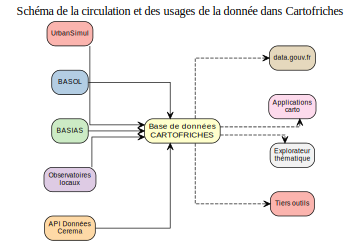

In [3]:
from graphviz import Digraph
from IPython.display import SVG, display
import plotly.express as px
import re

# 0. Palette pastel de Plotly (convertir rgb() en hex)
def rgb_to_hex(s):
    nums = list(map(int, re.findall(r'\d+', s)))
    return '#{:02x}{:02x}{:02x}'.format(*nums)

raw_palette = px.colors.qualitative.Pastel1
pastel_palette = [
    rgb_to_hex(c) if c.startswith('rgb') else c
    for c in raw_palette
]

# 1. Liste de tous les nœuds
nodes = [
    'UrbanSimul', 'BASOL', 'BASIAS', 'Observatoires',
    'APICerema', 'CARTOFRICHES',
    'data_gouv', 'AppsCarto', 'Explorateur', 'TiersOutils'
]
# 2. Associer chaque nœud à une couleur pastel
color_sequence = (pastel_palette * ((len(nodes) // len(pastel_palette)) + 1))[:len(nodes)]
color_map = dict(zip(nodes, color_sequence))

# --- Construction du Digraph avec espacement augmenté ---
dot = Digraph('Cartofriches', format='svg')
dot.attr(size="5,5!")              # Large et pas trop haut
dot.attr(rankdir='LR',              # De gauche à droite
         splines='ortho',
         nodesep='0.5',             # Espacement horizontal plus serré
         ranksep='1')             # Espacement vertical réduit
dot.attr('node', shape='box', style='filled,rounded', fontname='Helvetica', fontsize='10')
dot.attr(
    label="Schéma de la circulation et des usages de la donnée dans Cartofriches",
    labelloc='t',
    fontsize='18'
)

# ... (ajout des nœuds et arêtes)


# Noeuds sources (gauche)
labels_src = {
    'UrbanSimul': 'UrbanSimul',
    'BASOL': 'BASOL',
    'BASIAS': 'BASIAS',
    'Observatoires': 'Observatoires\nlocaux',
    'APICerema': 'API Données\nCerema'
}
for name, label in labels_src.items():
    dot.node(name, label, fillcolor=color_map[name])

# Noeud central
dot.node('CARTOFRICHES',
         'Base de données\nCARTOFRICHES',
         fillcolor=color_map['CARTOFRICHES'],
         fontsize='12')

# Noeuds outputs (droite)
labels_out = {
    'data_gouv': 'data.gouv.fr',
    'AppsCarto': 'Applications\ncarto',
    'Explorateur': 'Explorateur\nthématique',
    'TiersOutils': 'Tiers outils'
}
for name, label in labels_out.items():
    dot.node(name, label, fillcolor=color_map[name])

# Arêtes solides : sources → Cartofriches
for src in labels_src:
    dot.edge(src, 'CARTOFRICHES', style='solid', arrowhead='vee')

# Arêtes pointillées : Cartofriches → outputs
for tgt in labels_out:
    dot.edge('CARTOFRICHES', tgt, style='dashed', arrowhead='vee')

# Affichage inline en SVG
svg_bytes = dot.pipe(format='svg')
display(SVG(svg_bytes))

ref: https://artificialisation.developpement-durable.gouv.fr/agir-et-etre-accompagne/cartofriches/donnees-utilisees

### Visualisation des origines des données 

Le graphique ci-dessous illustre les liens entre les principales **sources de données** (ex. ADEME, UrbanSIMUL, BASOL) et les **variables du jeu de données**.

Chaque lien correspond à une colonne, colorée selon son **domaine thématique** (pollution, urbanisme, bâti, etc.).  
L’objectif est d’assurer la **traçabilité des variables**, d’anticiper les croisements possibles, et de repérer les éventuels doublons ou chevauchements.  
🧩 **Remarques complémentaires sur les sources non représentées dans le Sankey :**

- Certaines bases nationales comme **MAJIC** (DGFiP – fichiers fonciers) et **BDND** sont évoquées dans les documents normatifs comme sources potentielles. Elles sont cependant **non identifiées explicitement** dans les colonnes actuelles du fichier `friches-standards.csv`.
- Il est probable que des variables telles que `unite_fonciere_refcad`, `proprio_nom`, ou `comm_insee` soient partiellement issues de croisements avec **MAJIC**, via des exports intermédiaires non documentés dans le dictionnaire de variables.
- De même, des jeux comme **DV3F**, **RPG**, ou les outils régionaux (ex : UrbanSIMUL) pourraient avoir enrichi certaines dimensions sans que la **traçabilité complète ne soit conservée**. ⚠️besoin de ref, chercher d'autres sources possibles/officielles

🛠️ Pour un usage avancé ou une mise à jour dynamique de la base, il serait pertinent de **demander à l’éditeur Cartofriches un mapping source/variable complet**, ou de tenter de le reconstruire en comparant les exports avec les bases originales.


Cette représentation est particulièrement utile pour :
- Identifier les variables fournies par plusieurs sources (potentiel conflit de versions) ;
- Prioriser les enrichissements ou contrôles selon la source ;
- Structurer le dictionnaire de données par groupe cohérent.


In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Dictionnaire source → variables
source_variable_links = {
    "ADEME": ["site_ademe_url", "site_projet_url", "site_reconv_annee", "site_reconv_type", "site_statut"],
    "BASIAS": ["site_nom", "site_type", "site_adresse", "site_url"],
    "BASOL": ["site_securite", "sol_pollution_existe", "sol_pollution_origine", "sol_pollution_commentaire", "sol_depollution_fiche"],
    "Observatoires locaux / Collectivités": ["source_nom", "source_producteur", "source_contact", "site_occupation", "source_url"],
    "UrbanSIMUL": ["local_ancien_annee", "local_recent_annee"],
    "Cartofriches (calcul interne)": ["site_id", "site_actu_date", "geompoint", "geomsurf", "site_statut"],
    "Commune / INSEE": ["comm_nom", "comm_insee", "site_identif_date"],
    "Fichiers fonciers": ["proprio_type", "proprio_personne", "proprio_nom", "unite_fonciere_refcad", "unite_fonciere_surface"],
    "GeoRisques": ["sol_pollution_annee"],
    "Géoportail de l’urbanisme": ["urba_zone_type", "urba_zone_lib", "urba_zone_formdomi", "urba_doc_type"],
    "BDNB": ["bati_type", "bati_nombre", "bati_surface", "bati_etat", "bati_patrimoine"],
    "MAJIC": ["bati_pollution", "bati_vacance"],
    "Historique d'activité / ICPE": ["activite_libelle", "activite_code", "activite_fin_annee"],
    "Inconnue ou manuelle": ["site_securite", "site_occupation", "bati_etat", "desserte_distance", "desserte_commentaire"]
}

# Dictionnaire domaine → variables
domain_variables = {
    "Pollution": ["site_securite", "sol_pollution_existe", "sol_pollution_origine", "sol_pollution_commentaire", "sol_pollution_annee", "sol_depollution_fiche"],
    "Urbanisme": ["urba_zone_type", "urba_zone_lib", "urba_zone_formdomi", "urba_doc_type"],
    "Foncier": ["unite_fonciere_refcad", "unite_fonciere_surface", "desserte_distance", "desserte_commentaire"],
    "Bâti": ["bati_type", "bati_nombre", "bati_surface", "bati_pollution", "bati_vacance", "bati_patrimoine", "bati_etat"],
    "Activité": ["activite_libelle", "activite_code", "activite_fin_annee"],
    "Propriété": ["proprio_type", "proprio_personne", "proprio_nom"],
    "Métadonnées": ["source_nom", "source_url", "source_producteur", "source_contact", "site_ademe_url", "site_projet_url", "site_url", "site_id", "site_statut", "site_nom", "site_type", "site_adresse", "site_occupation", "site_reconv_annee", "site_reconv_type"],
    "Géographie": ["comm_nom", "comm_insee", "site_identif_date", "site_actu_date", "geompoint", "geomsurf"]
}

# Couleurs par domaine
domain_colors = {
    "Pollution": "#FFB3B3", "Urbanisme": "#A3C1E1", "Foncier": "#B0E0C4", "Bâti": "#FFE0B2",
    "Activité": "#D9B3FF", "Propriété": "#B3E5FC", "Métadonnées": "#D6D6D6", "Géographie": "#D4EDB0"
}


# Inversion pour avoir variable → domaine
variable_domains = {var: domain for domain, vars in domain_variables.items() for var in vars}

# Construction des liens
sources, targets, values, link_colors = [], [], [], []
for source, vars in source_variable_links.items():
    for var in vars:
        sources.append(source)
        targets.append(var)
        values.append(1)

        domain = variable_domains.get(var, "Métadonnées")
        if domain not in domain_colors:
            print(f"[⚠️] Domaine inconnu : {domain}")
        color = domain_colors.get(domain, "lightgray")
        link_colors.append(color)

# Ordre des labels (source d’abord, cibles ensuite, sans doublons)
ordered_sources = list(source_variable_links.keys())
ordered_targets = [
    'site_id', 'site_nom', 'site_type', 'site_adresse', 'site_identif_date',
    'site_actu_date', 'site_url', 'site_ademe_url', 'site_securite',
    'site_occupation', 'site_statut', 'site_projet_url',
    'site_reconv_annee', 'site_reconv_type', 'activite_libelle',
    'activite_code', 'activite_fin_annee', 'comm_nom', 'comm_insee',
    'bati_type', 'bati_nombre', 'bati_surface', 'bati_pollution',
    'bati_vacance', 'bati_patrimoine', 'bati_etat', 'local_ancien_annee',
    'local_recent_annee', 'proprio_type', 'proprio_personne', 'proprio_nom',
    'sol_pollution_annee', 'sol_pollution_existe', 'sol_pollution_origine',
    'sol_pollution_commentaire', 'sol_depollution_fiche',
    'unite_fonciere_surface', 'unite_fonciere_refcad', 'urba_zone_type',
    'urba_zone_lib', 'urba_zone_formdomi', 'urba_doc_type',
    'desserte_distance', 'desserte_commentaire', 'source_nom', 'source_url',
    'source_producteur', 'source_contact', 'geompoint', 'geomsurf']

labels = ordered_sources + ordered_targets
label_indices = {label: i for i, label in enumerate(labels)}
source_ids = [label_indices[s] for s in sources]
target_ids = [label_indices[t] for t in targets]

# Sankey plot
fig = go.Figure(data=[go.Sankey(
    orientation='h',
    arrangement="snap",
    node=dict(
        pad=30,
        thickness=10,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=source_ids,
        target=target_ids,
        value=values,
        color=link_colors
    )
)])

# Légende des domaines
for domain, color in domain_colors.items():
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=10, color=color),
        legendgroup=domain,
        showlegend=True,
        name=domain
    ))

# Mise en forme
fig.update_layout(
    title_text="Sankey - Origine des variables Cartofriches (horizontal, couleurs par domaine)",
    font_size=10,
    width=1000,
    height=800,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=False),
)

fig.write_html("/mnt/data/sankey_cartofriches_horizontal_domaine.html")
fig.write_html("/mnt/data/sankey_cartofriches_horizontal_domaine.html")

from IPython.display import HTML
HTML(fig.to_html(full_html=False, include_plotlyjs='cdn'))

**Interprétation**  
- La source ADEME alimente plusieurs variables critiques liées à la reconversion, à la typologie du site et à sa documentation.
- Le domaine "Pollution" est largement couvert par BASOL, avec des informations souvent hétérogènes.
- Certaines variables proviennent de sources peu documentées ("Inconnue ou manuelle") → nécessitent un traitement particulier ou une exclusion conditionnelle.
- On remarque un **chevauchement** partiel entre Cartofriches, BASIAS et les observatoires locaux sur les métadonnées du site : à clarifier pour éviter les incohérences.


⚠️ici source_nom montre la répartition des fournisseurs des données mais ces fournisseurs eux mêmes utilisent d'autres bases de données comme les données gouvernementales, ou sources sur georisques 

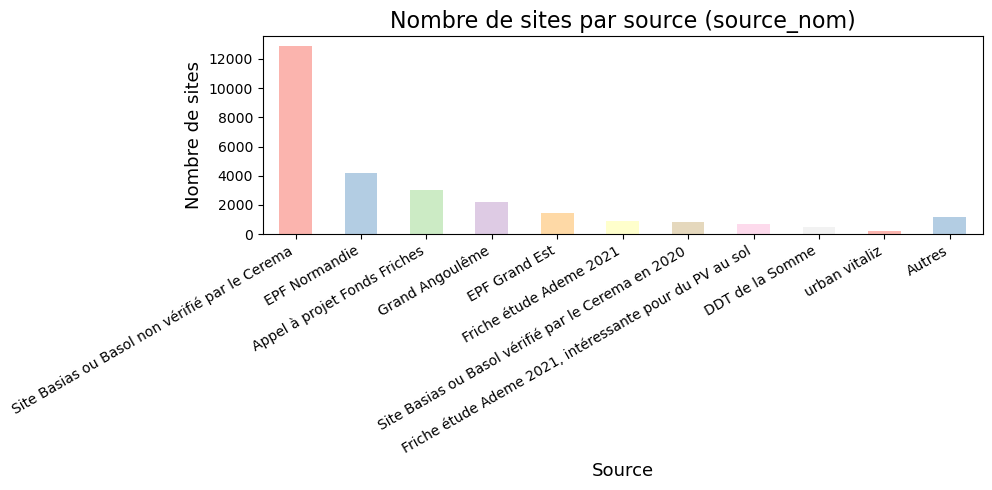

In [5]:
import matplotlib.pyplot as plt

# Compter les occurrences
vc_nom = df['source_nom'].value_counts().sort_values(ascending=False)

# Limite à 10 sources principales, le reste en "Autres"
vc_nom_top10 = vc_nom.head(10)
if len(vc_nom) > 10:
    autres = vc_nom.iloc[10:].sum()
    vc_nom_top10['Autres'] = autres

plt.figure(figsize=(10, 5))
vc_nom_top10.plot(kind='bar', color=plt.cm.Pastel1.colors)
plt.title("Nombre de sites par source (source_nom)", fontsize=16)
plt.xlabel("Source", fontsize=13)
plt.ylabel("Nombre de sites", fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


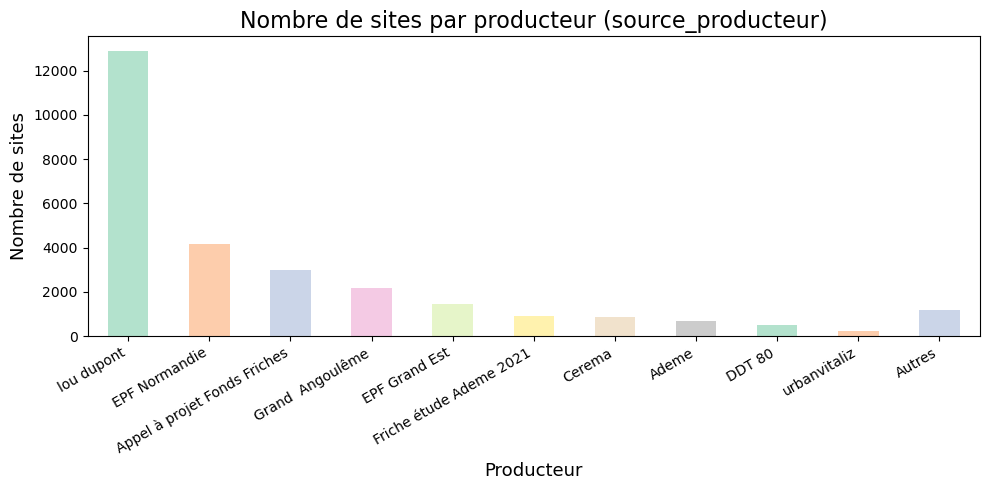

In [6]:
# Compter les occurrences
vc_prod = df['source_producteur'].value_counts().sort_values(ascending=False)

# Limite à 10 producteurs principaux, le reste en "Autres"
vc_prod_top10 = vc_prod.head(10)
if len(vc_prod) > 10:
    autres = vc_prod.iloc[10:].sum()
    vc_prod_top10['Autres'] = autres

plt.figure(figsize=(10, 5))
vc_prod_top10.plot(kind='bar', color=plt.cm.Pastel2.colors)
plt.title("Nombre de sites par producteur (source_producteur)", fontsize=16)
plt.xlabel("Producteur", fontsize=13)
plt.ylabel("Nombre de sites", fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


⚠️a revérifier redondances, il y a un mélange entre sources, type de saisie, et les opérations qui ont été réalisées par le cerema
comme les agrégations ou opérations manuelles?
refaire la distinction entre **fournisseur des données** et **source des donnée**

In [7]:
import pandas as pd

# Charger les données
df = pd.read_csv(r"C:\Users\rovar\_Projets pythons\friches-standard.csv", sep=";", low_memory=False)
# Définir les modalités à exclure
exclure_producteur = [
    "lou dupont", "Appel à projet Fonds Friches"
]
exclure_nom = [
    "Site Basias ou Basol non vérifié par le Cerema",
    "Site Basias ou Basol vérifié par le Cerema en 2020",
    "Friche étude Ademe 2021, intéressante pour du PV au sol",
    "Appel à projet Fonds Friches"
]

# Exclure toutes les valeurs contenant 'EPF' (regex insensible à la casse)
df['source_producteur'] = df['source_producteur'].replace(r"(?i).*EPF.*", pd.NA, regex=True)
df['source_nom'] = df['source_nom'].replace(r"(?i).*EPF.*", pd.NA, regex=True)

# Autres exclusions spécifiques
df['source_producteur'] = df['source_producteur'].where(~df['source_producteur'].isin(exclure_producteur))
df['source_nom'] = df['source_nom'].where(~df['source_nom'].isin(exclure_nom))

# Initialisation
resultats = []

# Parcours de chaque colonne du jeu de données
for col in df.columns:
    if col in ["source_nom", "source_producteur"]:
        continue

    # Cas source_producteur
    sp = df[[col, "source_producteur"]].dropna(subset=[col, "source_producteur"])
    sp_count = sp["source_producteur"].value_counts()
    sp_best = sp_count.idxmax() if not sp_count.empty else None
    sp_val = sp_count.max() if not sp_count.empty else 0

    # Cas source_nom
    sn = df[[col, "source_nom"]].dropna(subset=[col, "source_nom"])
    sn_count = sn["source_nom"].value_counts()
    sn_best = sn_count.idxmax() if not sn_count.empty else None
    sn_val = sn_count.max() if not sn_count.empty else 0

    # Choix du meilleur
    if sp_val >= sn_val:
        source_type = "source_producteur"
        source_value = sp_best
        n_remplis = sp_val
    else:
        source_type = "source_nom"
        source_value = sn_best
        n_remplis = sn_val

    # Enregistrement
    resultats.append({
        "source_type": source_type,
        "source_valeur": source_value,
        "variable": col,
        "n_remplis": n_remplis
    })

# Construction du DataFrame final
df_resultats = pd.DataFrame(resultats)


###  Rôles dans la chaîne de la donnée

| **Rôle**                  | **Description**                                                                                                                                     | **Exemples**                                               |
|--------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| **Producteur de données** | Génère directement la donnée primaire (observations, mesures, inventaire, etc.)                                                                     | EPF, DDT, commune, IGN, DGFiP…                              |
| **Fournisseur / Source initiale** | Entité à l’origine de la donnée utilisée (même si indirecte ou reprise)                                                                 | MAJIC, RPG, BASIAS, BASOL, DV3F, BD TOPO…                   |
| **Contributeur**         | Acteur qui alimente une plateforme ou base, sans nécessairement produire les données en amont                                                       | Cerema, utilisateurs via UrbanVitaliz…                      |
| **Agrégateur**           | Assemble, nettoie, structure et diffuse les données via une plateforme                                                                              | Cartofriches, data.gouv.fr, Insee…                          |
| **Référent / Validateur** | Peut valider ou fiabiliser la donnée (vérification, croisement avec d’autres bases, cadrage méthodologique, etc.)                                | Cerema, Ademe, CNIG                                         |


enrichissement possible et source des données

## 🧾 Audit Qualité  


In [8]:
#Audit qualité avant toute transformation
audit_report = []

for col in df.columns:
    series = df[col]
    audit_report.append({
        "Colonne": col,
        "Type": series.dtype,
        "Nb valeurs uniques": series.nunique(dropna=True),
        "Top valeur": series.mode().iloc[0] if not series.mode().empty else None,
        "Fréquence top valeur": series.value_counts(dropna=True).iloc[0] if not series.value_counts(dropna=True).empty else None,
        "Nb de NaN": series.isna().sum(),
        "% de NaN": round(series.isna().mean() * 100, 2)
    })

audit_df = pd.DataFrame(audit_report)
audit_df

Colonne     Type  Nb valeurs uniques  \
0                     site_id   object               28115   
1                    site_nom   object               24071   
2                   site_type   object                  19   
3                site_adresse   object                3713   
4           site_identif_date   object                 581   
5              site_actu_date   object                 532   
6                    site_url   object               16939   
7              site_ademe_url  float64                   0   
8               site_securite   object                   5   
9             site_occupation   object                  20   
10                site_statut   object                   4   
11            site_projet_url  float64                   0   
12          site_reconv_annee  float64                   0   
13           site_reconv_type   object                  13   
14           activite_libelle   object                1617   
15              activite_code   object                 109   
16         activite_fin_annee   object                  73   
17                   comm_nom   object                9390   
18                 comm_insee   object                9138   
19                  bati_type   object                   9   
20                bati_nombre  float64                 106   
21               bati_surface  float64                  15   
22             bati_pollution   object                   4   
23               bati_vacance   object                   5   
24            bati_patrimoine   object                   5   
25                  bati_etat   object                   7   
26         local_ancien_annee  float64                 323   
27         local_recent_annee  float64                 298   
28               proprio_type   object                1344   
29           proprio_personne   object                   4   
30                proprio_nom   object               12738   
31        sol_pollution_annee  float64                   0   
32       sol_pollution_existe   object                   7   
33      sol_pollution_origine   object                   4   
34  sol_pollution_commentaire  float64                   0   
35      sol_depollution_fiche   object                   3   
36     unite_fonciere_surface  float64               17319   
37      unite_fonciere_refcad   object               26511   
38             urba_zone_type   object                  10   
39              urba_zone_lib   object                9058   
40         urba_zone_formdomi   object                  11   
41              urba_doc_type   object                   5   
42          desserte_distance  float64                   0   
43       desserte_commentaire  float64                   0   
44                 source_nom   object                  22   
45                 source_url   object                  12   
46          source_producteur   object                  24   
47             source_contact   object                   5   
48                  geompoint   object               26966   
49                   geomsurf  float64                   0   

                                           Top valeur  Fréquence top valeur  \
0                                         01001_32316                   1.0   
1                                            Décharge                 415.0   
2                                             inconnu               16005.0   
3                                          LE VILLAGE                  30.0   
4                                          2022-10-10               15736.0   
5                                          2022-10-10               15587.0   
6                      https://www.suippes.fr/9143-2/                  14.0   
7                                                None                   NaN   
8                                             inconnu               20132.0   
9                                             inconnu               2

In [9]:
import pandas as pd
import plotly.express as px

# 0. Charger ton DataFrame (exemple)
# df = pd.read_csv('friches-standards.csv')

# 1. Remplacer les modalités spécifiques par des NaN dans le DataFrame
df_cleaned = df.replace(['inconnu', 'INCONNU', 'autre', 'autres', 'none', 'NULL'], pd.NA)

# 2. Calculer les taux de valeurs manquantes
nan_counts = df_cleaned.isna().sum()
nan_percentages = (nan_counts / len(df_cleaned)) * 100

# 3. Exclure les colonnes sans NaN et trier en descendant
nan_percentages = nan_percentages[nan_percentages > 0].sort_values(ascending=False)

# 4. Fonction pour extraire le top 5 des modalités les plus fréquentes
def top_5_modalites(col):
    return df_cleaned[col].value_counts().head(5).to_dict()

# 5. Créer un dictionnaire des tooltips
tooltips = {col: top_5_modalites(col) for col in nan_percentages.index}

# 6. Préparer une palette pastel répétée pour chaque barre
pastel_palette = px.colors.qualitative.Pastel1
color_sequence = (pastel_palette * ((len(nan_percentages) // len(pastel_palette)) + 1))[:len(nan_percentages)]

# 7. Créer un graphique en barres interactif avec Plotly
fig = px.bar(
    x=nan_percentages.index,
    y=nan_percentages.values,
    labels={'x': 'Variable', 'y': 'Taux de valeurs manquantes (%)'},
    title="Taux de valeurs manquantes par variable",
    color=nan_percentages.index,
    color_discrete_sequence=color_sequence,
    category_orders={'x': nan_percentages.index.tolist()}
)

# 8. Ajouter les tooltips à chaque barre
hover_templates = [
    f"Variable: {col}<br>Taux manquant: {nan_percentages[col]:.2f}%<br>Top 5 Modalités: {tooltips[col]}"
    for col in nan_percentages.index
]
fig.update_traces(hovertemplate=hover_templates)

# 9. Mise en forme finale
fig.update_layout(
    width=1000,
    height=600,
    xaxis_tickangle=-90,
    xaxis_title="Variable",
    yaxis_title="Taux de valeurs manquantes (%)",
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False
)

display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


###  Répartition des Valeurs manquantes dans le temps

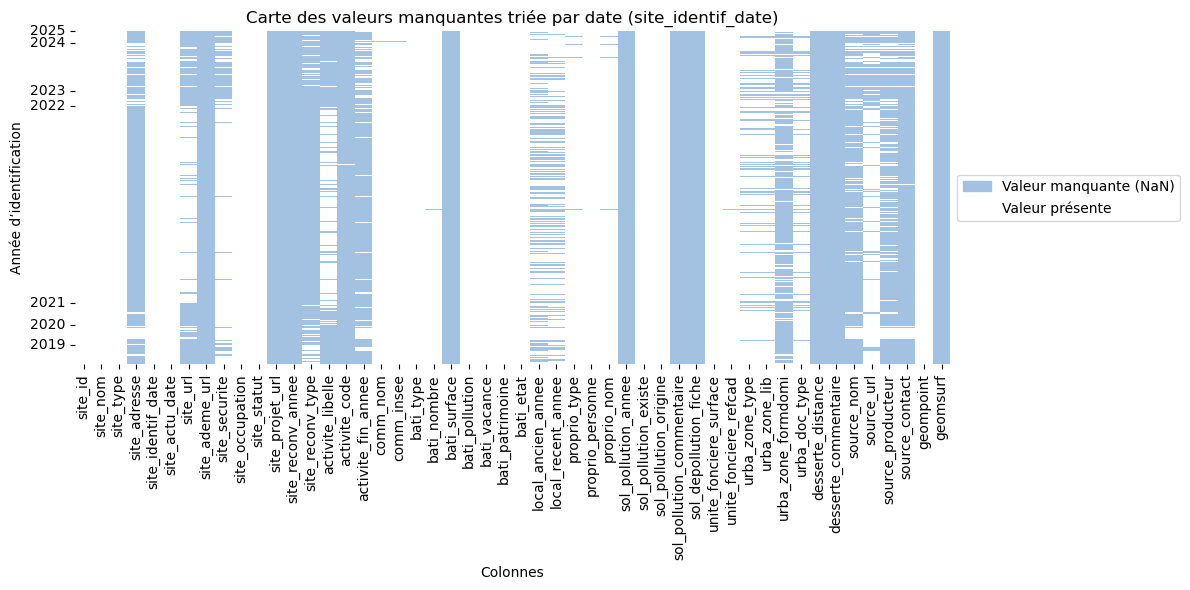

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_work = df.copy()

# 1. Conversion et extraction de l'année
df_work["site_identif_date"] = pd.to_datetime(df_work["site_identif_date"], errors='coerce')
df_work["site_identif_date"] = df_work["site_identif_date"].dt.year

# 2. Tri décroissant par la date
df_sorted = df_work.sort_values("site_identif_date", ascending=False)

# 3. Création de la heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_sorted.isna(),
    cmap=sns.color_palette(["white", '#A3C1E1']),
    cbar=False
)

# 4. Préparation des ticks d’année espacés
annees = df_sorted["site_identif_date"].fillna(0).astype(int)
yticks_pos = []
yticks_labels = []
derniere_annee = None

for i, annee in enumerate(annees):
    if annee != derniere_annee and 2019 <= annee <= 2025:
        yticks_pos.append(i)
        yticks_labels.append(str(annee))
        derniere_annee = annee

plt.yticks(yticks_pos, yticks_labels, fontsize=10)

# 5. Légende personnalisée
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#A3C1E1', edgecolor='#A3C1E1', label='Valeur manquante (NaN)'),
    Patch(facecolor='white', edgecolor='white', label='Valeur présente')
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Carte des valeurs manquantes triée par date (site_identif_date)")
plt.xlabel("Colonnes", fontsize=10)
plt.ylabel("Année d’identification", fontsize=10)
plt.tight_layout()
plt.show()

###  Remplacement des valeurs inconnues 

In [11]:
def check_faux_nan(df, col, patterns=None):
    """Affiche le nombre de valeurs 'faux nan' dans une colonne"""
    if patterns is None:
        patterns = ["nan", "NaN", "NA", "Na", "N/A", "none", "null", "", "inconnu", "autre", "vide"]
    ser = df[col].astype(str).str.lower().str.strip()
    for pattern in patterns:
        n = (ser == pattern.lower()).sum()
        if n > 0:
            print(f"'{pattern}' : {n} occurence(s)")

In [12]:
df['site_adresse'].dtypes

dtype('O')

In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 1. Définir les valeurs à remplacer par NaN
valeurs_na = ['None', 'none', 'NONE', 'nan', 'NaN', 'NA', 'na',
              'inconnu', 'Inconnu', 'INCONNU',
              'autre', 'Autre', 'AUTRE']

# 2. Créer une version nettoyée
df_clean = df.replace(valeurs_na, np.nan)

# 3. Nombre de NaN avant et après
na_avant = df.isna().sum()
na_apres = df_clean.isna().sum()

# 4. Calcul des top valeurs (value_counts) pour les tooltips
hover_texts = []
cols_affectees = []

for col in df.columns:
    n_av = na_avant[col]
    n_ap = na_apres[col]

    # On ne garde que les colonnes où le nombre de NaN change
    if n_av != n_ap:
        cols_affectees.append(col)
        vc = df[col].value_counts(dropna=True).head(5)
        vc_text = "<br>".join([f"{val} : {cnt}" for val, cnt in vc.items()])

        tooltip = (
            f"<b>{col}</b><br>"
            f"NaN avant : {n_av}<br>"
            f"NaN après : {n_ap}<br><br>"
            f"<b>Top valeurs :</b><br>{vc_text}"
        )
        hover_texts.append(tooltip)

# 5. Données finales pour plotly
na_avant_filtered = na_avant[cols_affectees]
na_apres_filtered = na_apres[cols_affectees]

# 6. Création du graphique interactif
fig = go.Figure()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=cols_affectees,
    y=na_avant_filtered,
    name='NaN avant',
    hovertext=hover_texts,
    hoverinfo='text',
    marker=dict(color='#A3C1E1', opacity=0.6)  # bleu pastel
))

fig.add_trace(go.Bar(
    x=cols_affectees,
    y=na_apres_filtered,
    name='NaN après',
    hovertext=hover_texts,
    hoverinfo='text',
    marker=dict(color='#FFB3B3', opacity=0.9)  # rose pastel
))

fig.update_layout(
    title="Effet du nettoyage sur les NaN (avec Top 5 des valeurs)",
    xaxis_title="Colonnes affectées",
    yaxis_title="Nombre de valeurs manquantes",
    barmode='group',
    xaxis_tickangle=-45,
    height=600,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))



In [14]:
print(df["site_identif_date"].iloc[20210])
print(df["site_identif_date"].iloc[27187])

2022-10-10
2021-12-31


**Commentaire:** Les données ci dessus montrent la répartition des Na dans le temps, on constate une zone entre 12/2021 10/2022 ou la complétude de certainnes données comme **site_url, site_securite, activite_libelle** sont plus importantes
⚠️problématique qui gére ces données, y a t 'il une maintenance automatique y a t'il des observatoires qui complètent moins bien

In [15]:
import pandas as pd
import numpy as np

MISSING_SYNONYMS = ["nan", "none", "null", "", "na", "n/a", "inconnu", "autre", "vide"]

def audit_column_to_row(df, column):
    ser = df[column]
    total = len(ser)

    # Détection de valeurs manquantes élargie (corrigée pour éviter double-comptage)
    if ser.dtype == object or pd.api.types.is_string_dtype(ser):
        mask_missing = ser.astype(str).str.lower().isin([s.lower() for s in MISSING_SYNONYMS])
    else:
        mask_missing = pd.Series(False, index=ser.index)

    # CORRECTION ICI
    full_missing_mask = ser.isna() | mask_missing
    num_missing = int(full_missing_mask.sum())
    missing_rate = (num_missing / total * 100) if total > 0 else 0.0
    num_duplicates = int(ser.duplicated().sum())

    expected_type = "Numérique" if pd.api.types.is_numeric_dtype(ser) else "Catégoriel"
    unique_count = ser.nunique(dropna=True)

    # On compte les modalités valides uniquement (hors Na et valeurs manquantes élargies)
    ser_filtered = ser.copy()
    if ser_filtered.dtype == object or pd.api.types.is_string_dtype(ser_filtered):
        ser_filtered[mask_missing] = np.nan
    ser_filtered = ser_filtered.dropna()

    modalites_count = ser_filtered.astype(str).str.strip().nunique()

    # Modalité dominante
    value_counts_filtered = ser_filtered.astype(str).str.strip().value_counts()
    if not value_counts_filtered.empty:
        top_category = value_counts_filtered.index[0]
        top_count = value_counts_filtered.iloc[0]
        total_valid = value_counts_filtered.sum()
        dominance_pct = round((top_count / total_valid) * 100, 1)
    else:
        top_category = None
        dominance_pct = None

    row = {
        "colonne": column,
        "type_infere": expected_type,
        "valeurs_uniques": unique_count,
        "modalites_valides": modalites_count,
        "taux_manquants (%)": round(missing_rate, 2),
        "doublons": num_duplicates,
        "modalite_dominante": top_category,
        "dominance (%)": dominance_pct
    }

    return row


def audit_dataframe_quality(df):
    audit_rows = [audit_column_to_row(df, col) for col in df.columns]
    audit_df = pd.DataFrame(audit_rows)

    # Ordre de colonnes pour la lisibilité
    col_order = [
        "colonne", "type_infere", "valeurs_uniques", "modalites_valides",
        "taux_manquants (%)", "doublons", "modalite_dominante", "dominance (%)"
    ]
    return audit_df[col_order]


In [16]:
def detect_typo_patterns(series):
    audit = []
    for val in series.dropna().unique():
        val_str = str(val)
        length = len(val_str)
        pattern = re.sub(r'\d', '0', val_str)  # transforme 61214_34555 → 00000_00000
        pattern = re.sub(r'[a-zA-Z]', 'A', pattern)  # si lettres présentes
        pattern = re.sub(r'[^0A_]', 'X', pattern)  # tout autre caractère

        audit.append({
            "Exemple": val_str,
            "Longueur": length,
            "Pattern typologique": pattern,
            "Fréquence": series[series == val].count()
        })

    df_patterns = pd.DataFrame(audit)
    return df_patterns.groupby(["Pattern typologique"]).agg({
        "Exemple": "first",
        "Longueur": "first",
        "Fréquence": "sum"
    }).sort_values("Fréquence", ascending=False).reset_index()

In [17]:
def detect_typo_patterns(series):
    audit = []
    for val in series.dropna().unique():
        val_str = str(val)
        length = len(val_str)
        pattern = re.sub(r'\d', '0', val_str)
        pattern = re.sub(r'[a-zA-Z]', 'A', pattern)
        pattern = re.sub(r'[^0A_]', 'X', pattern)
        audit.append({
            "Exemple": val_str,
            "Longueur": length,
            "Pattern typologique": pattern,
            "Fréquence": series[series == val].count()
        })
    df_audit = pd.DataFrame(audit)
    # Grouper par pattern/longueur et additionner la fréquence
    df_grouped = (
        df_audit
        .groupby(["Pattern typologique", "Longueur"])
        .agg({
            "Exemple": "first",         # 1er exemple de la catégorie
            "Fréquence": "sum"          # somme des fréquences
        })
        .reset_index()
        .sort_values("Fréquence", ascending=False)
    )
    return df_grouped

# Ex :
# df_typo_patterns = detect_typo_patterns(df['comm_insee'])


⚠️définir les critères d'exploitabilité et de qualité par rapport a ML ou audit qualité ou mix

## 📊 Analyse métier et qualité


**La complétude, l'unicité, la pertinence, la validité, ainsi que la criticité** de chaque  variable est analysée dans un premier temps pour évaluerla qualité générale des données fournies par cartofriche et leur provenance, cette analyse exhaustive permet un mapping des données, une navigation plus simple pour les détails.
Mais aussi la compréhension métier de chaque variable, ce qui est critique pour l'évaluation de la pertinence.

Le dataset a été séparé en plusieurs dataframe, une catégorisation mixte prioritairement 
- métier, par catégorie ou provenance propable, le travail a été déjà grandement facilité par l'ajout des préfixes
- fonctionelle: les données ayant la même fonction comme les localisations, les données de surface, les données temporelles

### Dictionnaire des variables

In [18]:
import pandas as pd
import re
from datetime import datetime

# --- Fonctions utilitaires (assurez-vous qu'elles sont définies dans votre environnement) ---
def is_null_or_nan(value):
    # Modifié: Ne vérifie plus que les NaN de Pandas, laissant la gestion des chaînes à la fonction d'audit.
    return pd.isna(value)

def is_float_convertible(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

current_year = datetime.now().year

# non_acceptable_terms_lower est supprimé car géré par la fonction d'audit.

# --- ALL_VALIDATION_RULES : Clés = Noms exacts de vos colonnes ---
ALL_VALIDATION_RULES = {
    'site_id': {
        'validation_func': lambda x: not is_null_or_nan(x), # Modifié
        'forme_attendue': "Identifiant unique non nul"
    },
    'site_nom': {
        'validation_func': lambda row: (
            not is_null_or_nan(row['site_nom']) and
            (not str(row['site_nom']).strip().isdigit() or
             (is_null_or_nan(row.get('site_adresse')))) # Modifié
        ),
        'forme_attendue': "Chaîne non vide et non numérique sauf si 'site_adresse' est vide",
        'is_dependent': True
    },
    'site_type': {
        'validation_func': lambda x: str(x).lower() in [
            'friche industrielle', 'friche d\'équipement public', 'friche loisir tourisme hôtellerie',
            'friche commerciale', 'friche militaire', 'friche enseignement',
            'friche hospitalière', 'friche portuaire', 'friche cultuelle',
            'friche agro-industrielle', 'friche aéroportuaire', 'mixte',
            'friche carrière ou mine', 'friche ferroviaire',
            'friche d\'habitat', 'friche logistique'
        ],
        'forme_attendue': "Strictement parmi une liste définie"
    },
    'site_adresse': {
        'validation_func': lambda x: (
            isinstance(x, str) and
            (any(char.isdigit() for char in x.strip()) or ' ' in x.strip() or ',' in x.strip() or len(x.strip()) > 10) and
            x.lower().strip() not in ['village', 'hameau', 'lieudit', 'le village', 'le hameau'] # Seules ces exclusions spécifiques sont maintenues
        ),
        'forme_attendue': "Contient un numéro de rue et/ou plusieurs composants, excluant les noms de lieux simples"
    },
    'site_identif_date': {
        'validation_func': lambda x: (
            isinstance(x, str) and
            pd.to_datetime(x.strip(), format='%Y-%m-%d', errors='coerce') is not pd.NaT
        ),
        'forme_attendue': "Strictement AAAA-MM-JJ (ex: 2023-01-15)"
    },
    'site_actu_date': {
        'validation_func': lambda x: (
            isinstance(x, str) and
            (pd.to_datetime(x.strip(), format='%Y-%m-%d', errors='coerce') is not pd.NaT or
             pd.to_datetime(x.strip(), format='%d-%m-%y', errors='coerce') is not pd.NaT or
             pd.to_datetime(x.strip(), format='%d-%m-%Y', errors='coerce') is not pd.NaT)
        ),
        'forme_attendue': "AAAA-MM-JJ ou formats inversés valides"
    },
    'site_url': {
        'validation_func': lambda url_str: (
            isinstance(url_str, str) and
            bool(re.match(r'^(https?://)?(www\.)?([a-zA-Z0-9-]+\.){1,}[a-zA-Z]{2,}(/[\w\-._~:/?#\[\]@!$&\'()*+,;=]*)?$', url_str))
        ),
        'forme_attendue': "URL valide (http/https)"
    },
    'site_ademe_url': {
        'validation_func': lambda url_str: (
            isinstance(url_str, str) and
            bool(re.match(r'^(https?://)?(www\.)?([a-zA-Z0-9-]+\.){1,}[a-zA-Z]{2,}(/[\w\-._~:/?#\[\]@!$&\'()*+,;=]*)?$', url_str))
        ),
        'forme_attendue': "URL ADEME valide (http/https)"
    },
    'site_securite': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and str(val_str).lower() in ['oui', 'non', 'en_cours']
        ),
        'forme_attendue': "Parmi ['oui', 'non', 'en_cours'] (insensible à la casse)"
    },
    'site_occupation': {
        'validation_func': lambda x: str(x).lower() in [
            'totalement inoccupé', 'partiellement inoccupé',
            'occupation transitoire ou temporaire',
            'occupation illicite supposée', 'occupation illicite avérée'
        ] or 'occup' in str(x).lower(),
        'forme_attendue': "Parmi ['totalement inoccupé', ...] ou contient 'occup'"
    },
    'site_statut': {
        'validation_func': lambda x: str(x).lower() in [
            'friche potentielle', 'friche sans projet', 'friche avec projet', 'friche reconvertie'
        ],
        'forme_attendue': "Strictement parmi ['friche potentielle', ..., 'friche reconvertie']"
    },
    'site_projet_url': {
        'validation_func': lambda url_str: (
            isinstance(url_str, str) and
            bool(re.match(r'^(https?://)?(www\.)?([a-zA-Z0-9-]+\.){1,}[a-zA-Z]{2,}(/[\w\-._~:/?#\[\]@!$&\'()*+,;=]*)?$', url_str))
        ),
        'forme_attendue': "URL valide (http/https)"
    },
    'site_reconv_annee': {
        'validation_func': lambda x: (
            not is_null_or_nan(x) and
            pd.api.types.is_numeric_dtype(pd.Series([x])) and 1800 <= int(float(str(x).strip())) <= (current_year + 5)
        ),
        'forme_attendue': "Année (AAAA) entre 1800 et 2030"
    },
    'site_reconv_type': {
        'validation_func': lambda x: str(x).lower() in [
            'habitat', 'autres activités économiques', 'panneaux photovoltaïques',
            'bureau', 'équipement public', 'énergie, hors photovoltaïque',
            'commerce', 'aménagement d\'espace public', 'mixte', 'industrie', 'renaturation'
        ],
        'forme_attendue': "Strictement parmi une liste définie"
    },
    'activite_libelle': {
        'validation_func': lambda text_str: isinstance(text_str, str), # Modifié
        'forme_attendue': "Chaîne de caractères"
    },
    'activite_code': {
        'validation_func': lambda code_str: (
            isinstance(code_str, str) and bool(re.match(r'^\d{4}\w$|^\d{2}\.\d{2}\w$', code_str))
        ),
        'forme_attendue': "Code NAF/APE valide"
    },
    'activite_fin_annee': {
        'validation_func': lambda x: (
            not is_null_or_nan(x) and
            pd.api.types.is_numeric_dtype(pd.Series([x])) and 1800 <= int(float(str(x).strip())) <= (current_year + 5)
        ),
        'forme_attendue': "Année (AAAA) entre 1800 et 2030"
    },
    'comm_nom': {
        'validation_func': lambda x: (
            isinstance(x, str) and not x.strip().isdigit()
        ),
        'forme_attendue': "Chaîne de caractères non numérique"
    },
    'comm_insee': {
        'validation_func': lambda x: (
            isinstance(x, str) and x.strip().isdigit() and len(x.strip()) == 5
        ),
        'forme_attendue': "Chaîne de 5 chiffres"
    },
    'bati_type': {
        'validation_func': lambda val: isinstance(val, str), # Modifié
        'forme_attendue': "Texte"
    },
    'bati_nombre': {
        'validation_func': lambda x: pd.isna(x) or (isinstance(x, (int, float)) and x >= 0 and float(x).is_integer()),
        'forme_attendue': "Entier positif ou vide"
    },
    'bati_surface': {
        'validation_func': lambda x: pd.isna(x) or (isinstance(x, (int, float)) and x >= 0),
        'forme_attendue': "Nombre positif ou vide"
    },
    'bati_pollution': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and str(val_str).lower() in ['oui', 'non', 'potentielle']
        ),
        'forme_attendue': "Parmi ['oui', 'non', 'potentielle'] (insensible à la casse)"
    },
    'bati_vacance': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and str(val_str).lower() in ['occupé', 'partiellement occupé', 'vacant']
        ),
        'forme_attendue': "Parmi ['occupé', 'partiellement occupé', 'vacant']"
    },
    'bati_patrimoine': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and str(val_str).lower() in ['aucun', "présence d'un bâtiment d'intérêt", "présence d'un bâtiment classé"]
        ),
        'forme_attendue': "Parmi ['aucun', \"présence d'un bâtiment d'intérêt\", \"présence d'un bâtiment classé\"]"
    },
    'bati_etat': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and str(val_str).lower() in ['dégradation inexistante ou faible', 'dégradation moyenne', 'dégradation très importante', 'dégradation hétérogène']
        ),
        'forme_attendue': "Parmi ['dégradation inexistante ou faible', 'dégradation moyenne', 'dégradation très importante', 'dégradation hétérogène']"
    },
    'local_ancien_annee': {
        'validation_func': lambda x: (
            not is_null_or_nan(x) and
            pd.api.types.is_numeric_dtype(pd.Series([x])) and 1800 <= int(float(str(x).strip())) <= (current_year + 5)
        ),
        'forme_attendue': "Année (AAAA) entre 1800 et 2030"
    },
    'local_recent_annee': {
        'validation_func': lambda x: (
            not is_null_or_nan(x) and
            pd.api.types.is_numeric_dtype(pd.Series([x])) and 1800 <= int(float(str(x).strip())) <= (current_year + 5)
        ),
        'forme_attendue': "Année (AAAA) entre 1800 et 2030"
    },
    'proprio_type': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and str(val_str).lower() in ['public', 'prive']
        ),
        'forme_attendue': "Parmi ['public', 'prive'] (insensible à la casse)"
    },
    'proprio_personne': {
        'validation_func': lambda text_str: isinstance(text_str, str), # Modifié
        'forme_attendue': "Chaîne de caractères"
    },
    'proprio_nom': {
        'validation_func': lambda text_str: isinstance(text_str, str), # Modifié
        'forme_attendue': "Chaîne de caractères"
    },
    'sol_pollution_annee': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and
            pd.api.types.is_numeric_dtype(pd.Series([val_str])) and 1800 <= int(float(str(val_str).strip())) <= (current_year + 5)
        ),
        'forme_attendue': "Année (AAAA) valide (1800-actuelle+5)"
    },
    'sol_pollution_existe': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and str(val_str).lower() in ['oui', 'non', 'potentielle']
        ),
        'forme_attendue': "Parmi ['oui', 'non', 'potentielle'] (insensible à la casse)"
    },
    'sol_pollution_origine': {
        'validation_func': lambda val_str: (
            not is_null_or_nan(val_str) and str(val_str).lower() in ['industrielle', 'agricole', 'militaire']
        ),
        'forme_attendue': "Parmi ['industrielle', 'agricole', 'militaire'] (insensible à la casse)"
    },
    'sol_pollution_commentaire': {
        'validation_func': lambda text_str: isinstance(text_str, str), # Modifié
        'forme_attendue': "Chaîne de caractères"
    },
    'sol_depollution_fiche': {
        'validation_func': lambda fiche_str: (
            isinstance(fiche_str, str) and
            (re.match(r'^(https?://|www\.)[^\s/$.?#].[^\s]*$|^\w+-\w+-\w+$', fiche_str) or len(fiche_str) > 5)
        ),
        'forme_attendue': "URL ou référence textuelle"
    },
    'unite_fonciere_surface': {
        'validation_func': lambda x: pd.isna(x) or x >= 0,
        'forme_attendue': "Nombre positif ou vide"
    },
    'unite_fonciere_refcad': {
        'validation_func': lambda val: True if pd.isna(val) else all(re.match(r'^[\w\d]+$', part) for part in str(val).split('|')),
        'forme_attendue': "Liste d'identifiants alphanumériques séparés par '|' ou vide"
    },
    'urba_zone_type': {
        'validation_func': lambda x: (
            isinstance(x, str) and
            x.lower() in ['urbaine', 'u', 'a_urbaniser', 'au', 'auc', 'aus', 'agricole', 'a', 'naturelle', 'n', 'znc', 'zc', 'zca']
        ),
        'forme_attendue': "Parmi une liste définie (insensible à la casse)"
    },
    'urba_zone_lib': {
        'validation_func': lambda x: isinstance(x, str), # Modifié
        'forme_attendue': "Chaîne de caractères"
    },
    'urba_zone_formdomi': {
        'validation_func': lambda x: (
            isinstance(x, str) and
            x.lower() in ['habitat_individuel', 'habitat_collectif', 'activite', 'mixte', 'equipement']
        ),
        'forme_attendue': "Parmi une liste définie (insensible à la casse)"
    },
    'urba_doc_type': {
        'validation_func': lambda x: (
            isinstance(x, str) and
            x.lower() in ['plu', 'plui', 'scot', 'carte_communale', 'rnu']
        ),
        'forme_attendue': "Parmi ['PLU', 'PLUi', ..., 'RNU'] (insensible à la casse)"
    },
    'desserte_distance': {
        'validation_func': lambda x: (
            not is_null_or_nan(x) and
            pd.api.types.is_numeric_dtype(pd.Series([x])) and float(str(x).strip()) >= 0
        ),
        'forme_attendue': "Nombre flottant non négatif (ex: distance en mètres)"
    },
    'desserte_commentaire': {
        'validation_func': lambda x: isinstance(x, str), # Modifié
        'forme_attendue': "Chaîne de caractères"
    },
    'source_nom': {
        'validation_func': lambda text_str: isinstance(text_str, str), # Modifié
        'forme_attendue': "Chaîne de caractères"
    },
    'source_url': {
        'validation_func': lambda url_str: (
            isinstance(url_str, str) and
            bool(re.match(r'^(https?://)?(www\.)?([a-zA-Z0-9-]+\.){1,}[a-zA-Z]{2,}(/[\w\-._~:/?#\[\]@!$&\'()*+,;=]*)?$', url_str))
        ),
        'forme_attendue': "URL valide (http/https)"
    },
    'source_producteur': {
        'validation_func': lambda text_str: isinstance(text_str, str), # Modifié
        'forme_attendue': "Chaîne de caractères"
    },
    'source_contact': {
        'validation_func': lambda email_str: (
            isinstance(email_str, str) and bool(re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$', email_str))
        ),
        'forme_attendue': "Adresse email valide"
    },
    'geompoint': {
        'validation_func': lambda x: (
            isinstance(x, str) and
            x.upper().startswith('POINT (') and x.endswith(')') and
            len(x[x.find('(') + 1 : x.rfind(')')].strip().split()) == 2 and
            all(is_float_convertible(coord) for coord in x[x.find('(') + 1 : x.rfind(')')].strip().split())
        ),
        'forme_attendue': "Format WKT 'POINT (X Y)'"
    },
    'geomsurf': {
        'validation_func': lambda x: (
            is_null_or_nan(x) or (isinstance(x, str) and x.strip() == '') # Ne vérifie plus que les NaN de Pandas ou les chaînes vides
        ),
        'forme_attendue': "Valeur manquante (vide ou NaN Python)"
    },
}

# --- `domaines` : Listes de noms de colonnes exacts pour chaque domaine ---
domaines = {
    "information": [
        'site_id', 'site_nom', 'site_type', 'site_statut', 'site_occupation', 'site_reconv_type'
    ],
    "temporel": [
        'site_identif_date', 'site_actu_date',
        'site_reconv_annee',
        'activite_fin_annee', 'local_ancien_annee', 'local_recent_annee'
    ],
    "localisation": [
        'comm_nom', 'comm_insee', 'geompoint', 'geomsurf', 'site_adresse'
    ],
    "bati": [
        'bati_type', 'bati_nombre', 'bati_surface',
        'bati_vacance', 'bati_patrimoine', 'bati_etat', 'unite_fonciere_surface', 'unite_fonciere_refcad'
    ],
    "proprietaire": [
        'proprio_type', 'proprio_personne', 'proprio_nom', 'activite_libelle', 'activite_code'
    ],
    "pollution": [
        'sol_pollution_annee', 'sol_pollution_existe',
        'sol_pollution_origine', 'sol_pollution_commentaire',
        'sol_depollution_fiche', 'site_securite', 'bati_pollution'

    ],
    "urbanisme": [
        'urba_zone_type', 'urba_zone_lib', 'urba_zone_formdomi',
        'urba_doc_type', 'desserte_distance', 'desserte_commentaire'
    ],
    "source": [
        'source_nom', 'source_url', 'source_producteur', 'source_contact',
        'site_url', 'site_ademe_url', 'site_projet_url'
    ]
}

# --- RE-GENERATE VALIDATION_RULES_BY_DOMAIN (ce code reste identique) ---
VALIDATION_RULES_BY_DOMAIN = {}
for domain_name, features in domaines.items():
    domain_rules = {}
    for feature in features:
        if feature in ALL_VALIDATION_RULES:
            domain_rules[feature] = ALL_VALIDATION_RULES[feature]
        else:
            print(f"Attention: La feature '{feature}' du domaine '{domain_name}' n'a pas de règle de validation définie dans ALL_VALIDATION_RULES.")
    VALIDATION_RULES_BY_DOMAIN[domain_name] = domain_rules

# --- La fonction audit_dataframe_by_domain reste inchangée ---
# (Assurez-vous qu'elle est définie dans votre environnement)

### Fonction d'audit

In [19]:
import pandas as pd
import re
from datetime import datetime
import numpy as np

# --- Vos fonctions utilitaires et dictionnaires globaux ---
# Assurez-vous que ces éléments sont définis et accessibles :
# - is_null_or_nan(value)
# - is_float_convertible(value)
# - current_year()
# - non_acceptable_terms_lower (si utilisé par vos règles)
# - ALL_VALIDATION_RULES
# - domaines
# - VALIDATION_RULES_BY_DOMAIN

# Définition des synonymes de valeurs manquantes pour la nouvelle métrique 'valeur_manquant_effectif'
MISSING_SYNONYMS = ["nan", "none", "null", "", "na", "n/a", "inconnu", "autre", "vide"]

def audit_dataframe_by_domain(df, domain_name):
    """
    Réalise un audit qualité complet des données d'un DataFrame pour un domaine spécifique,
    en combinant les statistiques de base et la validation par règles,
    avec un rapport simplifié et ciblé.

    Args:
        df (pd.DataFrame): Le DataFrame à auditer.
        domain_name (str): Le nom du domaine à auditer (clé dans VALIDATION_RULES_BY_DOMAIN).

    Returns:
        pd.DataFrame: Un DataFrame contenant les résultats détaillés de l'audit par colonne,
                      incluant les métriques essentielles.
                      Ou un dictionnaire d'erreur si le domaine n'est pas trouvé.
    """
    if domain_name not in VALIDATION_RULES_BY_DOMAIN:
        return {"error": f"Domaine '{domain_name}' non trouvé dans VALIDATION_RULES_BY_DOMAIN."}

    domain_rules = VALIDATION_RULES_BY_DOMAIN[domain_name]
    
    column_audit_data = [] # Pour collecter les résultats par colonne

    # Dictionnaire pour les métriques globales du domaine
    global_metrics = {
        'total_rows_in_domain': len(df), # Nombre de lignes du DF
        'total_cells_for_validation_effective': 0, # Total des cellules non-manquantes au sens large
        'total_valid_cells_by_rule': 0, # Total des cellules valides par règle
        'total_real_missing': 0, # Total des NaN/None de Pandas
        'total_effective_missing': 0, # Total des NaN/None + synonymes
        'total_duplicates_across_cols': 0 # Total des doublons
    }
    
    # Préparez la liste des valeurs invalides par colonne pour le top 3
    all_invalid_details_by_col = {col: [] for col in domain_rules.keys()}

    # Parcourir chaque colonne du domaine pour l'audit détaillé
    for col_name, rules in domain_rules.items():
        if col_name not in df.columns:
            # Si la colonne est absente, on l'ajoute au rapport avec des zéros ou None
            column_audit_data.append({
                'colonne': col_name,
                'valeur_manquant_reel': len(df), # On considère toutes les lignes comme manquantes réelles si colonne absente
                'valeur_manquant_effectif': len(df),
                'taux_doublons_(%)': 0.0,
                'Modalite_Dominante': None,
                'Dominance_(%)': None,
                'Nb_Valeurs_Uniques': 0,
                'Nb_Lignes_Valides_Selon_Regle': 0,
                'Taux_Validite_Effectif_(%)': 0.0,
                'Top3_Modalites_Non_Valides': "Colonne absente"
            })
            # On ne compte pas les colonnes absentes dans les totaux du domaine
            continue

        ser = df[col_name]
        total_rows_for_col = len(ser) # Nombre total de lignes pour cette colonne

        # 1. Calcul des valeurs manquantes réelles (NaN/None de Pandas)
        real_missing_count_col = ser.isna().sum()
        global_metrics['total_real_missing'] += real_missing_count_col

        # 2. Calcul des valeurs manquantes effectives (NaN/None + synonymes)
        if ser.dtype == object or pd.api.types.is_string_dtype(ser):
            mask_missing_synonyms = ser.astype(str).str.lower().isin([s.lower() for s in MISSING_SYNONYMS])
        else:
            mask_missing_synonyms = pd.Series(False, index=ser.index)
        
        effective_missing_mask_col = ser.isna() | mask_missing_synonyms
        effective_missing_count_col = int(effective_missing_mask_col.sum())
        global_metrics['total_effective_missing'] += effective_missing_count_col

        # 3. Taux de doublons par colonne
        doublons_count_col = int(ser.duplicated().sum())
        taux_doublons_pct_col = (doublons_count_col / total_rows_for_col * 100) if total_rows_for_col > 0 else 0.0
        global_metrics['total_duplicates_across_cols'] += doublons_count_col

        # 4. Modalité dominante et dominance
        # On filtre les manquants effectifs pour les calculs de modalités
        ser_filtered_for_modalities = ser.copy()
        ser_filtered_for_modalities[effective_missing_mask_col] = np.nan # Remplace les manquants effectifs par NaN
        
        value_counts_filtered = ser_filtered_for_modalities.dropna().astype(str).str.strip().value_counts()
        
        modalite_dominante_col = None
        dominance_pct_col = None
        if not value_counts_filtered.empty:
            modalite_dominante_col = value_counts_filtered.index[0]
            top_count = value_counts_filtered.iloc[0]
            total_valid_for_dominance = value_counts_filtered.sum()
            dominance_pct_col = round((top_count / total_valid_for_dominance) * 100, 1)

        # 5. Nombre de valeurs uniques (après filtration des manquants effectifs)
        nb_valeurs_uniques_col = ser_filtered_for_modalities.dropna().nunique()

        # 6. Nombre de lignes valides selon les règles et collecte des invalides
        nb_lignes_valides_selon_regle_col = 0
        
        # Base pour le taux de validité effectif (total_rows_for_col - effective_missing_count_col)
        # C'est le nombre de cellules qui contiennent des données non-manquantes au sens large
        base_for_effective_validity_rate_col = total_rows_for_col - effective_missing_count_col
        
        # Pour les modalités non valides top 3
        current_column_invalid_values = []

        for index, row in df.iterrows():
            value = row[col_name]
            is_valid_current_cell = True
            
            # Si la valeur est un "manquant effectif", on ne la compte pas dans la validation par règle
            # mais on la teste quand même pour les "Modalités non valides"
            if effective_missing_mask_col.loc[index]: # Utilise le masque pre-calculé
                # Si la valeur est manquante effective, elle n'est pas considérée valide par règle
                # et ne contribue pas au numérateur de Nb_Lignes_Valides_Selon_Regle
                
                # Néanmoins, on va la tester contre la règle pour la catégoriser comme "non valide"
                # et potentiellement l'inclure dans les "modalités non valides"
                try:
                    if rules.get('is_dependent', False):
                        is_valid_current_cell = rules['validation_func'](row)
                    else:
                        is_valid_current_cell = rules['validation_func'](value)
                except Exception:
                    is_valid_current_cell = False

                if not is_valid_current_cell:
                    # Collecter les valeurs non valides (même les manquantes effectives si rejetées par la règle)
                    current_column_invalid_values.append(str(value).strip().lower())
                continue

            # Traitement des valeurs NON-manquantes (qui sont dans la base de validité effective)
            try:
                if rules.get('is_dependent', False):
                    is_valid_current_cell = rules['validation_func'](row)
                else:
                    is_valid_current_cell = rules['validation_func'](value)
            except Exception:
                is_valid_current_cell = False

            if is_valid_current_cell:
                nb_lignes_valides_selon_regle_col += 1
            else:
                # Collecter les valeurs non valides
                current_column_invalid_values.append(str(value).strip().lower())

        global_metrics['total_valid_cells_by_rule'] += nb_lignes_valides_selon_regle_col
        global_metrics['total_cells_for_validation_effective'] += base_for_effective_validity_rate_col

        # 7. Taux de validité calculé en fonction de "valeur_manquant_effectif"
        taux_validite_effectif_pct_col = 0.0
        if base_for_effective_validity_rate_col > 0:
            taux_validite_effectif_pct_col = (nb_lignes_valides_selon_regle_col / base_for_effective_validity_rate_col) * 100
        
        # 8. Top 3 des modalités non valides
        top3_invalid_values_col = "Aucune"
        if current_column_invalid_values:
            invalid_value_counts = pd.Series(current_column_invalid_values).value_counts()
            top3_invalid_values_col = invalid_value_counts.head(3).to_dict()

        column_audit_data.append({
            'colonne': col_name,
            'valeur_manquant_reel': real_missing_count_col,
            'valeur_manquant_effectif': effective_missing_count_col,
            'taux_doublons_(%)': round(taux_doublons_pct_col, 2),
            'Modalite_Dominante': modalite_dominante_col,
            'Dominance_(%)': dominance_pct_col,
            'Nb_Valeurs_Uniques': nb_valeurs_uniques_col,
            'Nb_Lignes_Valides_Selon_Regle': nb_lignes_valides_selon_regle_col,
            'Taux_Validite_Effectif_(%)': round(taux_validite_effectif_pct_col, 2),
            'Top3_Modalites_Non_Valides': top3_invalid_values_col
        })
    
    audit_df = pd.DataFrame(column_audit_data)
    
    # --- Ajout de la ligne récapitulative pour le domaine ---
    total_validity_rate_effective = 0.0
    if global_metrics['total_cells_for_validation_effective'] > 0:
        total_validity_rate_effective = (global_metrics['total_valid_cells_by_rule'] / global_metrics['total_cells_for_validation_effective']) * 100

    domain_summary_row = {
        'colonne': 'TOTAL DOMAINE',
        'valeur_manquant_reel': global_metrics['total_real_missing'],
        'valeur_manquant_effectif': global_metrics['total_effective_missing'],
        # Taux de doublons total : sum(doublons_col) / sum(total_rows_for_col)
        'taux_doublons_(%)': round((global_metrics['total_duplicates_across_cols'] / (global_metrics['total_rows_in_domain'] * len(domain_rules))) * 100, 2) if (global_metrics['total_rows_in_domain'] * len(domain_rules)) > 0 else 0.0,
        'Modalite_Dominante': 'N/A', # Agrégat non pertinent
        'Dominance_(%)': 'N/A', # Agrégat non pertinent
        'Nb_Valeurs_Uniques': 'N/A', # Agrégat non pertinent
        'Nb_Lignes_Valides_Selon_Regle': global_metrics['total_valid_cells_by_rule'],
        'Taux_Validite_Effectif_(%)': round(total_validity_rate_effective, 2),
        'Top3_Modalites_Non_Valides': 'N/A' # Agrégat non pertinent
    }
    audit_df = pd.concat([audit_df, pd.DataFrame([domain_summary_row])], ignore_index=True)

    return audit_df

$$\text{Valeurs Manquantes Réelles} = \sum_{i=1}^{N} \mathbb{I}(\text{valeur}_i \text{ est } \text{NaN ou None})$$

$$\text{Valeurs Manquantes Effectives} = \sum_{i=1}^{N} \mathbb{I}(\text{valeur}_i \text{ est NaN/None ou un synonyme de manquant})$$

$$ \text{Taux de Doublons (\%)} = \left( \frac{\text{Nombre de Lignes Dupliquées dans la Colonne}}{\text{Nombre Total de Lignes dans la Colonne}} \right) \times 100 $$

$$ \text{Dominance (\%)} = \left( \frac{\text{Compte de la Modalité la Plus Fréquente}}{\text{Nombre Total de Valeurs Non-Manquantes Effectives}} \right) \times 100 $$

$$\text{Nb Valeurs Uniques} = \text{Nombre de } \{ \text{valeur} \mid \text{valeur est unique et non manquante effective} \}$$

$$\text{Nb Lignes Valides Selon Règle} = \sum_{i=1}^{N} \mathbb{I}(\text{valeur}_i \text{ respecte la règle ET n'est pas manquante effective})$$

$$\text{Taux de Validité Effectif (\%)} = \left( \frac{\text{Nb Lignes Valides Selon Règle}}{\text{Nombre Total de Lignes} - \text{Valeurs Manquantes Effectives}} \right) \times 100$$

### Fonction de tri métier 

In [20]:
def encadre_html(titre, niveau="info"):
    couleurs = {
        "vert": "#B2DFDB",          # Vert pastel
        "orange": "#FFDAB9",        # Orange pastel
        "rouge": "#FFB6B6",         # Rouge pastel
        "gris": "#ECECEC",          # Gris pastel
        "info": "#A3C1E1",          # Bleu pastel (par défaut)
    }
    texte = {
        "vert": "Exploitable",
        "orange": "À surveiller",
        "rouge": "Inexploitable mais critique",
        "gris": "Inexploitable",
        "info": "",
    }
    # Correction : bien utiliser la clé correspondante
    color = couleurs.get(niveau, couleurs["info"])
    label = texte.get(niveau, "")
    label_html = f' <span style="font-size:13px; font-weight:normal; color:#444">{label}</span>' if label else ""
    titre_html = (
        f'<div style="'
        f'background-color: {color}; '
        f'color: #1E1E1E; '
        f'padding: 6px 15px 6px 15px; '
        f'border-radius: 7px; '
        f'font-size: 15px; '
        f'font-weight: bold; '
        f'text-align: left; '
        f'margin-bottom: 10px; '
        f'max-width: 430px; '
        f'display: inline-block;'
        f'">'
        f'{titre}{label_html}'
        f'</div>'
    )
    return titre_html

### Fonction de detection des outliers et modalités invalides

In [21]:
import pandas as pd
import re

def detect_typos_and_invalids(df, column_name, ALL_VALIDATION_RULES, context_df=None):
    """
    Détecte les patterns typographiques inhabituels + les valeurs non conformes à une règle métier.
    
    Parameters:
        df (pd.DataFrame): Le DataFrame complet contenant les données.
        column_name (str): Le nom de la colonne à analyser.
        ALL_VALIDATION_RULES (dict): Dictionnaire des règles de validation.
        context_df (pd.DataFrame): Optionnel. Si la règle de validation dépend d'autres colonnes.

    Returns:
        dict contenant :
            - 'typo_patterns' : DataFrame avec les patterns typologiques et leur fréquence.
            - 'invalid_values' : DataFrame avec les lignes non conformes à la règle métier.
    """

    series = df[column_name]
    
    # --- 1. Analyse des patterns typographiques ---
    typo_audit = []
    for val in series.dropna().unique():
        val_str = str(val)
        pattern = re.sub(r'\d', '0', val_str)
        pattern = re.sub(r'[a-zA-Z]', 'A', pattern)
        pattern = re.sub(r'[^0A_]', 'X', pattern)
        typo_audit.append({
            "Exemple": val_str,
            "Longueur": len(val_str),
            "Pattern typologique": pattern,
            "Fréquence": (series == val).sum()
        })
    df_typo = pd.DataFrame(typo_audit)
    df_typo_grouped = (
        df_typo
        .groupby(["Pattern typologique", "Longueur"])
        .agg({"Exemple": "first", "Fréquence": "sum"})
        .reset_index()
        .sort_values("Fréquence", ascending=False)
    )
    
    # --- 2. Détection des valeurs non valides selon règle métier ---
    if column_name not in ALL_VALIDATION_RULES:
        raise ValueError(f"Aucune règle de validation trouvée pour la colonne '{column_name}'.")

    rule = ALL_VALIDATION_RULES[column_name]
    validation_func = rule['validation_func']
    is_dependent = rule.get('is_dependent', False)

    invalid_mask = []
    for idx, row in df.iterrows():
        val = row[column_name]
        if is_dependent:
            is_valid = validation_func(row)
        else:
            is_valid = validation_func(val)
        if not is_valid:
            invalid_mask.append(idx)
    
    df_invalids = df.loc[invalid_mask, [column_name]].copy()
    df_invalids['Index'] = df_invalids.index
    df_invalids = df_invalids.rename(columns={column_name: "Valeur non conforme"})

    return {
        "typo_patterns": df_typo_grouped,
        "invalid_values": df_invalids[["Index", "Valeur non conforme"]]
    }
##exemple utilisation
##result = detect_typos_and_invalids(df, 'site_identif_date', ALL_VALIDATION_RULES)
##df_typos = result['typo_patterns']
##df_invalids = result['invalid_values']

### Fonction de Transformation des dates et gestions des outliers

In [23]:
import re
from datetime import datetime
import pandas as pd

def clean_site_identif(val):
    """
    Nettoie et corrige les dates dans les identifiants de site au format AAAA-MM-JJ,
    en tenant compte des erreurs de saisie francophones (JJ-MM-AA), des formats 00xx,
    et de la contrainte que l'année ne doit pas être supérieure à 2025.

    Args:
        val (str or any): L'identifiant du site, potentiellement avec une date mal formatée.

    Returns:
        datetime.datetime or pandas.NaT: La date corrigée (objet datetime), ou pd.NaT si aucune correction n'est possible.
    """

    # 1. Gérer les valeurs manquantes ou non pertinentes
    if pd.isna(val) or str(val).strip().lower() in ['nat', 'nan', '']:
        return pd.NaT

    val = str(val).strip()

    # 2. Nettoyer la chaîne : garder uniquement les chiffres et les séparateurs de date
    val = re.sub(r'[^0-9/\-\.]', '', val)
    # Standardiser les séparateurs en tirets
    val = val.replace('/', '-').replace('.', '-')
    parts = val.split('-')

    # S'assurer qu'il y a exactement 3 parties pour une date (année, mois, jour)
    if len(parts) != 3:
        return pd.NaT

    try:
        # Convertir les parties en entiers pour les manipulations
        p1, p2, p3 = int(parts[0]), int(parts[1]), int(parts[2])
    except ValueError:
        return pd.NaT # Les parties ne sont pas des nombres valides

    # Fonction auxiliaire pour corriger les années à deux chiffres
    def _correct_two_digit_year(year_val: int) -> int:
        """
        Corrige une année à deux chiffres en une année à quatre chiffres (19xx ou 20xx).
        Applique la règle : < 35 -> 20xx, sinon 19xx.
        Si year_val est 0, elle n'est pas corrigée, permettant à la validation ultérieure d'échouer.
        """
        if year_val == 0:
            return year_val # Ne pas corriger 00, laisser la validation datetime le gérer (échouera)
        if year_val < 100:
            return 2000 + year_val if year_val <= 35 else 1900 + year_val
        return year_val

    # Fonction auxiliaire pour tenter de créer une date et valider son année
    def _try_date_and_validate(year: int, month: int, day: int) -> datetime | None:
        """
        Tente de créer un objet datetime et valide son année.
        Retourne l'objet datetime si valide et l'année est entre 1900 et 2025 (inclus), sinon None.
        """
        try:
            dt_obj = datetime(year, month, day)
            if 1900 <= dt_obj.year <= 2025: # Appliquer la contrainte d'année <= 2025
                return dt_obj
        except ValueError:
            pass
        return None

    # --- Stratégies de Parsing et Correction par ordre de priorité ---

    # Tentative 1: Format standard AAAA-MM-JJ
    # Si la première partie a 4 chiffres et ne commence PAS par '00' (pour éviter conflit avec 00JJ)
    if len(parts[0]) == 4 and not parts[0].startswith('00'):
        result = _try_date_and_validate(p1, p2, p3)
        if result:
            return result

    # Tentative 2: Formats 00JJ-MM-YY (inclut 00JJ-MM-A)
    # Ici, p1 est '00JJ', p2 est le mois, p3 est l'année (YY ou A).
    # On vérifie que la première partie commence par '00' et que la partie 'JJ' est un jour valide.
    if parts[0].startswith('00') and len(parts[0]) >= 3 and 1 <= (p1 % 100) <= 31:
        candidate_day = p1 % 100 # Le jour est les deux derniers chiffres de p1
        candidate_month = p2
        candidate_year = _correct_two_digit_year(p3) # p3 est l'année à 1, 2 ou 4 chiffres

        result = _try_date_and_validate(candidate_year, candidate_month, candidate_day)
        if result:
            return result

    # Tentative 3: YY-MM-DD (Année-Mois-Jour, où l'année est sur 1 ou 2 chiffres, ex: 01-12-31 -> 2001-12-31)
    # Cette tentative est cruciale pour le cas "outlier" 01-12-31.
    # S'applique si p1 est une année à 1 ou 2 chiffres (mais pas 00, géré par la tentative 2)
    if len(parts[0]) <= 2: # et ne commence pas par '00' car déjà géré par la tentative 2
        candidate_year = _correct_two_digit_year(p1)
        candidate_month = p2
        candidate_day = p3
        result = _try_date_and_validate(candidate_year, candidate_month, candidate_day)
        if result:
            return result

    # Tentative 4: JJ-MM-AAAA (Jour-Mois-Année, année sur 4 chiffres, ex: 01-06-2023 -> 2023-06-01)
    # Si la troisième partie a 4 chiffres, on tente de la parser comme une année
    if len(parts[2]) == 4:
        result = _try_date_and_validate(p3, p2, p1) # Inversion: p3 est l'année, p2 le mois, p1 le jour
        if result:
            return result

    # Tentative 5: JJ-MM-YY (Jour-Mois-Année, année sur 1 ou 2 chiffres, ex: 25-01-01 -> 2001-01-25)
    # Si la troisième partie a 1 ou 2 chiffres, on tente de la parser comme une année
    if len(parts[2]) <= 2:
        candidate_year = _correct_two_digit_year(p3)
        candidate_month = p2
        candidate_day = p1
        result = _try_date_and_validate(candidate_year, candidate_month, candidate_day)
        if result:
            return result

    # Tentative 6: Inversion "mal ordonné" (MM-DD-YYYY/YY écrit comme YYYY/YY-MM-DD, ex: 12-31-2000 -> 2000-12-31)
    # C'est la règle de votre code original: si p1 <= 12 (possible mois) et p3 > 31 (possible année)
    # On inverse pour essayer AAAA-MM-JJ
    if p1 <= 12 and p3 > 31:
        inverted_year = _correct_two_digit_year(p3) # p3 est l'année
        inverted_month = p1 # p1 est le mois
        inverted_day = p2 # p2 est le jour
        result = _try_date_and_validate(inverted_year, inverted_month, inverted_day)
        if result:
            return result

    # Si aucune des tentatives n'a abouti, retourner pd.NaT
    return pd.NaT


     
# Nettoyage de site_actu_date et conversion des types        
def clean_site_actu(val):
    if pd.isna(val) or not isinstance(val, str):
        return pd.NaT
    val = val.strip()

    # Cas anormal du type 0006-09-23 → on reforme une date correcte
    if val[:2] == "00":
        try:
            parts = val.split('-')
            if len(parts) != 3:
                return pd.NaT
            day = parts[0][-2:]       # ex: 0006 → 06
            month = parts[1]
           
            year = parts[2]           # ex: 23
            corrected = f"{year}-{month.zfill(2)}-{day.zfill(2)}"
            return pd.to_datetime(corrected, format="%y-%m-%d", errors="raise")
        except:
            return pd.NaT
    else:
        # cas normal en AAAA-MM-JJ
        try:
            return pd.to_datetime(val, format="%Y-%m-%d", errors="raise")
        except:
            return pd.NaT

### 🏷️ Informations générales

L'analyse de la qualité de ces données fait ressortir plusieurs points de vigilance sur les données information:  
**'site_id', 'site_nom', 'site_type', 'site_statut', 'site_occupation'**  
•	Valeurs manquantes : De nombreuses entrées présentent des valeurs non renseignées dans certains champs (par exemple, absence d'information pour le statut d'un site ou sa taille). Certains attributs clés sont incomplets pour une proportion significative des sites.  
•	Doublons potentiels : On observe des cas où des sites semblent apparaître en double (même nom ou mêmes coordonnées GPS). Ceci peut provenir de la fusion de plusieurs sources de données – un même site ayant pu être inventorié plusieurs fois.  
•	Types de données et formats : Quelques incohérences de format existent, par exemple des codes chiffrés stockés comme du texte, ou des catégorisations divergentes pour un même champ selon les sources (nécessitant une harmonisation).  
•	Distribution déséquilibrée : Certaines variables catégorielles sont dominées par une modalité unique. Par exemple, si la majorité des friches sont d’un seul type d’usage industriel, cela crée un déséquilibre pouvant biaiser les analyses.  
**Interprétation et recommandations** : Ces constats soulignent des défis pour la fiabilité des analyses. Les valeurs manquantes indiquent qu'une partie de l'information est indisponible, ce qui peut limiter les conclusions ou nécessiter des méthodes d'imputation. La présence de doublons suggère de dédupliquer les données afin d’éviter de compter plusieurs fois le même site et d’obtenir des statistiques correctes. Les problèmes de format (types inadéquats, libellés incohérents) doivent être corrigés pour assurer une interprétation correcte des variables (par exemple convertir les champs numériques au bon format, uniformiser les catégories de classification). Enfin, la domination d’une seule catégorie dans certains champs invite à la prudence : elle peut refléter un biais de collecte (p. ex. un inventaire centré sur un certain type de friche) et nécessite de nuancer l’analyse ou d’enrichir les données pour mieux représenter les autres cas.


In [24]:
audit_dataframe_by_domain(df, "information")

colonne  valeur_manquant_reel  valeur_manquant_effectif  \
0           site_id                     0                         0   
1          site_nom                     0                         5   
2         site_type                     0                     17229   
3       site_statut                     0                         0   
4   site_occupation                     0                     25850   
5  site_reconv_type                 25503                     25784   
6     TOTAL DOMAINE                 25503                     68868   

   taux_doublons_(%)  Modalite_Dominante Dominance_(%) Nb_Valeurs_Uniques  \
0               0.00         17300_11257           0.0              28115   
1              14.38            Décharge           1.5              24069   
2              99.93    friche d'habitat          36.6                 17   
3              99.99  friche potentielle          46.7                  4   
4              99.93    friche d'habitat          71.0                 19   
5              99.95             habitat          47.2                 11   
6              69.03                 N/A           N/A                N/A   

   Nb_Lignes_Valides_Selon_Regle  Taux_Validite_Effectif_(%)  \
0                          28115                      100.00   
1                          28110                      100.00   
2                          10885                       99.99   
3                          28115                      100.00   
4                            118                        5.21   
5                           2303                       98.80   
6                          97646                       97.82   

                          Top3_Modalites_Non_Valides  
0                                             Aucune  
1                                             Aucune  
2  {'inconnu': 16005, 'autre': 1224, 'friche tour...  
3                                             Aucune  
4  {'inconnu': 25850, 'friche d'habitat': 1608, '...  
5        {'nan': 25503, 'inconnu': 225, 'autre': 56}  
6                                                N/A

In [25]:
display(HTML(encadre_html("site_id", niveau="vert")))

#### site_id (identifiant unique)
Aucune valeur manquante (0%) et chaque identifiant semble unique. La qualité est bonne sur ce champ. On ne constate pas de doublon évident ni d’anomalie sur le format.   
**Causes potentielles** : Ce champ est généré lors de l’intégration des données, il est bien géré en interne.  
**Recommandation** : Maintenir l’unicité en contrôlant les doublons lors des imports. Documenter le format de l’identifiant (concaténation de codes) pour lever toute ambiguïté.

In [26]:
 detect_typo_patterns(df['site_id'])

Pattern typologique  Longueur            Exemple  Fréquence
5         00000_00000        11        61214_34555      18750
4          00000_0000        10         62178_4393       8128
3           00000_000         9          16154_221        869
9            AA_00000         8           NA_35083        131
8         0A000_00000        11        2A028_15474        113
2            00000_00         8           76312_61         83
7          0A000_0000        10         2B185_1532         30
1             00000_0         7            08363_1          9
0   00000X00000_00000        17  54286,54136_35164          1
6           0A000_000         9          2B082_112          1

⚠️voir le rapport entre les typologies et la provenance ou signification de la typologie

In [27]:
display(HTML(encadre_html("site_nom", niveau="orange")))

#### site_nom* (nom de la friche, description)
Quasiment pas de valeurs nulles au sens technique (0,02% de NaN) après transformation, mais de nombreuses ⚠️quantifier, valeurs improvisées jouent le rôle de données manquantes. En outre, le nom le plus fréquent est littéralement « Décharge » (415 occurrences), ce qui suggère des noms peu descriptifs ou génériques.  
**Problèmes de qualité** : une part significative de friches n’a pas de nom spécifique (nom très générique), ce qui complique leur identification unique. Certains noms peuvent être dupliqués entre sites (ex : plusieurs sites nommés simplement “Ancienne usine” ou “Décharge”), ce qui correspond plus à une colonne de description générale.  
**Causes** : les bases sources n’attribuent souvent (⚠️quels acteurs) pas de nom propre aux sites, se contentant d’un type ou d’une description sommaire. Les contributeurs locaux peuvent ne pas nommer formellement chaque friche.  
**Recommandations** : Lors de la collecte, encourager un nommage plus descriptif (par exemple en incluant un lieu-dit, une entreprise ou une adresse) afin de distinguer les sites similaires. En l’absence de nom, il vaut mieux laisser la valeur nulle plutôt que “inconnu”, ou générer un identifiant lisible (par ex. « Friche sans nom – Commune YYYY »). Un nettoyage pourrait regrouper les noms très génériques et les compléter avec des informations de localisation pour éviter les confusions. Prioriser la documentation des friches les plus importantes en leur donnant un nom distinct si possible.   
⚠️voir combien de lignes sont redondantes avec site_adresse ou site_id

**Commentaire**: ⚠️vérifier pertinence existence site_nom et site_id et redondance, Pourquoi il y a des données de la forme 00000_00000
quels lignes ont tendance a avoir des données manquantes? pourquoi? besoin de standardisé l'entrée des données?
Site_numero (identifiant unique) : Aucune valeur manquante (0%) et chaque identifiant semble unique. La qualité est bonne sur ce champ. On ne constate pas de doublon évident ni d’anomalie sur le format (de type code INSEE_commune + numéro tel que 01001_32316). Causes potentielles : Ce champ est généré lors de l’intégration des données, il est bien géré en interne. Recommandation : Maintenir l’unicité en contrôlant les doublons lors des imports. Documenter le format de l’identifiant (concaténation de codes) pour lever toute ambiguïté.

In [28]:
display(HTML(encadre_html("site_type", niveau="vert")))

#### site_type (type de la friche standard cnig)
19 modalités avec des types comme **autre,  inconnu , mixte** (≈17229 occurrences), soit ~61% des sites sans type renseigné.  mais aucune catégorie ne domine largement (la plus fréquente “Décharge” ne représente que 1,5% des cas).  
**Problèmes** : plus de la moitié des sites n’ont pas de typologie définie. ⚠️ traçabilité des données: vérifier combien des sites ayant un type, ont une source vérifiée   
**Causes** : Les sources historiques ne fournissent pas toujours une classification par type, ou utilisent des classifications différentes. Par exemple, BASIAS note des activités passées plutôt qu’une typologie normalisée de friche, et les inventaires locaux peuvent varier dans leurs terminologies.  
**Recommandations** : Normaliser la méthode de reconnaissance des types de friches et appliquer une classification homogène. On peut s’appuyer sur un référentiel (industrielle, commerciale, urbaine, naturelle, etc.) et recoder les valeurs existantes en conséquence. ⚠️Pour les nombreux “inconnu”, essayer une imputation d’après d’autres champs (par ex. l’ancienne activité ou la présence de bâtiments : une ancienne station-service => friche industrielle) ou via un examen expert. Documenter les catégories de site_type et éventuellement.

**Commentaire:** Dans le cadre d'un modèle de machine learning il faudrait réechantilloner cette variable, et dabord résoudre les variables ambigues: comment sont réparties ces variables ambigues -> agrégation.  
🧠il y a t-il un moyen de prédire site_type en fonction des autres features

In [29]:
display(HTML(encadre_html("site_statut", niveau="vert")))

#### site_statut (statut de la friche vis-à-vis d’un projet, variable cible pour machine learning)
0% de valeurs manquantes. Seuls 20% des sites ont un statut avec projet.  
**Problèmes** : Le statut – information cruciale (friche avérée, en cours de projet, réaménagée…) – est inconnu pour l’essentiel des sites. De plus, une confusion existe entre statut et provenance.  
**Causes** : À l’origine, Cartofriches distingue les friches confirmées de simples “friches potentielles” identifiées dans BASIAS (qui contient des terrains possiblement pollués mais pas forcément des friches avérées)
cnig.gouv.fr
. Il semble que cette distinction soit restée en dehors du champ site_statut (peut-être affichée seulement sur la carte interactive). Le remplissage de ce champ a donc été négligé ou remis à plus tard, sauf pour quelques entrées manuelles où un statut de projet a été saisi (ex: “friche avec projet”, “friche réhabilitée”, etc.).  
**Recommandations** : Revoir la définition et l’usage de site_statut. Il faudrait y intégrer systématiquement un statut, par exemple : Potentielle (à vérifier), En projet, Réhabilitée, Abandonnée sans projet, etc. Actuellement, on devrait au moins distinguer les ~13k sites BASIAS en “Potentielles” et les valider ou infirmer au cas par cas. Techniquement, il est recommandé de remplir ce champ par lot : tous les sites provenant uniquement de BASIAS pourraient recevoir statut = “Potentielle (non encore vérifiée)” par exemple. De même, un site provenant d’un appel à projet lauréat pourrait être marqué “Projet en cours”. Documenter les catégories officielles de statut et s’y tenir. Dans l’immédiat, il faudrait rapatrier les deux libellés mentionnés (friche potentielle, non vérifié) dans le champ site_statut pour qu’ils figurent dans les exports, au lieu de les laisser implicites. Cela augmentera la complétude à ~100% et permettra une analyse plus fine de l’avancement des projets. (Complétion possible) : Croiser avec les données de suivi des projets (par exemple fonds friches ADEME) pour mettre à jour le statut des sites engagés dans une reconversion.

In [30]:
import plotly.express as px
import pandas as pd

EXCLUDE_VALUES = []  # on garde "inconnu" finalement

# Nettoyage : transformation des valeurs pour harmonisation
df['site_statut_clean'] = df['site_statut'].astype(str).str.strip().str.lower()

# Comptage
site_statut_counts = df['site_statut_clean'].value_counts().reset_index()
site_statut_counts.columns = ['site_statut', 'count']

# Tooltip : top 5 des 'site_type' pour chaque 'site_statut'
tooltip_map_type = {}
for stype in site_statut_counts['site_statut']:
    filtered_names = df[df['site_statut_clean'] == stype]['site_type']
    top_names = filtered_names.value_counts().head(5)
    total = filtered_names.count()
    top_names_percent = [f"{name} ({(count / total * 100):.1f}%)"
                         for name, count in zip(top_names.index, top_names.values)]
    tooltip_map_type[stype] = ", ".join(top_names_percent)

site_statut_counts['Top site_type'] = site_statut_counts['site_statut'].map(tooltip_map_type)

# Couleurs pastelles variées
palette = px.colors.qualitative.Pastel
color_sequence = (palette * ((len(site_statut_counts) // len(palette)) + 1))[:len(site_statut_counts)]
site_statut_counts['Color'] = color_sequence

# Camembert
fig = px.pie(site_statut_counts,
             names='site_statut',
             values='count',
             color='site_statut',
             color_discrete_sequence=color_sequence,
             hover_data={'Top site_type'},
             title="Répartition des statuts de sites (top 5 des types pour chaque statut)")

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white'
)
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))

In [31]:
display(HTML(encadre_html("site_occupation", niveau="gris")))

#### site_occupation (occupation actuelle du site)
Absence d’information sur  25 850 occurrences, 92% des sites. Seule une minorité (~8%) des fiches ont une occupation indiquée (ex: “partiellement occupé”, “à l’abandon”…). On constate une redondance avec `bati_vacance`
**Problèmes** : Dans l’écrasante majorité des cas, on ignore si la friche est actuellement utilisée (parking, entrepôt temporaire, etc.) ou complètement délaissée. Les quelques valeurs renseignées peuvent être hétérogènes (texte libre, difficile à regrouper).  
**Causes** : Ce champ n’est pas documenté  Seuls certains acteurs locaux ont pu préciser l’occupation (par ex. « partiellement occupée par une entreprise »). Le fait d’avoir mis “inconnu” plutôt que de laisser vide a évité les NaN, mais reflète l’absence d’enquête de terrain sur l’usage courant.  
**Recommandations** : Actuellement, la prédominance d’« inconnu » rend ce champ peu exploitable. Il conviendrait de prioriser une collecte sur le terrain pour les sites stratégiques afin de qualifier leur occupation (ou non). Par exemple, croiser avec des images satellites ou OpenStreetMap pourrait aider à déceler des usages (stationnement, stockage…). Documenter clairement que “inconnu” signifie absence totale d’info (et non “site inaccessible” ou autre interprétation).

In [32]:
import pandas as pd
import plotly.express as px

# 0. Charger ton DataFrame (adapter le chemin ou la source si nécessaire)
# df = pd.read_csv('friches-standards.csv')

# 1. Nettoyage minimal
df_cleaned = df.replace(
    ['inconnu', 'INCONNU', 'autre', 'autres', 'none', 'NULL'],
    pd.NA
)

# 2. Supprimer les lignes avec NaN dans site_type ou site_occupation et faire une copie
df_nonnull = df_cleaned.dropna(subset=['site_type', 'site_occupation']).copy()

# 3. Calcul du match exact ligne à ligne
df_nonnull['match'] = df_nonnull['site_type'] == df_nonnull['site_occupation']

# 4. Calcul du taux de match par site_type
match_by_type = (
    df_nonnull
    .groupby('site_type')['match']
    .mean() * 100
).reset_index(name='match_rate')

# 5. Récupération d'un exemple de non-match pour chaque site_type
def get_example(t):
    mm = df_nonnull[
        (df_nonnull['site_type'] == t) &
        (df_nonnull['site_type'] != df_nonnull['site_occupation'])
    ]['site_occupation']
    return mm.iloc[0] if not mm.empty else 'Tous matchent'

match_by_type['example_mismatch'] = match_by_type['site_type'].apply(get_example)

# 6. Trier en ordre décroissant du taux de match
match_by_type = match_by_type.sort_values('match_rate', ascending=False)

# 7. Préparer la palette pastel à réutiliser
pastel_palette = px.colors.qualitative.Pastel
color_sequence = (pastel_palette * ((len(match_by_type) // len(pastel_palette)) + 1))[:len(match_by_type)]

# 8. Création du bar chart interactif avec Plotly
fig = px.bar(
    match_by_type,
    x='site_type',
    y='match_rate',
    hover_data={'example_mismatch': True, 'match_rate': ':.1f'},
    labels={
        'site_type': 'Type de site',
        'match_rate': "Taux d'égalité (%)",
        'example_mismatch': 'Exemple de non-match'
    },
    title="Taux d'égalité exact entre site_type et site_occupation par type de site",
    color='site_type',
    color_discrete_sequence=color_sequence,
    category_orders={'site_type': match_by_type['site_type'].tolist()}
)

# 9. Mise en forme finale
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis_tickangle=-45,
    showlegend=False,
    width=900,
    height=500
)

display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


In [33]:
#Tentative de remplacement de valeurs friches de site_occupation dans site_type
# Filtrer les lignes où 'site_occupation' contient le mot "friche" (insensible à la casse)
friches_in_occupation = df[df['site_occupation'].astype(str).str.contains('friche', case=False, na=False)]

# Compter le nombre de ces lignes
nombre_friches_occupation = len(friches_in_occupation)

# Compter le nombre de valeurs manquantes dans 'site_type' pour ces lignes filtrées
nan_in_site_type_for_friches_occupation = friches_in_occupation['site_type'].isna().sum()

# Calculer le pourcentage de valeurs 'site_type' manquantes parmi les lignes où 'site_occupation' contient "friche"
if nombre_friches_occupation > 0:
    pourcentage_nan_site_type = (nan_in_site_type_for_friches_occupation / nombre_friches_occupation) * 100
else:
    pourcentage_nan_site_type = 0

print(f"Nombre total de lignes où 'site_occupation' contient 'friche': {nombre_friches_occupation}")
print(f"Nombre de valeurs manquantes dans 'site_type' pour ces lignes: {nan_in_site_type_for_friches_occupation}")
print(f"Pourcentage de 'site_type' manquants que vous pourriez compléter parmi ces lignes: {pourcentage_nan_site_type:.2f}%")

Nombre total de lignes où 'site_occupation' contient 'friche': 2080
Nombre de valeurs manquantes dans 'site_type' pour ces lignes: 0
Pourcentage de 'site_type' manquants que vous pourriez compléter parmi ces lignes: 0.00%


In [34]:
display(HTML(encadre_html("site_reconv_type", niveau="orange")))

#### site_reconv_type

In [3]:
import plotly.express as px
import pandas as pd

def barplot_top_modalites(df, col1, col2, top_n=20):
    EXCLUDE_VALUES = ['nan', '', ' ', 'none', 'null', 'inconnu', 'autre']

    # Nettoyage
    df_temp = df[df[col1].notna()].copy()
    df_temp[col1] = df_temp[col1].astype(str).str.strip().str.lower()
    df_temp = df_temp[~df_temp[col1].isin(EXCLUDE_VALUES)]

    # Comptage des occurrences de col1
    counts = df_temp[col1].value_counts().head(top_n).reset_index()
    counts.columns = [col1, 'count']

    # Tooltip : top 3 de col2 pour chaque valeur de col1
    tooltip_map = []
    for val in counts[col1]:
        filtered = df_temp[df_temp[col1] == val][col2]
        top_vals = filtered.value_counts().head(3)
        total = filtered.count()
        tooltip = ", ".join([f"{v} ({(c / total * 100):.1f}%)" for v, c in top_vals.items()])
        tooltip_map.append(tooltip)

    counts['Top_modalites'] = tooltip_map

    # Couleurs pastelles
    palette = px.colors.qualitative.Pastel
    color_sequence = (palette * ((len(counts) // len(palette)) + 1))[:len(counts)]

    # Bar plot horizontal
    fig = px.bar(
        counts,
        y=col1,
        x='count',
        color=col1,
        orientation='h',
        color_discrete_sequence=color_sequence,
        hover_data={'Top_modalites': True, 'count': True},
        labels={col1: col1, 'count': 'Nombre'},
        title=f"Top {top_n} modalités de '{col1}' (top 3 '{col2}' associés)"
    )
    fig.update_traces(marker_line_width=1)
    fig.update_layout(
        showlegend=False,
        plot_bgcolor='white',
        paper_bgcolor='white',
        height=600 + 15*len(counts),  # Ajuste la hauteur selon le nombre de modalités
        yaxis={'categoryorder':'total ascending'}
    )
    return fig


fig = barplot_top_modalites(df, "site_reconv_type", "site_type")
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))

### 🕒 Données temporelles

Les données temporelles (telles que l’année de cessation d’activité ou la date de recensement du site) présentent également des particularités en termes de qualité :
Informations temporelles manquantes : Une proportion notable de sites n’a pas d’année renseignée pour certains événements (par exemple, date de fermeture inconnue), ce qui limite les analyses chronologiques.
Valeurs incohérentes (outliers) : On détecte quelques dates aberrantes ou peu plausibles. Par exemple, un site pourrait afficher une date très ancienne ou au contraire futuriste, suggérant une erreur de saisie ou une valeur par défaut erronée.
Distribution non uniforme : La répartition des friches par année n’est pas homogène. On observe des pics à certaines périodes et des creux à d’autres, reflétant possiblement des vagues de créations/fermetures de sites (ou simplement des biais dans la collecte des dates).

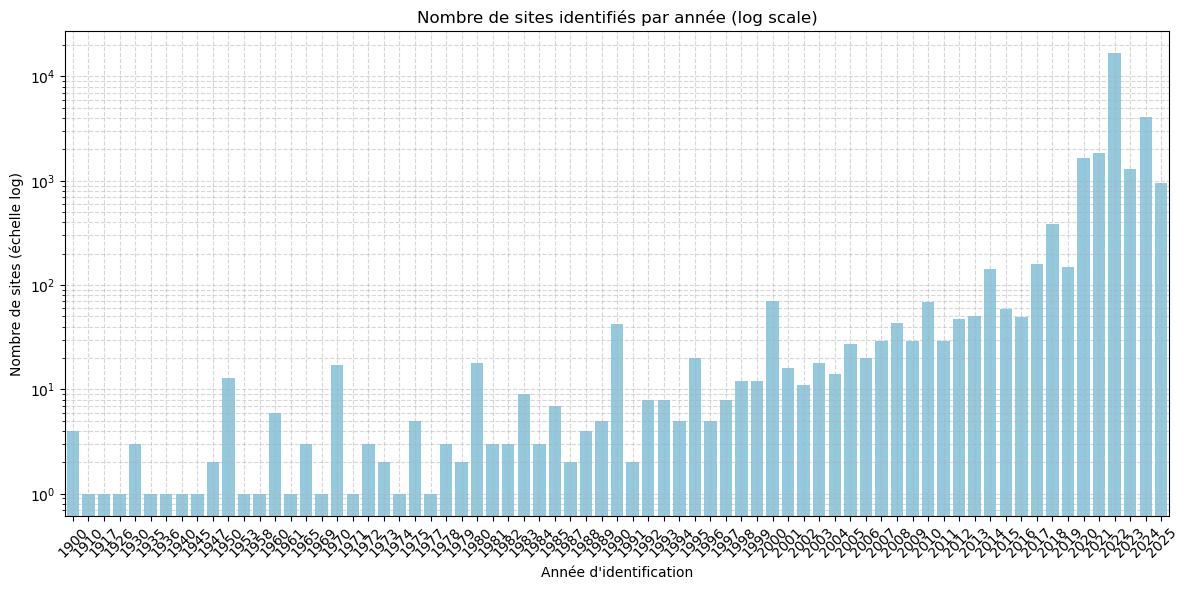

In [24]:
#Distribution des données temporelles
df_work = df.copy()

df_work["site_identif_date"] = df_work["site_identif_date"].apply(clean_site_identif)
df_work['site_actu_date'] = df_work['site_actu_date'].apply(clean_site_identif)

df_years = (
    df_work['site_identif_date']
    .dt.year
    .dropna()
    .astype('int')
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_years.index, y=df_years.values, color='skyblue')
plt.yscale('log')  # 🔥 la ligne clé
plt.xticks(rotation=45)
plt.xlabel("Année d'identification")
plt.ylabel("Nombre de sites (échelle log)")
plt.title("Nombre de sites identifiés par année (log scale)")
plt.grid(True, linestyle='--', alpha=0.5, which='both')
plt.tight_layout()
plt.show()


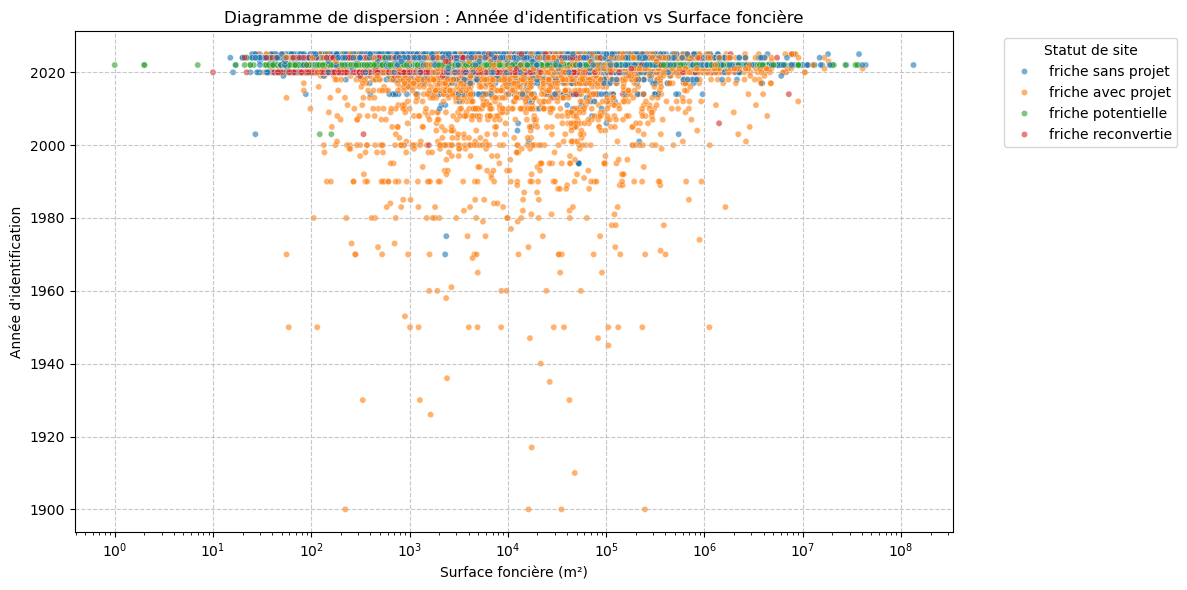

In [37]:
df['unite_fonciere_surface'] = pd.to_numeric(df['unite_fonciere_surface'], errors='coerce')

df_scatter = df_work[
    df_work['site_identif_date'].notna() &
    df_work['unite_fonciere_surface'].notna() &
    df_work['site_identif_date'].dt.year.between(1900, 2025)
].copy()

df_scatter['annee_identif'] = df_scatter['site_identif_date'].dt.year.astype('Int64')
df_scatter['site_statut'] = df_scatter['site_statut'].astype(str).str.strip().str.lower()

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_scatter,
    x='unite_fonciere_surface',
    y='annee_identif',
    hue='site_statut',
    alpha=0.6,
    s=20
)
plt.title("Diagramme de dispersion : Année d'identification vs Surface foncière")
plt.xlabel("Surface foncière (m²)")
plt.ylabel("Année d'identification")
plt.xscale("log")  # log appliqué sur l’axe des surfaces désormais horizontal
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Statut de site', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
audit_dataframe_by_domain(df, "temporel")

colonne  valeur_manquant_reel  valeur_manquant_effectif  \
0   site_identif_date                     0                         0   
1      site_actu_date                     0                         0   
2   site_reconv_annee                 28115                     28115   
3  activite_fin_annee                 24109                     24389   
4  local_ancien_annee                 12772                     12772   
5  local_recent_annee                 10694                     10694   
6       TOTAL DOMAINE                 75690                     75970   

   taux_doublons_(%) Modalite_Dominante Dominance_(%) Nb_Valeurs_Uniques  \
0              97.93         2022-10-10          56.0                581   
1              98.11         2022-10-10          55.4                532   
2             100.00               None           NaN                  0   
3              99.74               2010           8.5                 72   
4              98.85             1900.0           7.5                323   
5              98.94             1900.0           5.8                298   
6              98.93                N/A           N/A                N/A   

   Nb_Lignes_Valides_Selon_Regle  Taux_Validite_Effectif_(%)  \
0                          28083                       99.89   
1                          28086                       99.90   
2                              0                        0.00   
3                              0                        0.00   
4                          14507                       94.55   
5                          16877                       96.88   
6                          87553                       94.43   

                          Top3_Modalites_Non_Valides  
0       {'14-09-23': 4, '6-09-23': 3, '12-03-24': 3}  
1  {'0014-09-23': 4, '0006-09-23': 3, '0012-03-24...  
2                                     {'nan': 28115}  
3        {'nan': 24109, '2010': 315, 'inconnu': 280}  
4       {'nan': 12772, '1700.0': 213, '1750.0': 175}  
5       {'nan': 10694, '1700.0': 139, '1750.0': 116}  
6                                                N/A

In [39]:
display(HTML(encadre_html("site_identif_date", niveau="vert")))

#### Site_identif_date (date d’identification du site)
100% de valeurs manquantes. Aucune friche n’a de date indiquant quand elle a été identifiée/inscrite dans Cartofriches.  
**Problème** : On ne sait pas de quand datent les entrées, ce qui empêche de suivre l’historique d’intégration ou de filtrer les sites par ancienneté dans l’inventaire.  
Présence de formats non standard `'6-09-23', '14-09-23', '31-05-23', '1-08-23'` **JJ/MM/AAAA**.
Et autres formats ambigus `'1-12-31'` → pourrait être 1er décembre 1931, ou 31 décembre 2001. ces valeurs sont très révélateurs de saisies manuelles pour site_actu_date: donc soit les données ont été agrégées a partie de bases de données externes soient urbansimul permet des saisies non stdanrdisées.
**Causes** : Ce champ n’était sans doute pas alimenté par les sources externes (BASIAS, etc., ne fournissent pas une date de “découverte” de la friche). Cartofriches n’a pas non plus historisé la date d’ajout initiale dans la base nationale, d’où un champ vide.  
**Recommandations** : Si possible, renseigner a posteriori la date d’entrée dans l’inventaire national. Par exemple, de nombreux sites semblent provenir du chargement initial de BASIAS en octobre 2022 – on pourrait leur attribuer la date 2022-10-10 (observée comme date d’actualisation massivement répétée). D’autres provenances pourraient être datées d’après les appels à projets ou mises à jour Cerema. Pour les nouvelles saisies, implémenter automatiquement le timestamp d’identification. À défaut, documenter que ce champ est inopérant dans l’état actuel et le retirer de l’export CSV pour éviter toute confusion.

In [40]:
result = detect_typos_and_invalids(df, 'site_identif_date', ALL_VALIDATION_RULES)
df_typos = result['typo_patterns']
df_invalids = result['invalid_values']

#### Nettoyage des colonnes de dates et gestions des outliers

In [41]:
df['site_identif_date'].map(lambda x: type(x).__name__).value_counts()

site_identif_date
str    28115
Name: count, dtype: int64

In [42]:
detect_typo_patterns(df["site_identif_date"])

Pattern typologique  Longueur     Exemple  Fréquence
0          0000X00X00        10  2025-03-05      28083
1            00X00X00         8    16-10-23         21
2             0X00X00         7     6-09-23         11

In [43]:
display(HTML(encadre_html("site_actu_date", niveau="vert")))

#### site_actu_date (date de dernière actualisation)
Présent dans ~79% des fiches (seulement 20,7% de NaN). Cependant, la valeur modale est “2022-10-10” pour plus de 15 500 sites, ce qui indique que la plupart des enregistrements n’ont pas été mis à jour depuis le chargement initial à l’automne 2022. Les autres valeurs d’actualisation doivent correspondre à des mises à jour ponctuelles (par ex. quelques sites mis à jour en 2023 ou 2024).  
**Problèmes** : la concentration des dates identiques montre un manque de fréquence de mise à jour – de nombreux sites ont potentiellement des informations périmées (plus de 2 ans sans actualisation). Par ailleurs, quelques dates futures ou incohérentes pourraient exister (pas observées ici, mais à vérifier, ex. si la date était mal formatée).  
  
**Causes** : Le gros du jeu de données provient d’imports de bases externes à une date donnée (ex. intégration de BASIAS/BASOL en bloc) plutôt que de mises à jour continues. Ensuite, l’effort de mise à jour manuelle ou via les observatoires locaux a été limité, d’où peu de changement de date.  
**Recommandations** : Mettre en place un suivi des mises à jour plus systématique. Cela peut passer par des synchronisations annuelles avec les sources (si BASIAS/BASOL sont mis à jour) ou par sollicitation des acteurs locaux pour revoir les fiches. Il serait pertinent de stocker aussi la date de création initiale (manquante actuellement) pour distinguer l’ancienneté vs. la fraicheur de l’info. En attendant, on peut identifier les sites potentiellement obsolètes en calculant le délai depuis site_actu_date et en priorisant ceux dont la date est la plus ancienne (plus de 2–3 ans) pour vérification. (Complétion suggérée) : Une idée serait de lier Cartofriches à une API d’observatoire ou de data.gouv permettant de notifier des changements (par ex., si un site Basol change d’état, mettre à jour automatiquement), afin d’améliorer la réactivité des actualisations.

In [44]:
df['site_actu_date'].map(lambda x: type(x).__name__).value_counts()

site_actu_date
str    28115
Name: count, dtype: int64

In [45]:
detect_typo_patterns(df["site_actu_date"])

Pattern typologique  Longueur     Exemple  Fréquence
0          0000X00X00        10  2025-03-05      28115

📊 Moyenne de l'ancienneté (≤ 9000 jours) : 1068.74 jours
🔹 Médiane : 967 jours
± Écart type : 889.27 jours
📈 Nombre de points : 27862 / 27862


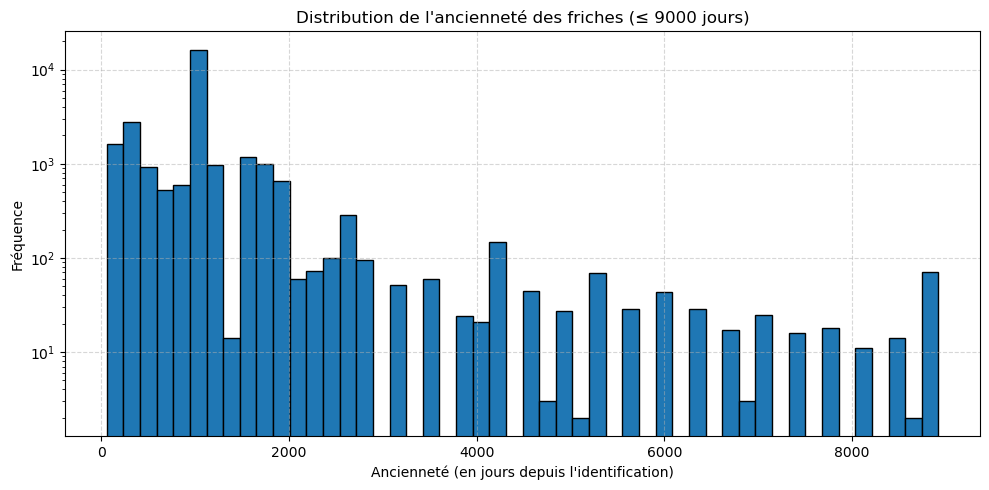

In [46]:
# Calcul de l'ancienneté depuis aujourd'hui
today = pd.Timestamp.today().normalize()
df_work['anciennete_jours'] = (today - df_work['site_identif_date']).dt.days

# Filtrage : dates entre 2000 et aujourd’hui
mask_valid = (
    df_work['site_identif_date'].dt.year.between(2000, today.year) &
    df_work['anciennete_jours'].notna()
)
df_valid = df_work.loc[mask_valid].copy()

# Fenêtre raisonnable (ex: max 25 ans ~ 9000 jours)
anciennete_max = 9000
df_windowed = df_valid[df_valid['anciennete_jours'].between(0, anciennete_max)].copy()

# Statistiques
mean_ = df_windowed['anciennete_jours'].mean()
median_ = df_windowed['anciennete_jours'].median()
std_ = df_windowed['anciennete_jours'].std()

print(f"📊 Moyenne de l'ancienneté (≤ {anciennete_max} jours) : {mean_:.2f} jours")
print(f"🔹 Médiane : {median_:.0f} jours")
print(f"± Écart type : {std_:.2f} jours")
print(f"📈 Nombre de points : {len(df_windowed)} / {len(df_valid)}")

# Histogramme
plt.figure(figsize=(10, 5))
df_windowed['anciennete_jours'].hist(bins=50, edgecolor='black')
plt.title(f"Distribution de l'ancienneté des friches (≤ {anciennete_max} jours)")
plt.xlabel("Ancienneté (en jours depuis l'identification)")
plt.ylabel("Fréquence")
plt.yscale("log")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Ces variables sont les seules variables temporelles que l'on a elles indiquent la date de saisie des données et leurs mises a jour site_actu date est un bon indicateur de la qualité de la maintenance du site.  
On peut estimer le délai de mise a jour moyen des données, et aussi la récurence de ces mises à jour, il nous manquerai juste une information si jamais il y a des mises a jour multiples.
On peut aussi déterminer la fréquence des mises à jour.

In [47]:
import plotly.express as px

# Filtrage sur les dates entre 2019 et 2025
mask_years = df_work["site_identif_date"].dt.year.between(2019, 2025)
df_filtered = df_work.loc[mask_years]

# Agrégation par mois
df_filtered['periode'] = df_filtered['site_identif_date'].dt.to_period('M').dt.to_timestamp()

# Comptage par mois
agg = df_filtered['periode'].value_counts().sort_index().reset_index()
agg.columns = ['Date', 'Nombre de friches']

# Plot avec échelle log
fig = px.line(
    agg,
    x='Date',
    y='Nombre de friches',
    title='Nombre de friches identifiées par mois (2020–2025)',
    markers=True
)

fig.update_layout(
    xaxis_title="Date d'identification",
    yaxis_title="Nombre de friches (log)",
    yaxis_type='log',
    template="plotly_white"
)

display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))

In [48]:
display(HTML(encadre_html("local_xx_annee", niveau="rouge")))

#### local_ancienne_annee / local_recent_annee (années de construction du plus ancien et plus récent bâtiment)
Ces deux champs sont totalement vides (100% NaN) en export, mais l’audit laissait entrevoir des “1900” comme valeurs fréquentes (ce qui suggère que 1900 a été utilisé comme substitut d’absence de données pour ces champs). Donc possiblement présents dans la base sous forme “1900” mais convertis en NaN dans l’audit à cause du type? Ou inversement, “1900” a été vu en top valeur, ce qui veut dire qu’il a été enregistré comme chaîne, pas en datetime.  
**Problèmes** : Quoiqu’il en soit, on n’a pas d’informations fiables sur l’âge des bâtiments sur site. Et le cas échéant, la valeur “1900” est un fourre-tout qui fausse la donnée (très peu de friches ont vraiment un bâtiment construit exactement en 1900, c’est plutôt avant 1914 etc. ⚠️ ce champ permet de connaître quels batiments sont concernés par la présence potentiel d'amiante.   
**Causes** : Par manque de données, ces champs n’ont pas été alimentés. Le standard autorise la valeur vide, mais on soupçonne qu’un système a mis 1900 par défaut quand année non connue.  
**Recommandations** : Purger les “1900” qui n’ont pas de sens (ou toute autre valeur par défaut improbable). Si quelques sites ont de vraies années (par ex. on aurait pu en renseigner sur des friches patrimoniales connues), les conserver. Sans données cadastre détaillées, ces champs resteront vides. On peut alors envisager de ne pas les afficher ou de les renseigner via un travail ultérieur (ex: requête sur l’année de construction moyenne des bâtiments de la parcelle via MAJIC, mais c’est complexe et soumis à confidentialité). Bref, à court terme : considérer ces champs comme non disponibles, et les retirer pour ne pas induire l’utilisateur en erreur.

In [49]:
display(HTML(encadre_html("site_reconv_annee", niveau="gris")))

#### site_reconv_annee ( année de réhabilitation de la friche)

**Problème:** Ce champ est complètement vide. Le standard autorise la valeur vide mais il permettrait la traçabilité des données surtout que au moins 20% ⚠️reverifier  des friches recensées sont déja reconverties.  
**Recommendations:** Ce champ n'est pas critique dans le cadre de cartofriche mais il gagnerai a être documenté pour les acteurs de l'urbanisme ou du batiment pour les futurs projet immobiliers et la traçabilité des transformations.

In [50]:
display(HTML(encadre_html("activite_fin_annee", niveau="orange")))

#### activite_fin_annee (année de fin d’activité)
86,75 de rempli, ce qui est surprenant mais signifie que quasiment tous les sites ont une date de cessation d’activité indiquée. La valeur la plus fréquente est 2010 (315 occurrences). Cela indique beaucoup d’arrêts autour de 2010, mais globalement les années doivent s’échelonner du milieu XX° siècle à 2020.  
**Problèmes** : Ce champ est bien rempli mais la fiabilité de l’information peut varier – certaines dates peuvent être par défaut ou arrondies à la décennie. Le fait que 2010 ressorte peut correspondre à une vague de fermetures industrielles, ou simplement à la date arbitraire assignée lorsqu’aucune info précise n’était disponible.  
**Causes** : BASIAS inclut souvent l’année de cessation d’activité (quitte à indiquer 1990 par défaut si l’activité a cessé “avant 1990”, etc.). Il est possible que pour les sites toujours en activité ou incertains, une valeur “1900” ait été utilisée comme code inconnu – à vérifier dans la distribution. (On ne le voit pas en mode ici, signe que ça n’a pas été le cas fréquent, ou ces “1900” ont été filtrés).  
**Recommandations** : Nettoyer les années aberrantes : si “1900” apparaît pour signifier “inconnue”, il faut le traiter comme manquant. De même, vérifier s’il y a des années dans le futur ou très lointaines par erreur de saisie. Sinon, ce champ est exploitable en l’état. On peut envisager de le croiser avec site_actu_date pour repérer les friches très anciennes non remises en usage (écart > 50 ans par ex). Documentation : préciser s’il s’agit de l’année de fin de l’activité principale sur le site (et si oui, laquelle en cas de multiples activités).
Données surfaciques.

⚠️ séparer les graphiques, 
revoir le graphique diagramme de dispersion, illisible

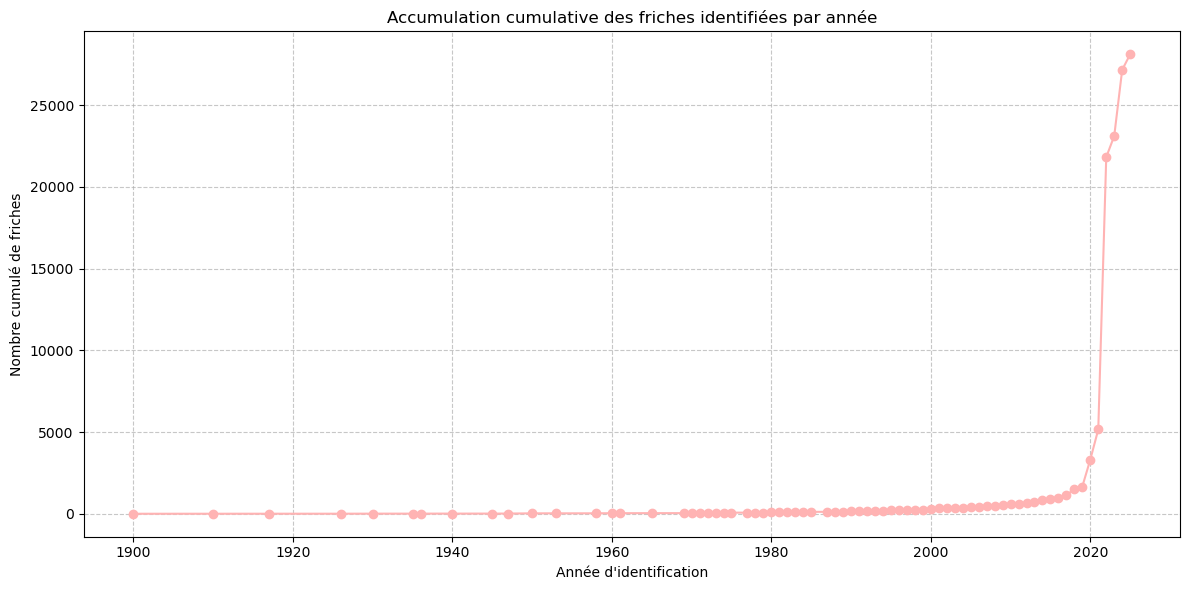

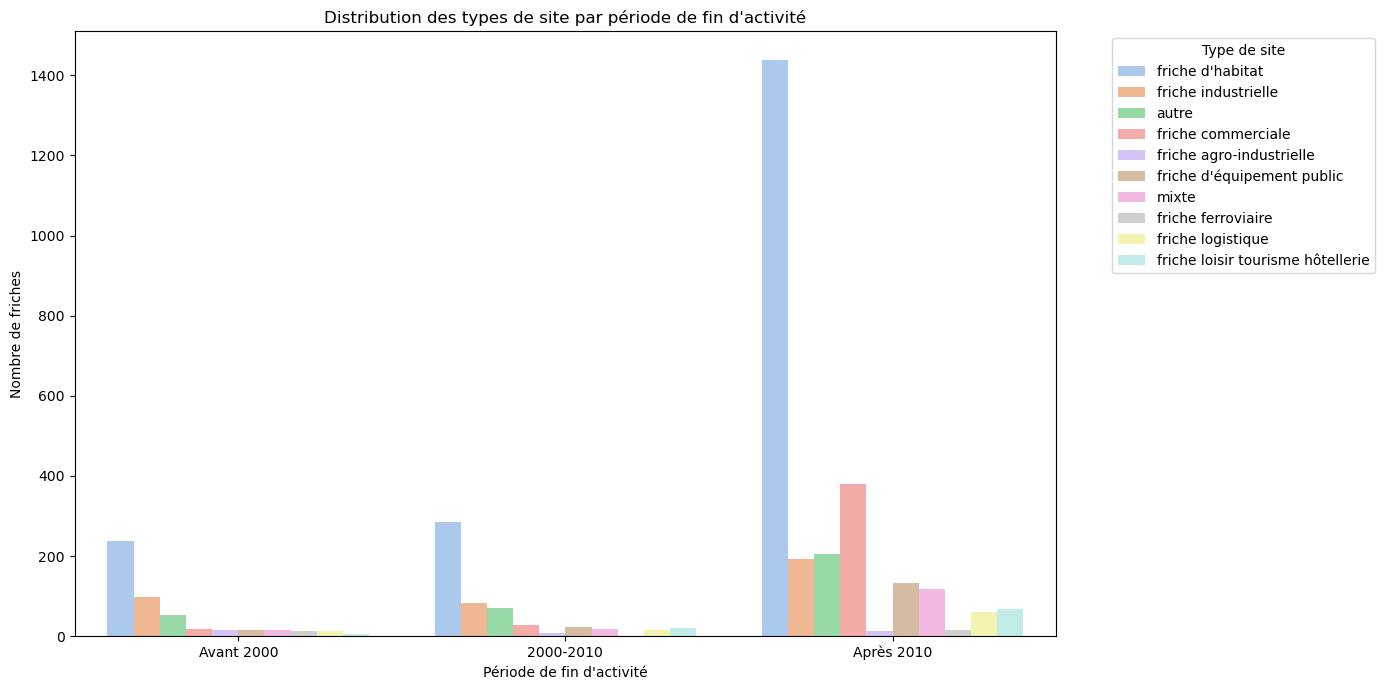

In [51]:
# Analyse temporelle des friches

# 1. Histogramme du nombre de friches par année d'identification
df_valid_years = df_work[
    df_work['site_identif_date'].notna() &
    df_work['site_identif_date'].dt.year.between(1900, 2031)
].copy()

# Créer une colonne avec uniquement l'année (entier nullable pour éviter les erreurs)
df_valid_years['annee_identif'] = df_valid_years['site_identif_date'].dt.year.astype('Int64')

# Compter le nombre de friches par année
friches_par_annee = df_valid_years['annee_identif'].value_counts().sort_index()

# 2. Graphique cumulatif des friches par année d'identification
friches_cumulatives = friches_par_annee.sort_index().cumsum()

plt.figure(figsize=(12, 6))
friches_cumulatives.plot(kind='line', marker='o', color='#FFB3B3')
plt.title("Accumulation cumulative des friches identifiées par année")
plt.xlabel("Année d'identification")
plt.ylabel("Nombre cumulé de friches")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Croisement entre ancienneté (année de fin d'activité) et autres variables
df_end_year = df[df['activite_fin_annee'].notna()].copy()
df_end_year['activite_fin_annee'] = pd.to_numeric(df_end_year['activite_fin_annee'], errors='coerce')
df_end_year = df_end_year[df_end_year['activite_fin_annee'].notna()]

bins = [1900, 2000, 2010, 2025]
labels = ['Avant 2000', '2000-2010', 'Après 2010']
df_end_year['periode_fin_activite'] = pd.cut(df_end_year['activite_fin_annee'], bins=bins, labels=labels, right=False)

site_type_by_period = df_end_year.groupby('periode_fin_activite')['site_type'].value_counts(dropna=False).reset_index(name='count')
top_types = df_end_year['site_type'].value_counts().head(10).index.tolist()
site_type_by_period_filtered = site_type_by_period[site_type_by_period['site_type'].isin(top_types)]

plt.figure(figsize=(14, 7))
sns.barplot(
    data=site_type_by_period_filtered,
    x='periode_fin_activite',
    y='count',
    hue='site_type',
    palette='pastel'
)
plt.title("Distribution des types de site par période de fin d'activité")
plt.xlabel("Période de fin d'activité")
plt.ylabel("Nombre de friches")
plt.xticks(rotation=0)
plt.legend(title='Type de site', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Interprétation et recommandations : Les lacunes temporelles (années manquantes) signifient qu’il faudra être prudent dans l’analyse des tendances historiques – beaucoup de sites ne peuvent pas être situés dans le temps, ce qui empêche de savoir s’ils datent par exemple de périodes industrielles spécifiques. Il serait utile d’enquêter sur les outliers identifiés : une date incohérente doit être vérifiée (peut-être s’agit-il d’une erreur de formatage, comme une confusion de siècle ou l’utilisation d’une date par défaut “1900” en cas de valeur manquante). La distribution inégale des dates suggère que certaines périodes ont été plus propices à la formation de friches (ex : déclin industriel durant une décennie donnée) ou bien que les efforts de recensement se sont intensifiés à certaines époques. Il est recommandé de contextualiser ces tendances avec l’histoire locale et de combler, si possible, les lacunes en recherchant des données supplémentaires pour les sites dont les dates sont inconnues. Visualisations suggérées :
Un histogramme du nombre de friches par année (ou une courbe temporelle) pour visualiser les tendances globales et repérer les années anormalement hautes ou basses en nombre de sites.
Un graphique cumulatif montrant l’accumulation des friches au fil du temps (si la date de découverte ou de mise en friche est disponible) afin de voir l’évolution du phénomène et d’identifier des points de changement.
Une mise en évidence des outliers temporels, par exemple via un diagramme de dispersion où l’axe des X serait l’année et l’axe des Y une autre variable (taille du site, type, etc.), pour voir si les sites aux dates extrêmes ont des caractéristiques particulières.
Un croisement entre l’ancienneté et d’autres variables (par ex. comparer la distribution des types de friches ou le statut de pollution selon les périodes) pour déceler d’éventuels liens entre l’époque de fermeture et la nature des sites.

### 📍 Données de localisation

La qualité des informations géographiques (coordonnées, adresses, communes) influence fortement les analyses spatiales :
Coordonnées manquantes ou imprécises : Certains enregistrements n’ont pas de coordonnées GPS renseignées, ou seulement une localisation partielle (par ex. commune sans adresse précise). Cela empêche de cartographier ces sites avec précision.
Anomalies géographiques : On note la présence possible de coordonnées incohérentes (p. ex. une inversion latitude/longitude ou un point situé en dehors de la zone du Loiret). Ces cas isolés suggèrent des erreurs de saisie ou de format.
Doublons spatiaux : Plusieurs sites partagent exactement les mêmes coordonnées, ce qui indique potentiellement des doublons (le même lieu inventorié deux fois) ou des friches distinctes très rapprochées géographiquement.
Concentration spatiale : La distribution des sites n’est pas uniforme sur le territoire. Quelques communes ou zones concentrent une grande partie des friches, tandis que d’autres en comptent très peu, ce qui peut introduire un biais géographique.

**Interprétation et recommandations** : Les coordonnées manquantes ou imprécises limitent l’utilité du jeu de données pour des analyses cartographiques et la planification territoriale. Il serait pertinent de géocoder les adresses manquantes ou de compléter ces informations via d’autres sources afin de pouvoir intégrer tous les sites dans les études spatiales. Les anomalies repérées (coordonnées hors zone attendue) devraient être vérifiées et corrigées, car elles peuvent fausser les analyses (par exemple un site affiché à l’étranger par erreur). La détection de doublons géographiques implique d’établir une procédure de regroupement des entrées dupliquées : si deux enregistrements représentent le même site, ils devraient être fusionnés pour éviter une double comptabilisation. Enfin, la forte concentration de friches dans certains secteurs peut indiquer des zones industrielles historiques ou un effort de recensement inégal selon les communes. Il faudra en tenir compte dans l’analyse, par exemple en comparant les contextes locaux ou en normalisant par la taille de la commune ou de la population afin de relativiser ces concentrations.

In [52]:
audit_dataframe_by_domain(df, "localisation")

colonne  valeur_manquant_reel  valeur_manquant_effectif  \
0       comm_nom                   132                       132   
1     comm_insee                   132                       132   
2      geompoint                     0                         0   
3       geomsurf                 28115                     28115   
4   site_adresse                 24125                     24125   
5  TOTAL DOMAINE                 52504                     52504   

   taux_doublons_(%)        Modalite_Dominante Dominance_(%)  \
0              66.60                 ANGOULEME           2.5   
1              67.49                     16015           2.5   
2               4.09  POINT (3.175503 50.7054)           0.1   
3             100.00                      None           NaN   
4              86.79                LE VILLAGE           0.8   
5              64.99                       N/A           N/A   

  Nb_Valeurs_Uniques  Nb_Lignes_Valides_Selon_Regle  \
0               9390                          27983   
1               9138                          27839   
2              26966                          28115   
3                  0                              0   
4               3713                           3892   
5                N/A                          87829   

   Taux_Validite_Effectif_(%)                      Top3_Modalites_Non_Valides  
0                      100.00                                    {'nan': 132}  
1                       99.49           {'nan': 132, '2a004': 17, '2a247': 6}  
2                      100.00                                          Aucune  
3                        0.00                                          Aucune  
4                       97.54  {'nan': 24125, 'le village': 33, 'woignas': 4}  
5                       99.73                                             N/A

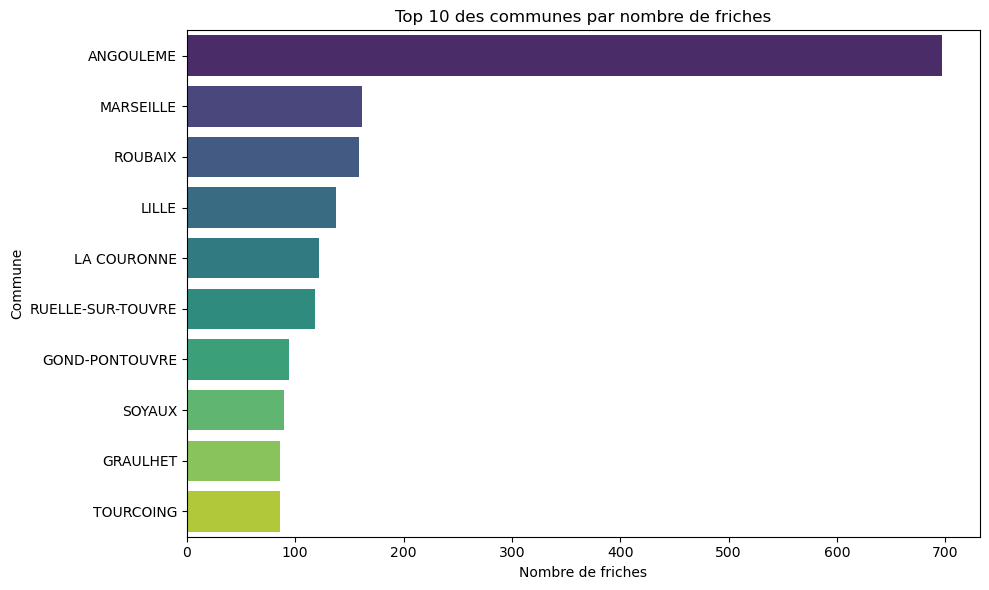

In [53]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Sélection des colonnes utiles pour l’analyse géographique
colonnes_utiles = [
    'site_id', 'site_nom', 'site_type', 'site_statut',
    'comm_nom', 'geompoint'
]
df_geo = df[colonnes_utiles].copy()
df_geo = df_geo[df_geo['geompoint'].notna()]

# Extraction des coordonnées depuis la colonne geompoint (format WKT)
def extract_coords(geompoint_str):
    if isinstance(geompoint_str, str) and 'POINT' in geompoint_str.upper():
        coords = geompoint_str.replace('POINT (', '').replace(')', '').split()
        if len(coords) == 2:
            try:
                return float(coords[0]), float(coords[1])
            except ValueError:
                return None, None
    return None, None

df_geo[['longitude', 'latitude']] = df_geo['geompoint'].apply(lambda x: pd.Series(extract_coords(x)))
df_geo = df_geo.dropna(subset=['longitude', 'latitude'])

# Filtrage spatial : France métropolitaine
min_lon, max_lon = -5, 9
min_lat, max_lat = 41, 51
df_geo_filtered = df_geo[
    (df_geo['longitude'] >= min_lon) & (df_geo['longitude'] <= max_lon) &
    (df_geo['latitude'] >= min_lat) & (df_geo['latitude'] <= max_lat)
].copy()
df_outliers = df_geo[~df_geo.index.isin(df_geo_filtered.index)].copy()

# --- 2. Cercles proportionnels par commune ---
friches_par_commune = df_geo_filtered['comm_nom'].value_counts().reset_index()
friches_par_commune.columns = ['comm_nom', 'nombre_friches']

coords_moyennes = df_geo_filtered.groupby('comm_nom')[['latitude', 'longitude']].mean().reset_index()
communes_avec_nombre = pd.merge(coords_moyennes, friches_par_commune, on='comm_nom')

fig_density = px.scatter_mapbox(
    communes_avec_nombre,
    lat="latitude",
    lon="longitude",
    size="nombre_friches",
    color="nombre_friches",
    hover_name="comm_nom",
    hover_data=["nombre_friches"],
    color_continuous_scale=px.colors.sequential.Viridis,
    zoom=6,
    height=600,
    title="Densité de friches par commune"
)

fig_density.update_layout(
    mapbox_style="carto-positron",
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title="Nb Friches"),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)
display(HTML(fig_density.to_html(full_html=False, include_plotlyjs='cdn')))


# --- 3. Top 10 communes ---
top_10_communes = friches_par_commune.sort_values(by='nombre_friches', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='nombre_friches', y='comm_nom', data=top_10_communes, palette='viridis')
plt.title("Top 10 des communes par nombre de friches")
plt.xlabel("Nombre de friches")
plt.ylabel("Commune")
plt.tight_layout()
plt.show()

# --- 4. Doublons spatiaux ---
df_geo_filtered['is_duplicate_coord'] = df_geo_filtered.duplicated(subset=['longitude', 'latitude'], keep=False)

fig_duplicates = px.scatter_mapbox(
    df_geo_filtered,
    lat="latitude",
    lon="longitude",
    hover_name="site_nom",
    hover_data=["comm_nom", "site_type", "site_statut"],
    color="is_duplicate_coord",
    color_discrete_map={True: 'red', False: '#A3C1E1'},
    zoom=6,
    height=600,
    title="Doublons spatiaux (points superposés)"
)

fig_duplicates.update_layout(
    mapbox_style="carto-positron",
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)
display(HTML(fig_duplicates.to_html(full_html=False, include_plotlyjs=False)))


In [54]:
display(HTML(encadre_html("comm_insee", niveau="vert")))

#### comm_insee* (code INSEE de la commune)
Comme pour le nom de commune, pas de NaN direct (0.94% manquants) mais beaucoup de codes non valides (probablement “inconnu” ou vide masqué). On observe par exemple le code 16015 (Angoulême) comme valeur la plus fréquente, ce qui correspond au fait qu’Angoulême concentre de nombreux sites (697 sites, record national).  
**Problèmes** : un code INSEE “inconnu” n’est pas exploitable pour les jointures avec d’autres référentiels. De plus, l’absence de code valide pour autant de cas signale possiblement un défaut de correspondance entre comm_nom et comm_insee pour certains enregistrements.   
**Causes** : Même causes que pour comm_nom – données sources incomplètes. Il est possible que pour les sites “inconnus”, aucun code n’ait pu être attribué (commune non déterminée). Il se peut aussi que certains codes présents soient obsolètes (fusion de communes non mises à jour, codes postaux pris à tort pour code INSEE, etc.).  
**Recommandations** : Nettoyer et compléter les codes INSEE en se basant sur le nom de commune (quand connu) ou par reverse geocoding des coordonnées. Mettre en place un contrôle de validité (5 caractères numériques correspondant à une commune réelle du bon département). Lorsque le nom est “inconnu” mais que le département est connu (voir ci-dessous), on peut au moins inférer le code du département (les deux premiers chiffres du code INSEE). Sinon, mieux vaut laisser la valeur vide que “inconnu”.

In [55]:
detect_typo_patterns(df["comm_insee"])

Pattern typologique  Longueur Exemple  Fréquence
0               00000         5   61214      27839
1               0A000         5   2B185        144

⚠️ interpoller avec d'autres colonnes essayer de comprendre pourquoi ces valeurs manquent pour proposer des correctifs durables pourtant elles sont obligatoires

In [56]:
display(HTML(encadre_html("comm_nom", niveau="vert")))

#### comm_nom* (commune d’implantation)
Aucune valeur nulle techniquement (0,47% NaN), avant transformation 132/28115 , certainnes valeurs étaient "inconnu".
**Problèmes** : la commune est une information fondamentale, son absence empêche l’agrégation territoriale (par commune, département…).
**Causes** : Ces “commune inconnue” proviennent probablement de données mal géoréférencées initialement – par exemple des sites pour lesquels seule une région ou des coordonnées approximatives existaient. Il est aussi possible qu’une erreur de lecture du CSV ait traité des valeurs manquantes comme du texte.  
**Recommandations** : Vérifier la cohérence commune/coordonnées – pour chaque “commune inconnue”, on peut tenter de déterminer la commune via les coordonnées géographiques (si dispos) ou via le code parcelle. Idéalement, aucun site ne devrait rester sans commune : il faudrait effectuer un rattrapage manuel pour ces 132 de cas, en utilisant des outils SIG pour retrouver la commune d’appartenance. Par ailleurs, remplacer “inconnu” par une valeur nulle serait préférable pour bien marquer le manque d’info. On peut aussi mettre en place une contrainte : ne pas accepter de nouvelle fiche sans commune (quitte à utiliser la commune la plus proche connue).

In [57]:
index_vide = df.loc[df["comm_nom"].isna()].index

In [58]:
df["source_nom"].iloc[index_vide].value_counts()

Series([], Name: count, dtype: int64)

In [59]:
detect_typo_patterns(df["comm_nom"])

Pattern typologique  Longueur  \
4                              AAAAAA         6   
5                             AAAAAAA         7   
7                           AAAAAAAAA         9   
6                            AAAAAAAA         8   
3                               AAAAA         5   
...                               ...       ...   
1122                      AXAAAAXAAAA        11   
49    AAAAAAAAAAAXAAAAAAAAAAXAAXAAAAA        31   
169           AAAAAAAAAXAAXAAAAAXAAAA        23   
173                    AAAAAAAAAXAXAA        14   
1102                             AXAA         4   

                              Exemple  Fréquence  
4                              CROZET       3200  
5                             BALOGNA       2576  
7                           COLOMIERS       2551  
6                            Barentin       2361  
3                               Flers       1894  
...                               ...        ...  
1122                      L'ISLE-ADAM          1  
49    VILLENTROIS-FAVEROLLES-EN-BERRY          1  
169           DOMMARTIN-LE-SAINT-PERE          1  
173                    HOMECOURT,JŒUF          1  
1102                             Sées          1  

[1152 rows x 4 columns]

In [60]:
display(HTML(encadre_html("site_adresse", niveau="rouge")))

#### site_adresse (adresse détaillée)
Seulement ~14% des sites ont une adresse renseignée. Même parmi les adresses présentes, beaucoup sont partielles (par ex. « Le Village » est la plus courante avec 46 occurrences – un libellé très générique de lieu-dit). ce champ peut être primordiale dans le cas du référencement d'un local ou batiment en particulier. 
**Problèmes** : L’absence d’adresse précise pour la majorité des sites rend difficile le géoréférencement exact hors usage des coordonnées. De plus, certaines adresses sont peu informatives ou non normalisées (lieux-dits sans numéro, tout en majuscules, etc.).  
**Causes** : BASIAS fournit souvent la commune et le lieu-dit plutôt qu’une adresse postale exhaustive, expliquant ces nombreux vides. Les sites repérés par photo aérienne ou déclaration sommaire n’ont pas toujours d’adresse.  
**Recommandations** : Améliorer la collecte d’adresses lors des contributions locales (encourager la saisie de la voie, du numéro et du lieu-dit). Enrichir a posteriori via un géocodage inverse des coordonnées disponibles – par exemple utiliser la BAN (Base Adresse Nationale) pour retrouver une adresse proche. Il est utile de stocker séparément les composants (n°, voie, lieu-dit, code postal) pour homogénéiser le format. Enfin, considérer qu’en l’absence d’adresse, la commune et un lieu-dit ou des coordonnées approximatives doivent suffire à identifier la friche – documenter explicitement ces cas. Les coordonnées géographiques permettront d'enrichir éventuellement les adresses, mais une vérification visuelle ou une prédiction multisource sera necéssaire.

In [61]:
detect_typo_patterns(df["site_adresse"])

Pattern typologique  Longueur                      Exemple  \
1927                   AAXAAAAAAA        10                   LE VILLAGE   
287              000XAAAXAAXAAAAA        16             259 RUE DE PLAIN   
744              00XAAAXAAXAAAAAA        16             53 RUE DU MOULIN   
289            000XAAAXAAXAAAAAAA        18           159 rue de Mereges   
746            00XAAAXAAXAAAAAAAA        18           26 Rue du Piquelet   
...                           ...       ...                          ...   
5     0000XAAAAAAXAAAAAAXAAAAAAAA        27  6205 avenue Pierre Marcault   
4           0000XAAAAAAAXAAAAAAAA        21        9002 impasse Trousset   
3            00000XAAXAAAAAXAAAAA        20         05230 La Batie-Neuve   
2             00000XAAAAAXAAAAAAA        19          24110 Saint aquilin   
1                00000XAAAAAAAAAA        16             05190 Espinasses   

      Fréquence  
1927         46  
287          27  
744          26  
289          25  
746          24  
...         ...  
5             1  
4             1  
3             1  
2             1  
1             1  

[2097 rows x 4 columns]

**Commentaire:** la variable site adresse est inhomgène avec 86% de Na des typologies variables, problème de casses, des abréviations dans des cas et d'autres sans abréviation des lieux dits.  
Quels types de friches ont tendance  à ne pas avoir d'adresses? Pourquoi ? réponse partielle, **des friches sur des lieux-dits**

In [62]:
display(HTML(encadre_html("geompoint", niveau="vert")))

#### geompoint* (coordonnées du centroïde en WKT)
Champ ajouté lors de l’analyse (non présent tel quel dans le CSV original, il a été construit à partir de la latitude/longitude). 95,9% des sites ont une coordonnée (26966 points renseignés), ⚠️ quantifier sont en doublons. Le format est POINT (lon lat). La valeur la plus fréquente – “POINT (3.175503 50.7054)” – apparaît 18 fois, ce qui signifie qu’il y a 18 sites pile au même endroit (même coordonnées). Cela peut indiquer des doublons géographiques (plusieurs enregistrements pour un même lieu) ou un arrondi ayant fusionné des points très proches.  
**Problèmes** : Quelques sites  De plus, le fait que 18 sites partagent exactement le même point suggère soit des doublons de saisie, soit une imprécision (ex: toutes les friches d’une commune pointées sur la mairie).  
**Causes** : Les clusters de points identiques peuvent provenir de friches sur la même adresse (ex: plusieurs parcelles d’un même site enregistrées séparément) ou d’une localisation par défaut (ex: coordonnées du centre de la commune utilisées pour toutes les friches de cette commune lors de l’import initial BASIAS – d’où 18 sites sur le même point).  
**Recommandations** : Traiter en priorité les friches en doublon. Sinon, si c’est juste un point communal générique, il faudrait affiner en recherchant des informations plus précises (ou au moins disperser légèrement les points pour ne pas confondre, mais c’est du bricolage). Vérifier la précision globale : les coordonnées sont issues des données sources – certaines peuvent être approximatives (ex: données BASIAS souvent pointées au centroïde commune). On pourrait marquer un champ “precision” (non présent) pour indiquer la fiabilité. Pour l’instant, garder en tête que beaucoup de points sont précis à la commune seulement.  
**Amélioration** : lorsque les parcelles seront identifiées, recalculer les centroïdes exacts. Documenter que geompoint est un centroïde approximatif pour visualisation, non l’emprise réelle.

In [63]:
display(HTML(encadre_html("geomsurf", niveau="gris")))

#### geomsurf (géométrie surfacique en WKT)
100% manquante dans l’export – aucun polygone de périmètre n’est fourni. Ce champ était prévu pour contenir la géométrie de la friche (polygone). Son absence totale signifie qu’on ne dispose pas des contours des sites, juste des points.  
**Problèmes** : Sans ces polygones, difficile d’évaluer précisément la surface (d’où le champ site_surface mal rempli), d’analyser les recouvrements (avec zones naturelles, etc.) ou d’afficher l’emprise exacte sur une carte.  
**Causes** : Les données sources n’ont pas été livrées avec les géométries, à l’exception de potentiellement quelques observations locales. De plus, inclure des polygones de milliers de sites dans un CSV aurait été lourd – c’est peut-être volontairement exclu de cette exportation (les polygones sont peut-être seulement dans la base SIG du Cerema).  
**Recommandations** : Récupérer et intégrer les polygones lorsque possible. Cela peut se faire via : (a) les parcelles cadastrales si identifiées, en agrégation, (b) les contours fournis par certaines régions ou EPF, (c) du dessin manuel sur orthophoto. C’est un chantier de fond qui dépasse l’urgence, mais c’est crucial pour la suite (notamment mesurer l’avancement du zéro artificialisation nette). À court terme, on pourrait au moins fournir la surface approximative (ce qui avait été tenté via site_surface, mais avec limites vues). Si la décision est de ne pas publier de polygones pour l’instant, il faut clairement le mentionner. Peut-être que dans l’interface Cartofriches, l’emprise est visible mais pas exportée – il faudrait alors expliquer aux utilisateurs de données que seule une localisation ponctuelle est disponible dans le CSV standard.

### 🏙️ Champs Urbanisme

Problèmes de qualité : Cette section présente des valeurs manquantes notables, notamment pour les champs de zonage urbain (par exemple, les zones d’urbanisme peuvent être non renseignées pour de nombreux sites). On observe aussi des formats de données complexes (le champ des distances de desserte compile plusieurs valeurs séparées par des caractères spéciaux, ce qui le rend difficile à exploiter tel quel). De plus, certaines distributions sont très déséquilibrées : une modalité unique domine la plupart des enregistrements (par exemple, un type de document d’urbanisme couvre l’essentiel des sites), réduisant la diversité d’information utile.
Interprétation : Ces lacunes et déséquilibres suggèrent que l’intégration des données d’urbanisme n’est pas homogène selon les sites. De nombreux champs non renseignés (ou partiellement formatés) limitent la capacité à analyser l’impact du zonage et de l’accessibilité sur la réutilisation des friches. La dominance d’une valeur unique (par exemple, la majorité des sites sous un même régime d’urbanisme) indique un biais potentiel : l’attribut apporte peu de pouvoir discriminant, ce qui complique l’identification de tendances significatives sur ces critères. Il faudra en tenir compte pour ne pas tirer de conclusions hâtives biaisées par la sur-représentation d’un cas général.

In [64]:
audit_dataframe_by_domain(df, "urbanisme")

colonne  valeur_manquant_reel  valeur_manquant_effectif  \
0        urba_zone_type                  3953                      3953   
1         urba_zone_lib                  3953                      3953   
2    urba_zone_formdomi                 23579                     23579   
3         urba_doc_type                  3851                      3918   
4     desserte_distance                 28115                     28115   
5  desserte_commentaire                 28115                     28115   
6         TOTAL DOMAINE                 91566                     91633   

   taux_doublons_(%)                                 Modalite_Dominante  \
0              99.96                                                  U   
1              67.78  ZnC - Secteur non ouvert à la construction, sa...   
2              99.96                                            Habitat   
3              99.98                                                PLU   
4             100.00                                               None   
5             100.00                                               None   
6              94.61                                                N/A   

  Dominance_(%) Nb_Valeurs_Uniques  Nb_Lignes_Valides_Selon_Regle  \
0          66.2                 10                          24148   
1           2.0               9058                          24162   
2          34.1                 11                              0   
3          52.5                  4                          23061   
4           NaN                  0                              0   
5           NaN                  0                              0   
6           N/A                N/A                          71371   

   Taux_Validite_Effectif_(%)  \
0                       99.94   
1                      100.00   
2                        0.00   
3                       95.31   
4                        0.00   
5                        0.00   
6                       92.62   

                          Top3_Modalites_Non_Valides  
0                   {'nan': 3953, '99': 13, 'nd': 1}  
1                                      {'nan': 3953}  
2  {'nan': 23579, 'habitat': 1548, 'espace nature...  
3             {'nan': 3851, 'cc': 1073, 'autre': 67}  
4                                     {'nan': 28115}  
5                                     {'nan': 28115}  
6                                                N/A

In [65]:
display(HTML(encadre_html("urba_doc_type", niveau="orange")))

#### urba_doc_type
(Les champs urba_ décrivent le zonage et le document d’urbanisme applicable sur la friche.) Urba_doc_type (type de document d’urbanisme) : Aucune valeur nulle techniquement (0% NaN), mais pratiquement toutes les friches sont marquées “inconnu” sur ce champ. Quelques valeurs existantes correspondent au type de plan local : on voit par exemple « PLU » apparaître 12 694 fois (ce qui indique que 45% des sites sont sous PLU) et possiblement « CC » (carte communale) ou « RNU » ailleurs. Cependant, il est probable que ces mentions aient été remplies par défaut plutôt que via un vrai croisement.  
**Problèmes** : Pour la moitié des sites, on ignore sous quel règlement d’urbanisme ils se trouvent (PLU intercommunal, plan communal, etc.). Et pour l’autre moitié, l’information est peut-être incomplète ou par défaut (PLU mis dès qu’une commune a un PLU sans préciser plus).  
**Causes** : Le Cerema avait prévu de croiser les coordonnées des friches avec le Géoportail de l’Urbanisme pour renseigner ces champs
cnig.gouv.fr
. Il semble que ce processus n’ait été fait que partiellement ou automatiquement. Le remplissage de “PLU” pour de nombreux sites indique que l’on a pu attribuer le type de doc d’urbanisme pour certaines communes, mais l’absence de détail (inconnu ailleurs) montre une couverture incomplète.  
**Recommandations** : Finaliser le croisement avec les données d’urbanisme nationales
cnig.gouv.fr
. On sait pour chaque commune si un PLU, une carte communale ou le RNU s’applique. Donc, à minima, aucun site ne devrait être “inconnu” sur ce champ : il suffit d’utiliser le statut de la commune. Par exemple, si une commune est sous RNU, toutes ses friches devraient être marquées RNU. Si PLU, marquer PLU. Ce remplissage global est faisable via la liste des documents d’urbanisme approuvés. Ensuite, distinguer éventuellement PLUi (plan local intercommunal) vs PLU communal, etc., selon le besoin. Priorité : élevée, car c’est une donnée contextuelle importante pour la reconversion (règles d’urbanisme applicables).

In [66]:
display(HTML(encadre_html("urba_zone_type", niveau="orange")))

#### urba_zone_type (type de zone de planification)
Là encore, pas de NaN direct mais “inconnu” très fréquent (ex: 89% des sites, 25 297 occurrences). Parmi les zones renseignées, la plus courante est « U » (zone urbaine) avec 15 992 occurrences, loin devant d’autres (on peut supposer que “N”, “AU” etc. apparaissent beaucoup moins).  
**Problèmes** : Le zonage précis de la friche (U = urbain, N = naturel, AU = à urbaniser, etc.) manque pour la vaste majorité. Même les zones indiquées “U” pour plus de la moitié des sites peuvent provenir d’une attribution automatique (toutes friches en PLU mises par défaut en zone U ?). Il y a donc un risque d’information erronée ou incomplète – par exemple, certaines friches rurales en zone N pourraient avoir été notées “inconnu” ou étiquetées U par défaut.  
**Causes** : Le croisement précis avec le zonage n’a probablement pas été fait sauf exceptions. Obtenir le zonage d’une parcelle nécessite la couche SIG du PLU, ce qui est complexe à l’échelle nationale (mais faisable via le géoportail de l’urbanisme qui propose ces données). Le Cerema prévoyait de le faire
cnig.gouv.fr
, mais peut-être après notre extraction de données.  
**Recommandations** : Croiser les coordonnées des sites avec les zonages d’urbanisme disponibles. Beaucoup de PLU numérisés sont sur le géoportail, on peut donc automatiser la récupération du zonage réglementaire de chaque friche (ou de son centre). Cela renseignerait ce champ de façon fiable (typeZone = U, AU, N, etc.). À défaut d’automatisation complète, on peut au moins remplir “RNU” pour les communes sans document d’urbanisme (le standard prévoit de mettre zone_type = RNU dans ce cas
cnig.gouv.fr
). Nettoyage : vérifier si la zone “U” n’a pas été attribuée abusivement. Par exemple, la présence de 15 992 « U » alors que seulement 12 694 PLU sont notés suggère que même des sites en carte communale ou autre ont pu être marqués U (erreur). Il faudra recoder correctement selon le contexte de chaque commune.

In [67]:
display(HTML(encadre_html("urba_zone_lib", niveau="orange")))

#### urba_zone_lib (libellé de la zone d’urbanisme)
Environ 14% des sites ont une valeur, 86% manquent (corrélé à zone_type). Le libellé donne le nom précis de la zone (ex: « ZnC – Secteur non ouvert à la construction… » apparaît, c’est typiquement un libellé de zone inconstructible dans une carte communale, vu 488 fois).  
**Problèmes** : Très peu de friches ont ce niveau de détail. Celles qui l’ont pourraient toutes provenir d’une même source (par ex. des friches d’une région dont on a croisé le zonage CC ou PLU). La majorité est “inconnu”, donc inutilisable.  
**Causes** : Identiques à zone_type – il faut la donnée SIG du PLU pour récupérer le libellé de zone. Visiblement fait pour un nombre limité de cas (peut-être un lot d’essai).  
**Recommandations** : Procéder au remplissage via les données du géoportail en même temps que zone_type. Une fois la zone type identifiée, on peut extraire son libellé. Noter que le standard précise que pour les communes en carte communale, urba_zone_lib = urba_zone_type (par ex. ZnC)
cnig.gouv.fr
, et pour les communes en RNU on met “RNU”. Donc on devrait au moins mettre “RNU” partout où applicable.  
**Documentation** : ce champ n’est pertinent que si le zonage détaillé est connu – sinon le laisser vide. On pourrait envisager de le remplir pour les grandes friches urbaines manuellement en priorité, car le libellé donne des indications (ex: “zone industrielle”, “zone agricole protégée”, etc. qui influencent la reconversion). Urba_zone_formdomi /

In [68]:
display(HTML(encadre_html("urba_zone_formdomi", niveau="gris")))

#### urba_zone_formdomi (forme dominante de la zone)
Ces champs indiquent la forme urbaine dominante (ex: “Urbain dense”, “Rural”), codée et en texte. Actuellement, une partie des valeurs semblent par défaut “1900.0” (ce qui est clairement une anomalie, 1900 n’étant pas une forme d’urbanisme). En effet, on trouve 1900.0 comme mode pour formdomi (1 153 occurrences) et formdomi_txt (1 015 occurrences) – possiblement le résultat d’un champ numérique mal importé.  
**Problèmes** : Ces “1900” indiquent très probablement un défaut de saisie (peut-être ont-ils été confondus avec une année ou un code inexistant). À part ces valeurs aberrantes, le reste doit être vide ou anecdotique. Autrement dit, on n’a pas l’info de forme urbaine pour la quasi-totalité des sites.  
**Causes** : On peut suspecter que “1900” a été utilisé à tort comme valeur vide lors d’un import (par exemple, un champ prévu entier non renseigné s’initialisant à 1900 par défaut, comme on a vu pour les années de construction bâtiments). Ou bien c’est une erreur de mapping – 1900 pourrait correspondre à un code interne par erreur. Quoi qu’il en soit, le croisement avec le géoportail d’urbanisme n’a pas dû renseigner ces champs.  
**Recommandations** : Nettoyer immédiatement les “1900” en les remplaçant par null, car ils n’ont aucun sens ici. Ensuite, décider de l’utilité de ces champs. Le standard CNIG les prévoit, mais ils sont moins critiques. On pourrait estimer la forme dominante via l’occupation du sol ou le zonage (ex: zone UA => urbain dense, zone N => espace naturel). Cela demande des règles heuristiques, pas forcément prioritaire. Documentation : si on conserve ces champs, expliquer qu’ils sont largement non renseignés et que leur calcul automatique est envisagé (par exemple, via la densité bâtie autour du site). En l’état actuel, ils peuvent être ignorés dans les analyses.

In [69]:
df["urba_zone_formdomi"].value_counts()

urba_zone_formdomi
Habitat                                               1548
Espace naturel                                         862
Activité économique                                    702
Activité agricole                                      682
Mixte habitat/activité                                 390
Autres                                                 137
Equipements public                                      94
Sans objet ou non encore définie dans le règlement      42
Loisirs et tourisme                                     38
Espace remarquable                                      25
Secteur de carrière                                     16
Name: count, dtype: int64

In [70]:
display(HTML(encadre_html("deserte_distance", niveau="rouge")))

#### deserte_distance, deserte_commentaire
ces champs on été laissé complètement vide, cela peut être du a l'accessibilité de croissement de données, pourtant ce champs est utilisé dans les indices de mutabilité 
**Recommendation** encore une fois, il serait intéressant d'utiliser différentes sources de bases de données pour compléter ces champs, c'est un travail exhaustif qui necessiterai à terme une reconnaissance automatisé puis un avis expert ou une visite terrain pour la confirmation des features.

### ☣️ Pollution

Les informations relatives à la pollution des sites (présence de contaminants, types de pollution) sont cruciales mais présentent des problèmes de complétude et de cohérence :
Informations manquantes sur la pollution : La majorité des sites ne comportent pas de détails sur une éventuelle pollution. Souvent, le statut "pollué ou non" n’est pas renseigné et aucun liste de polluants n’est fournie, reflétant un manque de données dans ce domaine.
Faible proportion de sites déclarés pollués : Parmi les sites qui ont une information, relativement peu sont explicitement marqués comme pollués. Cela peut signifier soit que peu de friches ont été évaluées et confirmées polluées, soit que la donnée est incomplète (de nombreux sites potentiellement pollués restent non confirmés).
Types de polluants dominants : Dans les cas où des types de pollution sont indiqués, on observe que quelques catégories reviennent fréquemment (par ex. métaux lourds, hydrocarbures) tandis que d’autres contaminants sont rares. Cette concentration peut indiquer des industries prédominantes dans la région ou une focalisation sur certains polluants lors des diagnostics.
Incohérences éventuelles : Il existe des situations où les données de pollution sont contradictoires, par exemple un site marqué "non pollué" alors qu’un type de polluant est listé ailleurs, ou des valeurs de concentration de polluants sans indication claire d’unité ou de seuil de danger.

In [71]:
audit_dataframe_by_domain(df, "pollution")

colonne  valeur_manquant_reel  valeur_manquant_effectif  \
0        sol_pollution_annee                 28115                     28115   
1       sol_pollution_existe                     0                     24816   
2      sol_pollution_origine                     0                     28085   
3  sol_pollution_commentaire                 28115                     28115   
4      sol_depollution_fiche                 28112                     28112   
5              site_securite                  5822                     25954   
6             bati_pollution                     0                     26883   
7              TOTAL DOMAINE                 90164                    190080   

   taux_doublons_(%)                                 Modalite_Dominante  \
0             100.00                                               None   
1              99.98                                 pollution supposée   
2              99.99  pollution due au fonctionnement de l'installation   
3             100.00                                               None   
4              99.99  https://fiches-risques.brgm.fr/georisques/info...   
5              99.98  évacuation des produits dangereux et déchets p...   
6              99.99                                            amiante   
7              99.99                                                N/A   

  Dominance_(%) Nb_Valeurs_Uniques  Nb_Lignes_Valides_Selon_Regle  \
0           NaN                  0                              0   
1          46.2                  6                              0   
2          56.7                  3                              0   
3           NaN                  0                              0   
4          33.3                  3                              3   
5          99.2                  4                              0   
6          98.2                  2                              0   
7           N/A                N/A                              3   

   Taux_Validite_Effectif_(%)  \
0                        0.00   
1                        0.00   
2                        0.00   
3                        0.00   
4                      100.00   
5                        0.00   
6                        0.00   
7                        0.04   

                          Top3_Modalites_Non_Valides  
0                                     {'nan': 28115}  
1  {'inconnu': 24816, 'pollution supposée': 1523,...  
2  {'inconnu': 28085, 'pollution due au fonctionn...  
3                                     {'nan': 28115}  
4                                     {'nan': 28112}  
5  {'inconnu': 20132, 'nan': 5822, 'évacuation de...  
6  {'inconnu': 26753, 'amiante': 1210, 'autre': 130}  
7                                                N/A

Interprétation et recommandations : La forte proportion de données manquantes sur la pollution signifie qu’on ne peut pas conclure qu’un site sans information est sain – simplement qu’il n’a pas été évalué ou documenté. Pour une analyse environnementale fiable, il faudrait compléter ces informations en menant des études de terrain ou en croisant avec des bases spécialisées (telles que BASOL, qui recense les sites pollués avérés). Le faible nombre de sites déclarés pollués dans la base actuelle peut minimiser le problème aux yeux des décideurs ; il est donc conseillé de souligner que l’absence de preuve de pollution ne prouve pas l’absence de pollution. La prédominance de certains polluants (ex. métaux lourds) suggère de cibler ces contaminants dans les plans de réhabilitation, mais aussi de vérifier si d’autres polluants n’ont pas été sous-déclarés faute d’analyses approfondies. Enfin, les incohérences doivent être résolues en nettoyant la base : par exemple, uniformiser le statut pollué en fonction de la présence effective de polluants, et clarifier les unités ou seuils utilisés pour les concentrations afin d’éviter toute mauvaise interprétation.

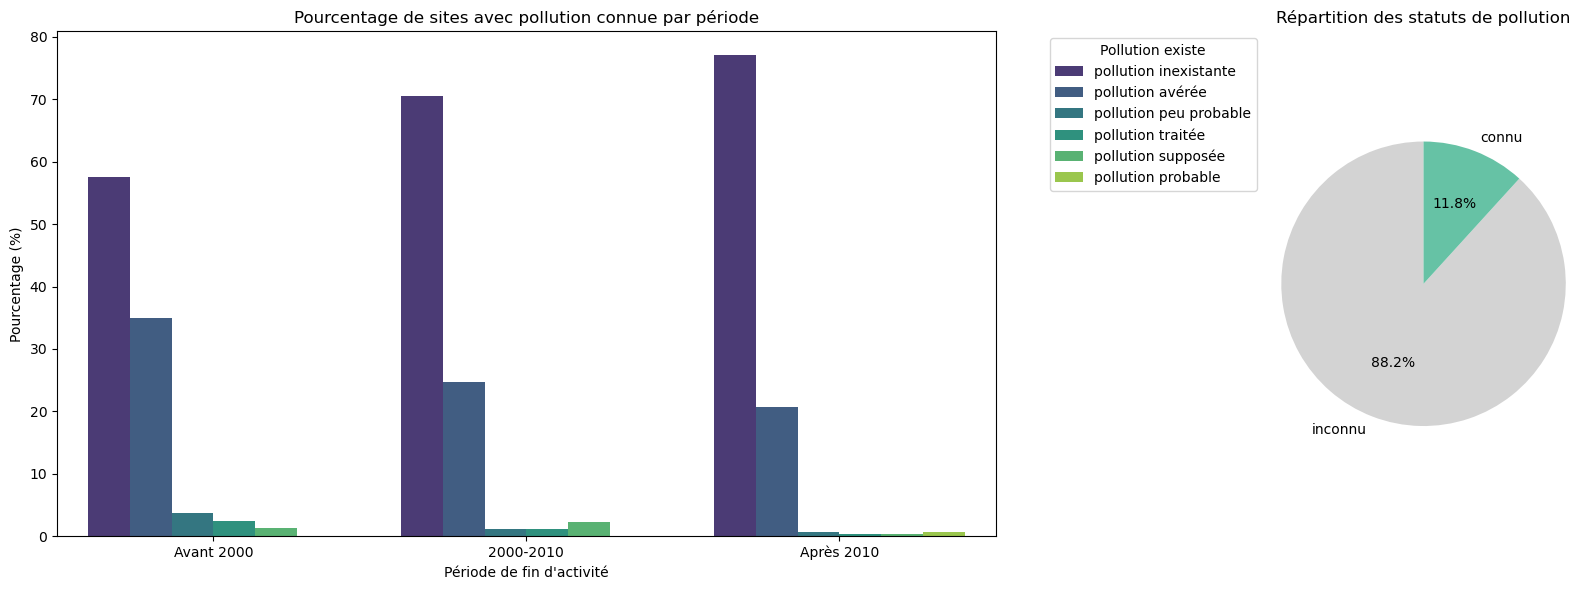

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Nettoyage ---
df_pollution_clean = df_end_year[
    df_end_year['sol_pollution_existe'].notna() &
    (df_end_year['sol_pollution_existe'].str.lower().str.strip() != 'inconnu')
].copy()

pollution_by_period = (
    df_pollution_clean
    .groupby('periode_fin_activite')['sol_pollution_existe']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index(name='%')
)

# --- 2. Camembert : connu vs inconnu ---
pollution_status_counts = df_end_year['sol_pollution_existe'].apply(
    lambda x: 'inconnu' if pd.isna(x) or str(x).strip().lower() == 'inconnu' else 'connu'
).value_counts()

# --- 3. Affichage côte à côte ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

# Barplot
sns.barplot(
    data=pollution_by_period,
    x='periode_fin_activite',
    y='%',
    hue='sol_pollution_existe',
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title("Pourcentage de sites avec pollution connue par période")
axes[0].set_xlabel("Période de fin d'activité")
axes[0].set_ylabel("Pourcentage (%)")
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Pollution existe', bbox_to_anchor=(1.05, 1), loc='upper left')

# Camembert
axes[1].pie(
    pollution_status_counts,
    labels=pollution_status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#d3d3d3', '#66c2a5']
)
axes[1].set_title("Répartition des statuts de pollution")
axes[1].axis('equal')

plt.tight_layout()
plt.show()


In [73]:
display(HTML(encadre_html("sol_pollution_annee", niveau="gris")))

#### sol_pollution_annee (année de constat de pollution du sol)
Quasiment vide – 100% de NaN dans l’audit (aucune valeur exploitable). Il est probable que ce champ n’a été rempli que pour les sites BASOL où une pollution a été constatée une année donnée, mais ces cas sont très rares dans Cartofriches (une centaine tout au plus). L’absence de données indique soit que ces sites n’ont pas été intégrés, soit que l’information n’a pas été extraite.  
**Problèmes** : On ne dispose pas de l’historique de pollution pour les friches polluées, ce qui limite l’évaluation des risques.  
**Causes** : BASOL contient l’année de première constatation de pollution, mais comme très peu de sites Cartofriches ont un identifiant BASOL, l’information n’a pas été reprise. Peut-être aussi un souci d’harmonisation (plusieurs sources de pollution possible).  
**Recommandations** : Importer les données BASOL pour les sites concernés. Concrètement, pour chaque site ayant un site_numero_basol, récupérer l’année de constatation de pollution et la mettre ici. Ce serait un petit volume de données à intégrer (quelques dizaines de valeurs, qui feraient passer ce champ de 0 à peut-être 0,5% de complétude). Sinon, envisager de supprimer ce champ de la vue publique pour ne garder que un indicateur binaire de pollution.

In [74]:
display(HTML(encadre_html("sol_pollution_existe", niveau="rouge")))

#### sol_pollution_existe (existence d’une pollution du sol)
Champ problématique – moins de 0,01% de rempli (l’audit indique 99,99% de NaN), et en plus un warning de type mixte lors du chargement signale des valeurs hétérogènes. Cela suggère que quelques entrées contiennent “Oui” ou “pollution avérée” tandis que d’autres ont des nombres ou rien. En somme, presque personne n’a “Oui” ou “Non” de renseigné ici, et les rares qui l’ont ne sont pas uniformes (ex: certains sites pollués pourraient avoir la mention textuelle “pollution avérée”
cnig.gouv.fr
 tandis que d’autres “1”).  
**Problèmes** : Ce champ devrait indiquer clairement si la friche est polluée, or ce n’est pas exploitable. Avec si peu de valeurs, on ne peut même pas filtrer efficacement. La donnée est mélangeante (typage objet au lieu de booléen).  
**Causes** : Il y a incohérence dans le remplissage : possiblement, certains observatoires locaux ont noté des choses (ex: un champ booléen 0/1 pour pollution) alors que le standard attend “Oui/Non” ou “pollution avérée/pas de pollution”. L’intégration a dû laisser tel quel, créant ce mélange. De plus, beaucoup de sites n’ont pas l’info – BASIAS répertorie des sites potentiellement pollués mais sans confirmation, et BASOL seulement une poignée de sites.  
**Recommandations** : Uniformiser et remplir a minima ce champ. On pourrait considérer que tous les sites avec un identifiant BASOL ont “Oui” (pollution connue) cnig.gouv.fr, et ceux issus de BASIAS mais pas de BASOL ont “Non renseigné” ou “Suspectée”. Pour l’instant, convertir toutes les valeurs numériques en “Oui/Non” cohérents (ex: 1 => Oui) et supprimer les doublons de signification (peut-être n’utiliser que “pollution avérée” vs vide). Il faudrait idéalement marquer explicitement “Non” pour absence de pollution connue sur les sites dont on a la certitude (mais c’est délicat, on préfère “Non renseigné” par prudence).  
**Nettoyage** prioritaire : élevé, car c’est un champ crucial environnemental. Une approche pragmatique : créer un champ dérivé binaire “pollue” = True si site_basol ou mention pollution ailleurs, False sinon, en attendant mieux.

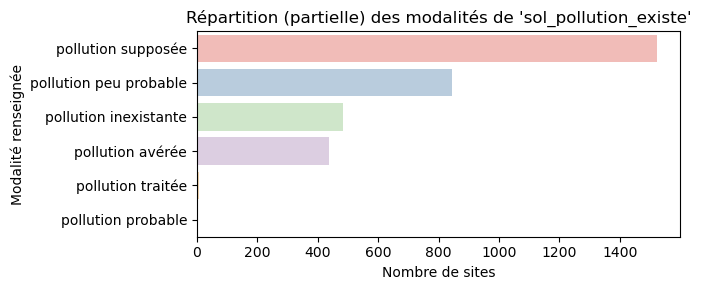

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# On récupère uniquement les modalités renseignées (hors NaN)
pollution_status = (
    df['sol_pollution_existe']
    .dropna()
    .astype(str).str.strip().str.lower()
    .replace(['nan', 'none', 'null', '', 'inconnu'], np.nan)
    .dropna()
)

status_counts = pollution_status.value_counts()
plt.figure(figsize=(7,3))
sns.barplot(x=status_counts.values, y=status_counts.index, palette="Pastel1")
plt.title("Répartition (partielle) des modalités de 'sol_pollution_existe'")
plt.xlabel("Nombre de sites")
plt.ylabel("Modalité renseignée")
plt.tight_layout()
plt.show()


In [76]:
display(HTML(encadre_html("sol_pollution_origine", niveau="rouge")))

#### sol_pollution_origine (origine de la pollution)
Très majoritairement vide (devrait suivre le même taux que sol_pollution_existe). À part les sites BASOL, peu ont une origine définie (exemples d’origines : “produits toxiques”, “activité métallurgique”, etc.). L’audit a montré 0,13% de non-null, ce qui correspond peut-être aux quelques sites pollués.  
**Problèmes** : Champ vide pour 99,87% des cas, donc inutilisable à grande échelle.  
**Causes** : Non applicable à la plupart (car pollutions pas avérées). Pour les sites pollués, l’origine existe dans BASOL, mais n’a sans doute pas été importée.  
**Recommandations** : Compléter pour les sites BASOL – par exemple en indiquant “Hydrocarbures”, “Métaux lourds” ou ce qui correspond, selon ce que BASOL décrit. Vu le faible nombre, c’est faisable manuellement ou via un script ciblé. Sinon, ce champ peut être laissé vide par défaut. Documentation : préciser que c’est rempli uniquement en cas de pollution avérée, ce qui explique les nombreuses valeurs manquantes. Ce n’est pas prioritaire pour l’analyse globale, mais crucial pour les sites spécifiques concernés (on peut donc traiter au cas par cas).

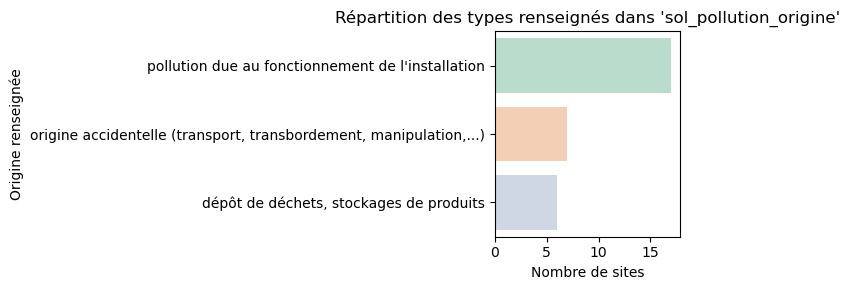

In [77]:
pollution_origin = (
    df['sol_pollution_origine']
    .dropna()
    .astype(str).str.strip().str.lower()
    .replace(['nan', 'none', 'null', '', 'inconnu'], np.nan)
    .dropna()
)
origin_counts = pollution_origin.value_counts()

if len(origin_counts) > 1:
    plt.figure(figsize=(7,3))
    sns.barplot(x=origin_counts.values, y=origin_counts.index, palette="Pastel2")
    plt.title("Répartition des types renseignés dans 'sol_pollution_origine'")
    plt.xlabel("Nombre de sites")
    plt.ylabel("Origine renseignée")
    plt.tight_layout()
    plt.show()
elif len(origin_counts) == 1:
    plt.figure(figsize=(3,3))
    plt.pie(origin_counts.values, labels=origin_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Pastel2"))
    plt.title("Unique modalité dans 'sol_pollution_origine'")
    plt.show()
else:
    print("Aucune valeur exploitable dans 'sol_pollution_origine'.")


In [78]:
display(HTML(encadre_html("bati_pollution", niveau="rouge")))

#### bati_pollution (pollution dans les bâtiments)
Très majoritairement vide. Ce champ indique par ex. présence d’amiante ou plomb. On a aperçu “inconnu” comme valeur pour les rares remplis (dans l’exemple standard, bati_pollution = “inconnu”). Donc aucune friche n’a explicitement “amiante” ou autre de noté.  
**Problèmes** : On ne sait pas si des polluants spécifiques au bâti (amiante, etc.) sont présents, ce qui est pourtant un enjeu pour la requalification.  
**Causes** : Ces données ne sont pas dans les sources initiales, elles nécessitent des diagnostics techniques. Le champ est resté vide ou marqué inconnu par défaut.  
**Recommandations** : Pas de solution miracle sans audits techniques. On peut éventuellement utiliser des données de permis de démolir (qui impliquent recherche d’amiante) pour inférer quels sites en contiennent, mais c’est du détour. Donc, documenter que ce champ est vide car non renseigné dans l’inventaire actuel, et le remplir éventuellement quand des informations locales remontent (ex: signalement d’amiante dans tel bâtiment). Pour l’instant, il est prudent de considérer que toutes les friches bâties d’avant 1997 sont potentiellement concernées par l’amiante – ce champ ne reflète juste pas cette potentialité, faute de vérification.

In [79]:
display(HTML(encadre_html("sol_pollution_commentaire", niveau="gris")))

#### sol_pollution_commentaire (commentaire sur la pollution)
Là encore, seulement pertinent pour les sites pollués. Presque personne n’a de valeur (on attend <0,5%). Peut contenir un texte décrivant la pollution.  
**Causes** & problèmes : Idem au champ précédent – très peu rempli car très peu de sites avec pollution détaillée. Les rares infos pourraient être longues ou hétérogènes. Recommandation : Pas de nettoyage massif nécessaire vu la rareté. Simplement, s’assurer que pour chaque site pollué on retrouve bien un commentaire (s’il existait dans BASOL). Sinon, pas de mesure spécifique, on accepte que ce champ soit vide presque partout. Sol_depollution_fiche (URL vers une fiche de dépollution) : Quasiment vide – une seule occurrence repérée (fiches-risques.brgm.fr/… pour 1 site). Cela signifie qu’à part un site qui a un lien (probablement vers une fiche de suivi de dépollution sur Géorisques), aucun autre n’a été renseigné.  
**Problèmes** : C’est une occasion manquée de lier des ressources existantes (par ex. de nombreux sites BASOL ont des rapports ou arrêtés disponibles en ligne).  
**Causes** : L’effort d’agrégation de liens externes n’a pas été poussé – on a mis le minimum (liens génériques ou rien). Le cas présent doit être un test ou un site d’étude.  
**Recommandations** : Envisager de peupler ce champ via des sources ouvertes. Par ex, Géorisques propose pour chaque site pollué une page – intégrer ces URL pour tous les sites BASOL serait utile. De même, s’il existe des fiches de suivi de l’ADEME ou d’autres organismes sur certaines friches, les ajouter. C’est un travail manuel/veille, donc peut-être en mode collaboratif avec les référents locaux. Pour l’instant, comme seule une fiche est fournie, mentionner que ce champ est expérimental. Si aucune montée en qualité n’est prévue à court terme, on pourrait fusionner l’info dans site_url pour éviter de multiplier les champs URL.

In [80]:
display(HTML(encadre_html("site_securite", niveau="rouge")))

#### site_securite (mesures de sécurisation du site)
100% manquant. Aucune indication sur la sécurisation (clôture, gardiennage, dépollution temporaire…) n’est présente, alors que ce champ pouvait accueillir plusieurs mesures.  
**Problèmes** : On ignore complètement l’état de mise en sécurité des sites, ce qui est pourtant important (certains peuvent présenter des dangers).  
**Causes** : Ces informations existaient partiellement dans BASOL ou InfoSols, mais leur intégration a été omise ou reportée. Le standard CNIG mentionne que les valeurs issues de BASOL/InfoSols devaient être converties dans ce champ avec des règles de correspondance
cnig.gouv.fr
, ce qui ne semble pas avoir été fait – possiblement par manque de temps ou de données au bon format.  
**Recommandations** : Intégrer les données de sécurisation disponibles pour les sites BASOL au minimum (ex: “site clôturé et gardienné” etc., convertis selon les règles CNIG
cnig.gouv.fr
). Pour les autres friches, envisager de capter cette info via les porteurs de projet ou inspections (même si c’est juste “pas de mesure” ou “inconnu”). Si l’intégration automatique est complexe, ce champ pourrait être mis à jour progressivement lors des visites de terrain ou retours des collectivités. Documenter pour l’utilisateur final que l’absence totale de données ne signifie pas forcément absence de sécurisation, mais un défaut d’information.
Liens avec bases de données environnementales

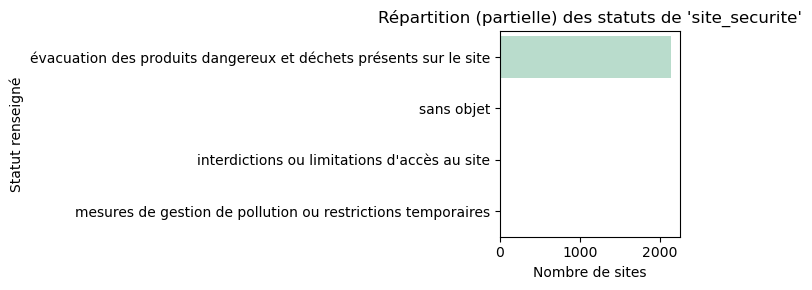

In [81]:
site_securite = (
    df['site_securite']
    .dropna()
    .astype(str).str.strip().str.lower()
    .replace(['nan', 'none', 'null', '', 'inconnu'], np.nan)
    .dropna()
)
securite_counts = site_securite.value_counts()

if len(securite_counts) > 0:
    plt.figure(figsize=(7,3))
    sns.barplot(x=securite_counts.values, y=securite_counts.index, palette="Pastel2")
    plt.title("Répartition (partielle) des statuts de 'site_securite'")
    plt.xlabel("Nombre de sites")
    plt.ylabel("Statut renseigné")
    plt.tight_layout()
    plt.show()
else:
    print("Aucune valeur exploitable dans 'site_securite'.")


In [82]:
display(HTML(encadre_html("sol_pollution_statut", niveau="rouge")))

#### sol_pollution_statut

 #### bati_pollution

### 🏭 Données sur le bâti
(Les champs bati_ décrivent les bâtiments présents sur le site, issus pour la plupart de croisements avec les fichiers fonciers ou d’enquêtes terrain.)

Problèmes de qualité : Les données sur le bâti présentent de nombreuses valeurs manquantes ou indéterminées. Une proportion importante de sites n’a pas d’information sur les bâtiments présents : par exemple, le nombre de bâtiments (bati_nombre) ou la surface bâtie (bati_surface) est souvent nul ou non renseigné, et les champs décrivant la nature ou l’état du bâti contiennent fréquemment la valeur « inconnu » ou restent vides. On observe aussi des incohérences et outliers potentiels : certains enregistrements indiquent la présence de bâtiments sans en préciser les caractéristiques (types, surface, etc.), tandis que d’autres peuvent montrer des valeurs extrêmes (une friche affichant un nombre de bâtiments ou une superficie bâtie très élevée par rapport à la moyenne). Par ailleurs, la plupart des catégories qualitatives (pollution du bâti, vacance, valeur patrimoniale, état de dégradation) sont dominées par l’option « aucun/inconnu » – signe que soit les informations détaillées n’ont pas été collectées, soit que les friches n’ont pas de particularités notables sur ces aspects, ce qui limite la portée informative de ces variables.

In [84]:
audit_dataframe_by_domain(df, "bati")

colonne  valeur_manquant_reel  valeur_manquant_effectif  \
0               bati_type                     0                     25979   
1             bati_nombre                    66                        66   
2            bati_surface                 28095                     28095   
3            bati_vacance                     0                     26007   
4         bati_patrimoine                     0                     25297   
5               bati_etat                     0                     22335   
6  unite_fonciere_surface                    63                        63   
7   unite_fonciere_refcad                    37                        37   
8           TOTAL DOMAINE                 28261                    127879   

   taux_doublons_(%)                                 Modalite_Dominante  \
0              99.97                                        résidentiel   
1              99.62                                                1.0   
2              99.94                                                0.0   
3              99.98                                             vacant   
4              99.98                                              aucun   
5              99.98                                dégradation moyenne   
6              38.40                                              187.0   
7               5.70  {59512000AE0114,59512000AE0115,59512000AE0116,...   
8              80.45                                                N/A   

  Dominance_(%) Nb_Valeurs_Uniques  Nb_Lignes_Valides_Selon_Regle  \
0          78.5                  8                           2136   
1          40.2                106                          28049   
2          30.0                 15                             20   
3          80.6                  4                           2107   
4          91.6                  4                           2817   
5          49.8                  5                           5611   
6           0.1              17319                          28052   
7           0.1              26511                              0   
8           N/A                N/A                          68792   

   Taux_Validite_Effectif_(%)  \
0                      100.00   
1                      100.00   
2                      100.00   
3                       99.95   
4                       99.96   
5                       97.08   
6                      100.00   
7                        0.00   
8                       70.89   

                          Top3_Modalites_Non_Valides  
0                                             Aucune  
1                                             Aucune  
2                                             Aucune  
3    {'inconnu': 26007, 'partiellement inoccupé': 1}  
4  {'inconnu': 25297, 'présence d'un bâtiment ins...  
5  {'inconnu': 22325, 'sans objet': 169, 'autre':...  
6                                             Aucune  
7  {'{59512000ae0114,59512000ae0115,59512000ae011...  
8                                                N/A

Interprétation : Ces lacunes reflètent le fait que l’inventaire n’a pas encore intégré toutes les données sur les constructions existantes ou que celles-ci ne sont pas uniformément renseignées selon les sources. Pour l’analyste, cela signifie qu’il faudra interpréter prudemment les indicateurs liés au bâti. Par exemple, un grand nombre de « 0 » en surface bâtie ne signifie pas nécessairement l’absence totale de constructions – cela peut indiquer un manque de mesure ou une absence de mise à jour (certaines friches pourraient comporter de petits bâtiments non recensés). De même, la prépondérance de réponses « inconnu » ou « aucun » pour la pollution, la vacance ou le patrimoine bâti suggère que peu de sites ont fait l’objet d’une évaluation fine sur ces critères, rendant difficile toute conclusion générale (on ne peut pas facilement distinguer si la plupart des friches sont sans pollution/aspect patrimonial, ou si simplement on manque d’information). Enfin, les outliers identifiés (ex : friche avec surface bâtie exceptionnellement grande) indiquent une hétérogénéité marquée de la base : quelques sites aux caractéristiques extrêmes peuvent influencer les statistiques globales, d’où la nécessité de les traiter à part lors de l’analyse (voire de vérifier s’il ne s’agit pas d’erreurs de saisie).

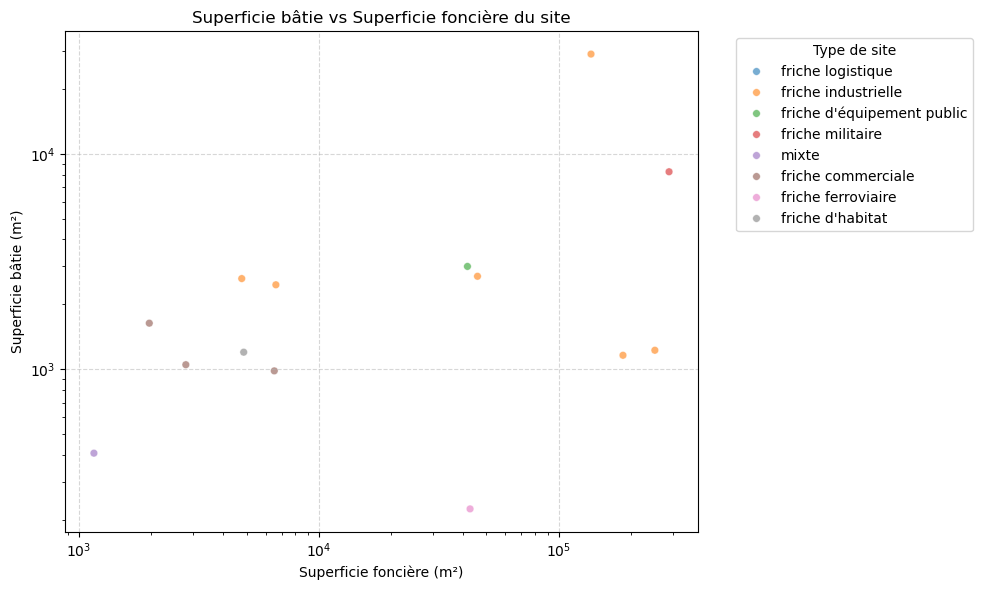

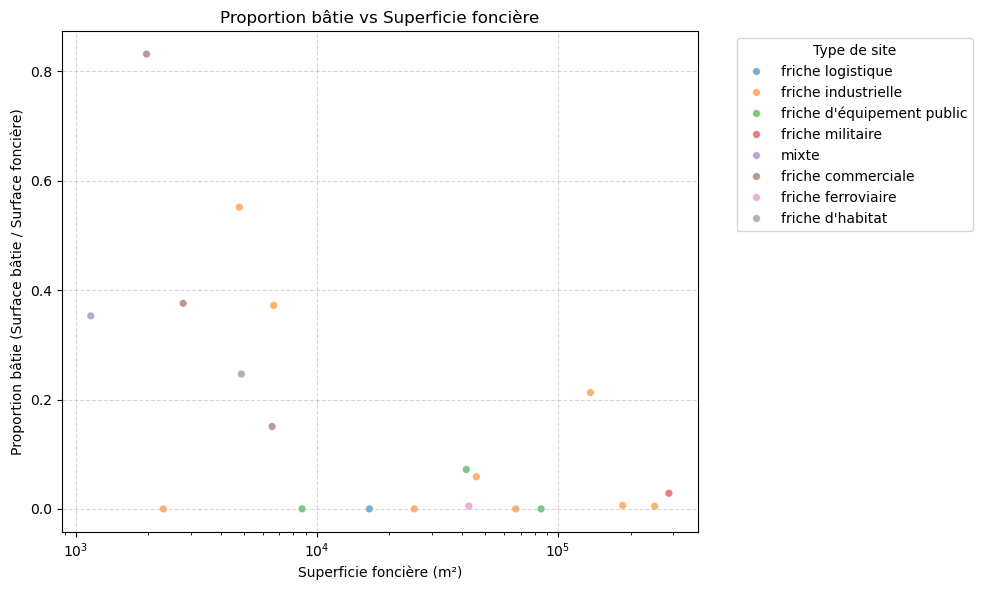


Coefficient de corrélation (Pearson) entre Surface foncière et Proportion bâtie: -0.38

Analyse État de dégradation vs Ancienneté des constructions:
Les colonnes 'Local_ancienne_annee', 'Local_recent_annee' et 'bati_etat_degradation' sont largement vides ou non fiables d'après l'audit.
Cette analyse ne peut pas être réalisée avec les données actuelles.


In [85]:
# Analyse croisée : Superficie du site vs Surface bâtie
# Assurer que les colonnes de surface sont numériques
df['unite_fonciere_surface_numeric'] = pd.to_numeric(df['unite_fonciere_surface'], errors='coerce')
df['bati_surface_numeric'] = pd.to_numeric(df['bati_surface'], errors='coerce')

# Filtrer pour les sites avec des valeurs valides pour les deux surfaces et des surfaces > 0
df_surfaces_valid = df.dropna(subset=['unite_fonciere_surface_numeric', 'bati_surface_numeric']).copy()
df_surfaces_valid = df_surfaces_valid[(df_surfaces_valid['unite_fonciere_surface_numeric'] > 0) | (df_surfaces_valid['bati_surface_numeric'] > 0)] # Garder les sites avec au moins une surface > 0

# Optionnel: filtrer les valeurs extrêmes si elles faussent la visualisation
# Par exemple, sites avec surface foncière > 1e7 ou surface bâtie > 1e6 peuvent être des outliers à vérifier
# df_surfaces_valid = df_surfaces_valid[(df_surfaces_valid['unite_fonciere_surface_numeric'] < 1e7) & (df_surfaces_valid['bati_surface_numeric'] < 1e6)]


if not df_surfaces_valid.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_surfaces_valid,
        x='unite_fonciere_surface_numeric',
        y='bati_surface_numeric',
        alpha=0.6, # Transparence
        s=30,      # Taille des points
        hue='site_type' # Optionnel : colorier par type de site
    )
    plt.title("Superficie bâtie vs Superficie foncière du site")
    plt.xlabel("Superficie foncière (m²)")
    plt.ylabel("Superficie bâtie (m²)")

    # Utiliser des échelles log si les données sont très étalées
    plt.xscale('log')
    plt.yscale('log')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Type de site', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Calculer la proportion bâtie / foncière
    df_surfaces_valid['proportion_batie'] = df_surfaces_valid['bati_surface_numeric'] / df_surfaces_valid['unite_fonciere_surface_numeric']

    # Analyser la corrélation entre la superficie foncière et la proportion bâtie
    # Filtrer les proportions > 1 (erreurs possibles ou proportion non pertinente si bati > fonciere)
    df_proportion_valid = df_surfaces_valid[df_surfaces_valid['proportion_batie'] <= 1].copy()


    if not df_proportion_valid.empty:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            data=df_proportion_valid,
            x='unite_fonciere_surface_numeric',
            y='proportion_batie',
            alpha=0.6,
            s=30,
            hue='site_type'
        )
        plt.title("Proportion bâtie vs Superficie foncière")
        plt.xlabel("Superficie foncière (m²)")
        plt.ylabel("Proportion bâtie (Surface bâtie / Surface foncière)")
        plt.xscale('log')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend(title='Type de site', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # Calculer la corrélation
        correlation_prop = df_proportion_valid['unite_fonciere_surface_numeric'].corr(df_proportion_valid['proportion_batie'])
        print(f"\nCoefficient de corrélation (Pearson) entre Surface foncière et Proportion bâtie: {correlation_prop:.2f}")
    else:
        print("\nPas suffisamment de sites avec une proportion bâtie valide pour analyser la corrélation.")

else:
    print("Pas suffisamment de sites avec des valeurs valides pour la surface foncière et la surface bâtie.")

# Analyse croisée : État de dégradation vs Ancienneté des constructions
# Nécessite des données fiables sur 'bati_etat_degradation' et 'Local_ancienne_annee' ou 'Local_recent_annee'
# D'après l'audit, 'Local_ancienne_annee' et 'Local_recent_annee' sont 100% NaN.
# 'bati_etat_degradation' est très largement 'inconnu'.
# Cette analyse n'est pas possible avec les données actuelles.

print("\nAnalyse État de dégradation vs Ancienneté des constructions:")
print("Les colonnes 'Local_ancienne_annee', 'Local_recent_annee' et 'bati_etat_degradation' sont largement vides ou non fiables d'après l'audit.")
print("Cette analyse ne peut pas être réalisée avec les données actuelles.")

# Exemple hypothétique si les données existaient:
# df_etat_anciennete = df.dropna(subset=['bati_etat_degradation', 'Local_ancienne_annee']).copy()
# df_etat_anciennete['Local_ancienne_annee'] = pd.to_numeric(df_etat_anciennete['Local_ancienne_annee'], errors='coerce')
# df_etat_anciennete = df_etat_anciennete[df_etat_anciennete['Local_ancienne_annee'].notna()]
#
# if not df_etat_anciennete.empty:
#    plt.figure(figsize=(10, 6))
#    sns.boxplot(
#        data=df_etat_anciennete,
#        x='bati_etat_degradation',
#        y='Local_ancienne_annee',
#        palette='coolwarm'
#    )
#    plt.title("Ancienneté du bâtiment le plus ancien par état de dégradation")
#    plt.xlabel("État de dégradation du bâti")
#    plt.ylabel("Année du bâtiment le plus ancien")
#    plt.xticks(rotation=45)
#    plt.tight_layout()
#    plt.show()
# else:
#    print("Pas suffisamment de données valides pour croiser l'état de dégradation et l'ancienneté.")

In [86]:
display(HTML(encadre_html("bati_type", niveau="rouge")))

#### bati_type (type de bâtiments présents)
83,9% de valeurs manquantes. Environ 16% des sites ont un type de bâti indiqué. La valeur la plus courante renseignée est « Habitat » (1548 occurrences), suggérant que sur ces sites on trouve principalement des bâtiments d’habitation. D’autres types possibles sont industriel, agricole, tertiaire, etc., mais ils sont très peu nombreux dans les données (le mode “Habitat” domine largement parmi les rares remplissages).  
**Problèmes** : Pour la grande majorité des friches, on ne sait pas quel genre de bâtiment s’y trouve (s’il y en a). Les quelques données présentes sont biaisées – “Habitat” apparaît souvent, possiblement parce qu’un lot de friches urbaines a été traité, tandis que d’autres types n’ont pas été notés.  
**Causes** : Ces informations proviennent sans doute d’un croisement avec la matrice cadastrale ou d’une saisie manuelle, ce qui n’a été fait que ponctuellement. Le standard CNIG autorise des valeurs multiples (plusieurs types séparés par |)
cnig.gouv.fr
, mais on ne voit pas de tels cas, signe d’un usage minimal.  
**Recommandations** : Améliorer la remontée des données bâties. Puisque le standard suggérait d’utiliser la Base des Données des Bâtiments (à venir) ou les fichiers fonciers, il faut soit attendre ces sources consolidées, soit connecter dès maintenant aux fichiers fonciers (DV3F) pour connaître la nature des constructions. En attendant, les données existantes peuvent être homogénéisées (ex: vérifier s’il y a des libellés différents pour signifier la même chose).  
**Priorité** : moyenne – ce n’est pas critique pour l’analyse macro, mais important localement. On pourrait cibler les friches prioritaires et renseigner si elles ont des bâtiments industriels, patrimoniaux, etc. Encourageons une saisie structurée plutôt que du texte libre.

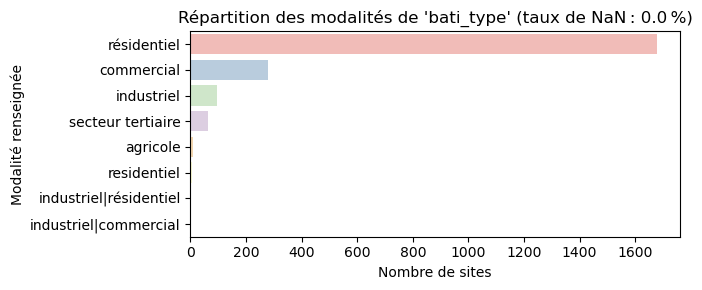

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot_modalites(df, col, palette="Pastel1"):
    # Nettoyage léger
    values = df[col].dropna().astype(str).str.strip().str.lower()
    values = values[~values.isin(['nan', 'none', 'null', '', 'inconnu', 'autre'])]
    counts = values.value_counts()
    taux_nan = df[col].isna().mean() * 100

    plt.figure(figsize=(7, 3))
    sns.barplot(x=counts.values, y=counts.index, palette=palette)
    plt.title(f"Répartition des modalités de '{col}' (taux de NaN : {taux_nan:.1f} %)")
    plt.xlabel("Nombre de sites")
    plt.ylabel("Modalité renseignée")
    plt.tight_layout()
    plt.show()

barplot_modalites(df, 'bati_type', palette="Pastel1")

In [88]:
display(HTML(encadre_html("bati_nombre", niveau="vert")))

#### bati_nombre (nombre de bâtiments)
Valeurs manquantes non explicitement listées, mais on peut déduire qu’une forte proportion est vide également (sans doute >80%). Les sites qui ont une info peuvent en avoir 1, 2, etc. On n’a pas la distribution précise ici, mais probablement très peu ont un nombre indiqué.  
**Problèmes** : Champ sous-exploité – on ne connaît pas l’ampleur du bâti sur la plupart des friches. Certains ont peut-être “0” s’il n’y a pas de bâtiment (mais pas clair si c’est noté ou laissé vide).  
**Causes** : Difficulté de recensement sans données cadastrales automatisées. Ce champ aurait pu être alimenté via le croisement bâti-cadastre (en comptant les polygones bâtis intersectant la friche). Cela n’a pas été généralisé.  
**Recommandations** : Utiliser des sources externes comme la couche bâti d’OpenStreetMap ou la BD Topo pour estimer le nombre de bâtiments sur site, au moins approximativement pour les grandes friches. Sinon, collecter manuellement lors de visites ou retours terrain. Dans l’immédiat, uniformiser la saisie : si “0” n’a pas été noté pour absence de bâtiment, décider de le faire ou non. Ne pas laisser de “0” ambigus (0 bâtiment ou info manquante?). Mieux vaut un null pour inconnu et un 0 explicite si vérifié aucun bâtiment.

In [90]:
display(HTML(encadre_html("bati_surface", niveau="rouge")))

#### bati_surface (surface de plancher totale)
Similaire, très peu renseigné (on voit que dans l’exemple du standard, une friche avait 2400 m² de plancher, mais dans notre export on ne repère pas de mode significative). La plupart des sites n’ont pas cette donnée.  
**Problèmes** : On ne peut pas estimer la volumétrie du bâti existant, utile pourtant pour évaluer le potentiel de réhabilitation.  
**Causes** : Là encore, seule une extraction des données foncières (valeur locative et surface bâtie) ou des bases bâtiments pourrait fournir cette info. Non fait à ce stade hormis tests.  
**Recommandations** : Prévoir de calculer ou importer ces surfaces quand la BD des bâtiments (BDNB) sera disponible. On peut aussi obtenir des approximations en multipliant l’emprise au sol par nombre d’étages, mais c’est un travail lourd manuellement. Court terme : laisser vide plutôt que mettre des mauvaises valeurs.

In [91]:
display(HTML(encadre_html("bati_vacance", niveau="gris")))

#### bati_vacance (état de vacance des bâtiments)
Devrait indiquer si les bâtiments sont inoccupés. Peu de données présentes. Peut-être quelques “vacant” ou “occupé partiellement” isolés. Probablement >90% manquant.  
**Problèmes** : On ne sait pas si sur une friche certains bâtiments servent encore (stockage, etc.).  
**Causes** : Là encore, il faut du travail de terrain ou des croisements (par ex. croiser avec la taxe foncière bâtie – si non imposé = vacant). Non fait sauf exceptions.  
**Recommandations** : Laisser ce champ vide tant qu’on n’a pas de données fiables, plutôt que mettre “inconnu” partout. Sur les sites où on sait des choses (via les collectivités), on peut indiquer “occupé temporairement”, etc. Mais globalement, c’est un champ à remplir manuellement au cas par cas. Au niveau national, on peut estimer qu’il y a quasi 100% de vacance sur friche, mais ce serait imprécis. Donc champ peu utilisable actuellement. On peut suggérer comme amélioration d’analyser des images satellites nocturnes pour repérer l’absence d’éclairage comme indice de vacance, mais c’est prospectif.

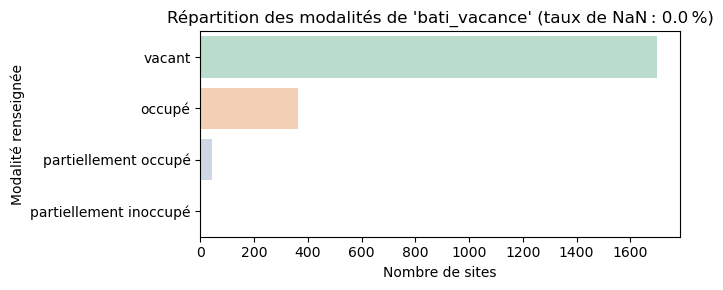

In [92]:
barplot_modalites(df, 'bati_vacance', palette="Pastel2")

In [93]:
display(HTML(encadre_html("bati_patrimoine", niveau="rouge")))

#### bati_patrimoine (présence de bâti patrimonial)
Là aussi, très peu renseigné. Quelques friches peuvent avoir “monument inscrit” ou “présence d’un élément patrimonial” noté, mais c’est marginal.  
**Problèmes** : On ne bénéficie pas de l’indication qu’un bâtiment sur site a une valeur historique ou architecturale, ce qui pourrait orienter les projets (conservation ou pas).  
**Causes** : Cette info demande de croiser avec la liste des monuments historiques ou le PLU (certains bâtiments sont protégés). Non fait sauf si mentionné par un observatoire local.  
**Recommandations** : Croiser avec la base Mérimée (Monuments protégés) ou le patrimoine industriel inventorié, afin de taguer les friches concernées. C’est un ajout précieux pour prioriser certains sites, mais il y a du bruit possible (bâtiment protégé adjacent, etc.). Au minimum, inciter les acteurs locaux à renseigner ce champ quand ils connaissent un édifice remarquable sur le site. Pour l’instant, supposer par défaut “non renseigné = pas d’info, nécessite enquête”.

In [94]:
display(HTML(encadre_html("bati_etat", niveau="rouge")))

#### bati_etat (état de dégradation des bâtiments)
Non présent dans l’audit (peut-être pas exporté ou confondu). On peut supposer qu’il n’est pas rempli non plus, sauf exceptions ponctuelles (“état de dégradation moyenne”, “très dégradé”, etc., comme dans l’exemple standard).  
**Problèmes** : On n’a pas d’évaluation générale de l’état du bâti (neuf, réhabilitable, ruine…).  
**Causes** : Donnée qualitative nécessitant une visite sur site. Les quelques valeurs peuvent provenir d’inventaires régionaux où l’état avait été noté.  
**Recommandations** : Encourager la notation de l’état lors des relevés terrain (par ex. via une échelle standard : bon/moyen/mauvais/ruine). À l’échelle nationale, ce champ restera très lacunaire tant qu’une campagne d’évaluation visuelle n’est pas menée. Donc le considérer comme non prioritaire pour le moment. En sortie publique, on pourrait même le masquer pour éviter l’impression de données à moitié vides. (À noter : Le CNIG avait prévu de mettre à jour ces champs via des bases nationales dès que possible, ce qui explique qu’ils soient pour l’instant majoritairement vides. En d’autres termes, l’absence de données bati_ actuellement est un manque connu et temporaire.)
Propriété foncière

In [95]:
display(HTML(encadre_html("unite_fonciere_surface", niveau="vert")))

#### unite_fonciere_surface

In [96]:
df["unite_fonciere_surface"].describe()

count    2.805200e+04
mean     1.120489e+05
std      1.188390e+06
min      1.000000e+00
25%      1.554750e+03
50%      7.521000e+03
75%      3.661200e+04
max      1.340958e+08
Name: unite_fonciere_surface, dtype: float64

Unite fonciere surface fait partie des données les plus fournies du dataset 

In [97]:
# Filtrage : uniquement les lignes avec année et surface foncière valides
df_valid = df_scatter[
    df_scatter['annee_identif'].notna() &
    df_scatter['unite_fonciere_surface'].notna()
].copy()

# Agrégation : surface totale par année
surface_by_year = df_valid.groupby('annee_identif')['unite_fonciere_surface'].sum().sort_index().reset_index()
surface_by_year.columns = ['annee', 'surface_totale']

# Calcul du cumul
surface_by_year['cumul'] = surface_by_year['surface_totale'].cumsum()
total_surface = surface_by_year['surface_totale'].sum()

# Médiane pondérée en surface
median_surface_year = surface_by_year[surface_by_year['cumul'] >= total_surface / 2].iloc[0]['annee']
print(f"📌 Année médiane pondérée par la surface foncière : {median_surface_year}")


📌 Année médiane pondérée par la surface foncière : 2022.0


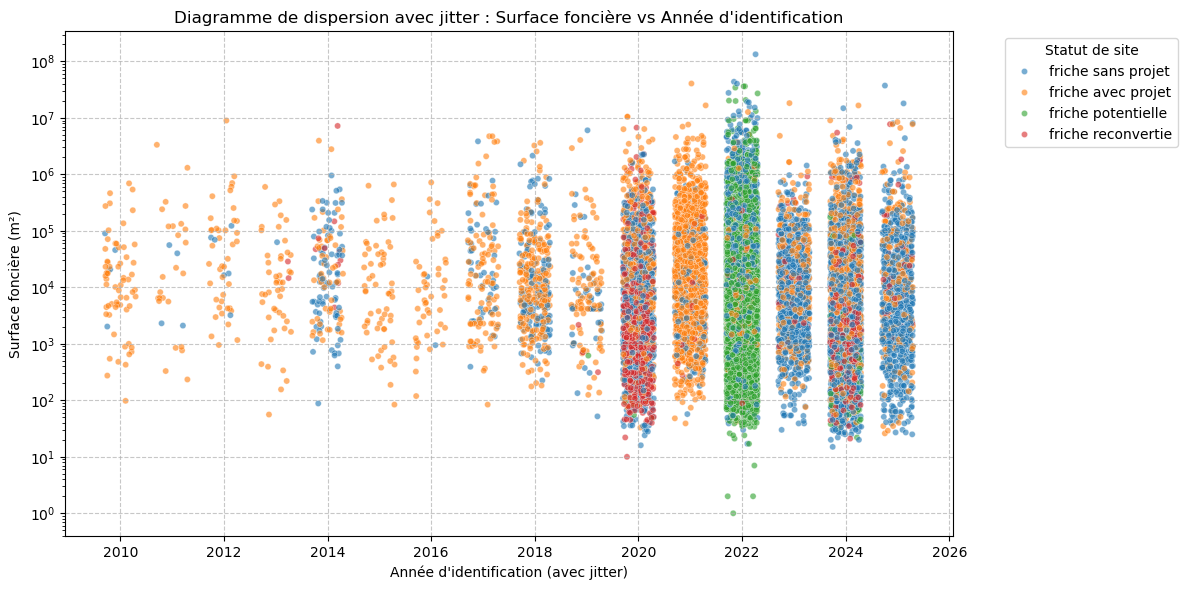

In [98]:
import numpy as np

df['unite_fonciere_surface'] = pd.to_numeric(df['unite_fonciere_surface'], errors='coerce')

df_scatter = df_work[
    df_work['site_identif_date'].notna() &
    df_work['unite_fonciere_surface'].notna() &
    df_work['site_identif_date'].dt.year.between(2010, 2025)
].copy()

df_scatter['annee_identif'] = df_scatter['site_identif_date'].dt.year.astype('Int64')
df_scatter['site_statut'] = df_scatter['site_statut'].astype(str).str.strip().str.lower()

# Ajouter un jitter horizontal centré autour de 0
np.random.seed(42)  # reproductibilité
jitter_strength = 0.3
df_scatter['annee_identif_jitter'] = df_scatter['annee_identif'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df_scatter))

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_scatter,
    x='annee_identif_jitter',
    y='unite_fonciere_surface',
    hue='site_statut',
    alpha=0.6,
    s=20
)
plt.title("Diagramme de dispersion avec jitter : Surface foncière vs Année d'identification")
plt.xlabel("Année d'identification (avec jitter)")
plt.ylabel("Surface foncière (m²)")
plt.yscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Statut de site', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [99]:
import plotly.express as px
import numpy as np
import pandas as pd

# Nettoyage des données
df['unite_fonciere_surface'] = pd.to_numeric(df['unite_fonciere_surface'], errors='coerce')

df_scatter = df_work[
    df_work['site_identif_date'].notna() &
    df_work['unite_fonciere_surface'].notna() &
    df_work['site_identif_date'].dt.year.between(2000, 2025)
].copy()

df_scatter['annee_identif'] = df_scatter['site_identif_date'].dt.year.astype('Int64')
df_scatter['site_statut'] = df_scatter['site_statut'].astype(str).str.strip().str.lower()
df_scatter['site_type'] = df_scatter['site_type'].astype(str).str.strip()

# Jitter horizontal
np.random.seed(42)
jitter_strength = 0.3
df_scatter['annee_identif_jitter'] = df_scatter['annee_identif'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df_scatter))

# Palette pastel
pastel_colors = [
    "#AEC6CF", "#FFB347", "#77DD77", "#F49AC2",
    "#CBAACB", "#FFFACD", "#B39EB5", "#FFDAC1"
]

# Graphe Plotly
fig = px.scatter(
    df_scatter,
    x='annee_identif_jitter',
    y='unite_fonciere_surface',
    color='site_statut',
    hover_data={
        'annee_identif': True,
        'unite_fonciere_surface': ':.0f',
        'site_type': True,
        'annee_identif_jitter': False  # On masque le jitter en survol
    },
    title="🌸 Surface foncière vs Année d'identification (jitter pastel)",
    labels={
        "annee_identif_jitter": "Année d'identification",
        "unite_fonciere_surface": "Surface foncière (m²)",
        "site_statut": "Statut de site",
        "site_type": "Type de site"
    },
    log_y=True,
    color_discrete_sequence=pastel_colors,
    template='simple_white',
    height=600,
    width=1000
)

fig.update_layout(
    hovermode='closest',
    legend_title_text='Statut de site',
    font=dict(family="Verdana", size=14, color="#444"),
    margin=dict(l=40, r=40, t=60, b=40),
    plot_bgcolor='rgba(255,255,255,1)',
    paper_bgcolor='rgba(255,255,255,1)',
)

# Ligne de repère sur 2022
fig.add_vline(
    x=2022,
    line_dash="dot",
    line_color="gray",
    annotation_text="2022",
    annotation_position="top left"
)

display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))

In [100]:
display(HTML(encadre_html("unite_fonciere_refcad", niveau="vert")))

#### unite_fonciere_refcad

### 👤 Activité et Propriétaires

In [101]:
audit_dataframe_by_domain(df, "proprietaire")

colonne  valeur_manquant_reel  valeur_manquant_effectif  \
0      proprio_type                   313                       313   
1  proprio_personne                    48                      1064   
2       proprio_nom                   313                       313   
3  activite_libelle                 13485                     13485   
4     activite_code                 27961                     27961   
5     TOTAL DOMAINE                 42120                     43136   

   taux_doublons_(%)                       Modalite_Dominante Dominance_(%)  \
0              95.22                                      X1a          37.4   
1              99.98                          personne morale          61.4   
2              54.69                                      _X_          37.4   
3              94.25  Dépôt de liquides inflammables (D.L.I.)          12.4   
4              99.61                                    4520A           4.5   
5              88.75                                      N/A           N/A   

  Nb_Valeurs_Uniques  Nb_Lignes_Valides_Selon_Regle  \
0               1344                              0   
1                  2                          27051   
2              12738                          27802   
3               1617                          14630   
4                109                            138   
5                N/A                          69621   

   Taux_Validite_Effectif_(%)  \
0                        0.00   
1                      100.00   
2                      100.00   
3                      100.00   
4                       89.61   
5                       71.45   

                          Top3_Modalites_Non_Valides  
0           {'x1a': 10389, 'p5a': 3426, 'g1a': 2621}  
1                                        {'nan': 48}  
2                                       {'nan': 313}  
3                                     {'nan': 13485}  
4  {'nan': 27961, 'e38.41z,c20.17z': 2, 'c20.17z,...  
5                                                N/A

Problèmes de qualité : La section propriétaires souffre de données incomplètes et d’un format peu structuré. De nombreux sites n’ont pas d’information propriétaire exploitable : soit les champs sont vides, soit les noms sont masqués (par exemple pour les propriétaires privés, en raison de la confidentialité). Les types de propriétaires sont codés (ex. catégories alphanumériques) et parfois multiples pour un même site – listés via un séparateur | – ce qui complique l’analyse directe (il faut les décoder et éventuellement compter le nombre de propriétaires). On constate également une sur-représentation potentielle d’une catégorie : par exemple, une majorité d’entrées indiquent des personnes morales comme propriétaires (entreprises, collectivités) par rapport aux personnes physiques, ou bien une forte proportion de sites sans propriétaire identifié clairement. Ces caractéristiques rendent la comparaison difficile et peuvent biaiser les indicateurs globaux.
Interprétation : L’absence ou l’opacité de certaines informations propriétaires limite la compréhension de la situation foncière des friches. Des champs non renseignés signifient que l’origine de propriété n’a pas été collectée ou ne peut être diffusée, ce qui pose un enjeu d’analyse pour estimer la part de foncier public/privé mobilisable. La nécessité de décoder des listes de propriétaires indique un besoin de préparation des données avant toute exploitation (par exemple, compter le nombre de propriétaires uniques par site, distinguer privé vs public). La dominance d’un type de propriétaire (si confirmée, par ex. majorité de propriétaires privés) pourrait orienter les stratégies de requalification différemment que si les sites étaient majoritairement publics : en analyse, cela signifie qu’il faudra évaluer si ce biais reflète la réalité (beaucoup de friches privées) ou un biais de collecte (friches publiques mieux recensées). Enfin, la présence de sites à propriétaires multiples signale des cas complexes qui pourraient nécessiter un traitement à part ou une attention spécifique (ces cas pouvant ralentir les projets de réhabilitation).

⚠️vérifier code naf

In [102]:
display(HTML(encadre_html("proprio_type", niveau="vert")))

#### proprio_type (type de propriétaire selon fichier foncier)
Ce champ contient un code ou intitulé de catégorie du propriétaire (ex: niveau 3 de la classification Personne Morale). Il est peuplé pour une partie des sites, mais pas tous – on n’a pas le % exact, possiblement autour de 45-50% (car lié aux données foncières disponibles). L’audit montre une valeur fréquente « X » (10 389 occurrences) qui ne correspond à aucune catégorie valide – cela semble être un artéfact (peut-être un code signifiant “donnée indisponible” ou un reliquat de format).  
**Problèmes** : Les informations de type de propriétaire sont incomplètes et partiellement illisibles. On pourrait s’attendre à des valeurs comme “État”, “Collectivité”, “Entreprise privée”, etc., mais à la place on voit un code « X1a » ou « X » apparaître dans les données les plus fréquentes, ce qui n’est pas compréhensible tel quel.  
**Causes** : L’info propriétaire provient du cadastre (MAJIC). Il semble que pour les personnes physiques, par respect RGPD, le type n’ait pas été renseigné (ou codé “X” pour inconnu/manuel). Le code X1a pourrait correspondre à une catégorie agrégée (par ex. “propriétaire privé inconnu”).  
**Recommandations** : Clarifier le contenu de ce champ. Vérifier dans la documentation du Cerema ce que signifient les codes X1a, _X_, etc. Il faudra sans doute recoder ces valeurs en termes intelligibles ou les éliminer si ce sont des erreurs. Ensuite, compléter autant que possible les catégories manquantes : par exemple, si proprio_personne dit “personne morale” et qu’on a le nom d’une commune, on peut déduire type = “Collectivité locale”. On pourrait aussi utiliser le SIREN du propriétaire moral (s’il était disponible en coulisse) pour enrichir la catégorie via la base SIRENE (secteur public, privé, etc.). Priorité : moyenne – ce champ aide à savoir qui possède les friches (public/privé), ce qui est crucial pour orienter les politiques de requalification. Donc, il mérite un nettoyage pour isoler au moins “Privé” vs “Public”, “État”, etc., même grossièrement.

In [103]:
display(HTML(encadre_html("proprio_nom", niveau="vert")))

#### proprio_nom (nom du propriétaire actuel)
Ce champ devrait contenir le nom de l’entité propriétaire si c’est une personne morale (entreprise, collectivité…), et rester vide s’il s’agit d’une personne physique (pour respecter la réglementation). Dans la base, on constate une valeur récurrente aberrante : « lou dupont » avec 12 906 occurrences, ce qui semble être un artefact (peut-être une donnée test ou un anonymisation mal gérée). À part cela, beaucoup de valeurs sont sans doute vides (car personnes physiques anonymisées) ou contiennent des noms d’entreprises/organismes pour environ 45% des sites.  
**Problèmes** : La présence de “lou dupont” est un bug manifeste – aucun individu ou société ne peut posséder 12 906 friches ! C’est vraisemblablement un placeholder erroné inséré lors d’un traitement. De plus, toutes les friches possédées par des particuliers n’ont logiquement pas de nom affiché (d’où absence ou valeur neutre).  
**Causes** : Le standard CNIG stipule bien que ce champ n’est rempli que pour les personnes morales, conformément au RGPD. On peut imaginer que “lou dupont” était soit un exemple dans des données de test, soit une chaîne utilisée temporairement pour anonymiser et qui est restée. Les autres entrées devraient être des sociétés (par ex. “SNCF” si c’est un propriétaire) ou des collectivités (“Commune de X”).  
**Recommandations** : Supprimer la valeur “lou dupont” de toutes les fiches – c’est une erreur sans signification, elle peut être remplacée par null. Ensuite, contrôler qu’aucun nom de personne physique n’apparaît (normalement non, à part cette anomalie). Pour les noms de personnes morales, vérifier la cohérence : par exemple, uniformiser “Commune de Truc” et “Mairie de Truc” en une seule forme. On peut aussi associer un identifiant SIREN en coulisses pour fiabiliser l’entité (non demandé ici mais en réflexion). Documentation : préciser que les propriétaires privés ne sont pas nommés dans la donnée pour des raisons légales (d’où de nombreux vides). Mettre en avant qu’environ 45% des friches sont détenues par un propriétaire identifié de type entreprise ou collectivité (d’après le champ proprio_personne ci-après), et donner éventuellement quelques exemples notables (ex: l’État via EPF possède X sites).

In [104]:
import plotly.express as px

# Nettoyer les valeurs à masquer (tu peux compléter si d'autres masques sont présents)
masques = ['_X_', 'X', 'x', '', None, 'nan', 'NaN']

# On filtre avant le comptage
df_filtre = df[~df['proprio_nom'].astype(str).str.strip().isin(masques)]

top_proprio = df_filtre['proprio_nom'].value_counts().head(10).reset_index()
top_proprio.columns = ['proprio_nom', 'count']

fig = px.bar(
    top_proprio,
    x='count', y='proprio_nom',
    orientation='h',
    color='proprio_nom',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Top 10 propriétaires les plus fréquents (hors valeurs masquées)",
    labels={'count': 'Nombre de sites', 'proprio_nom': 'Propriétaire'}
)
fig.update_layout(showlegend=False, plot_bgcolor='white', paper_bgcolor='white')
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))

In [105]:
display(HTML(encadre_html("proprio_personne", niveau="vert")))

#### proprio_personne (indique si propriétaire physique ou moral)
Champ plutôt bien rempli (valeur “Personne morale” dans ≈16 614 cas, et on peut déduire 11 500 “Personne physique” par différence, puisque toutes friches ont un propriétaire). Il reste possiblement quelques “inconnu” si les données étaient ambiguës, mais a priori ça devrait être binaire. Qualité : Bonne, ce champ permet de distinguer plus de la moitié des sites comme appartenant à des personnes morales (entreprises, collectivités…).  
**Problèmes** : Pas de problème majeur de remplissage, sinon s’assurer qu’il n’y a pas de confusion (ex: indivision, multiples propriétaires – dans ces cas, peut-être que c’est noté comme “plusieurs (morale/physique)” ou juste “morale” si au moins un moral?).  
**Causes** : Donnée issue du fichier foncier également, elle semble avoir bien été intégrée car c’est une info binaire facile.  
**Recommandations** : Conserver ce champ tel quel en le fiabilisant un peu plus : vérifier qu’aucun n’est “inconnu” (normalement non). Si une friche a plusieurs propriétaires mixtes, éventuellement adapter (le standard prévoyait la possibilité de valeurs multiples en séparant par |, mais ce cas est rare). Usage : C’est un champ analytique important (permet de dire X% des friches sont possédées par des privés). Donc veiller à sa mise à jour si la propriété change (ex: si un propriétaire privé vend à une commune, changer en “Personne morale”). (RGPD : On rappelle que conformément aux directives, aucune donnée nominative sur les propriétaires physiques n’est publiée – ce qui est respecté ici, hormis l’anomalie “lou dupont” à corriger.)

In [106]:
proprio_personne_counts = df['proprio_personne'].value_counts(dropna=False).reset_index()
proprio_personne_counts.columns = ['proprio_personne', 'count']

fig = px.pie(
    proprio_personne_counts,
    names='proprio_personne',
    values='count',
    title="Répartition Personne Physique/Morale",
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))

In [107]:
display(HTML(encadre_html("activite_libelle", niveau="orange")))

#### activite_libelle (libellé de l’ancienne activité)
47% de valeurs manquantes. Seules ⚠️revérifier 14% des friches ont un libellé textuel de l’ancienne activité exercée. La valeur la plus courante est « Dépôt de liquides inflammables (D.L.I.) » avec 1821 occurrences, ce qui montre que de nombreux sites avaient ce type d’activité (souvent associé à l’armée ou aux hydrocarbures).  
**Problèmes** : La majorité des sites n’ont pas de description d’usage passé en clair, rendant la compréhension moins aisée (il faut se rabattre sur le code NAF éventuellement). De plus, le fait qu’un seul libellé compte pour près de la moitié des valeurs renseignées suggère une sur-représentation d’une catégorie (peut-être parce que certains contributeurs n’ont rempli que ce champ dans certains cas particuliers).  
**Causes** : BASIAS fournit un code d’activité NAF ou une catégorie, mais pas toujours un libellé exploitable – ou alors le libellé est parfois absent dans l’export. Ici, il semble que la correspondance code->libellé n’a été faite que pour certaines catégories fréquentes (ex: DLI). Il est aussi possible que activite_libelle n’ait été rempli que par certaines sources locales.  
**Recommandations** : Enrichir les libellés à partir des codes. Puisque activite_code est presque toujours renseigné, on peut utiliser la nomenclature officielle (NAF rév.2) pour traduire chaque code en libellé clair
cnig.gouv.fr
. Cela comblerait la plupart des 85% manquants (au moins en fournissant un texte standard). Vérifier toutefois si les codes utilisés sont bien des codes NAF ou une autre classification propre à BASIAS. Dans le cas de DLI (Dépôt de liquides inflammables), ce sigle est spécifique – garder la cohérence tout en l’expliquant. Priorité de nettoyage : assez élevée pour l’analyse des filières industrielles des friches – un libellé parlant est plus accessible qu’un code.

In [108]:
import plotly.express as px

def courte_activite_libelle(val):
    # Raccourcit à la première virgule ou à 60 caractères
    if pd.isna(val):
        return ""
    s = str(val)
    if ',' in s:
        s = s.split(',')[0]
    return s[:60]

# Appliquer la fonction
df['activite_libelle_courte'] = df['activite_libelle'].apply(courte_activite_libelle)

# **On filtre les valeurs vides**
df_nonnull = df[df['activite_libelle_courte'].str.strip() != ""]

# Compter les occurrences
top_activite = df_nonnull['activite_libelle_courte'].value_counts().head(10).reset_index()
top_activite.columns = ['activite_libelle_courte', 'count']

fig = px.bar(
    top_activite,
    x='count', y='activite_libelle_courte',
    orientation='h',
    color='activite_libelle_courte',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Top 10 activités recensées (intitulé raccourci)",
    labels={'count': 'Nombre de sites', 'activite_libelle_courte': 'Activité (raccourcie)'}
)
fig.update_layout(showlegend=False, plot_bgcolor='white', paper_bgcolor='white')
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))

In [109]:
display(HTML(encadre_html("activite_code", niveau="gris")))

#### activite_code (code de l’ancienne activité)
99,5% des sites manquants. Cela indique que quasiment chaque friche a un code d’activité non renseigné, typiquement un code NAF/APE sur 4 ou 5 caractères (par ex. 4520A qui apparaît 7 fois en mode – ce code correspond à “Entretien et réparation de véhicules automobiles” dans la NAF).
**Causes** : BASIAS attachait un code d’activité économique à chaque site inventorié. Ces codes ont été repris tels quels. Les très rares présents  peuvent correspondre à des sites ajoutés manuellement sans code, ou à des friches non industrielles où un code standard manquait.  
**Recommandations** : Vérifier l’uniformité des codes – s’il y a un mélange de nomenclatures (NAF 2008 vs NAF 2003), envisager de tout convertir vers la version actuelle pour simplifier l’analyse. Par exemple, le code 4520A cité est NAF 2008. Si des codes à lettre en fin manquent (NAF 2003), les mettre à jour. On devrait aussi supprimer d’éventuels codes aberrants (ex: “?” ou “N/D” s’ils existent). Comme mentionné, utilisez ces codes pour générer ou compléter activite_libelle plutôt que laisser l’utilisateur chercher la correspondance.

### 🔗 Sources de données et production

Problèmes de qualité : Les métadonnées de source indiquent que chaque site provient d’une base identifiée, mais on relève une hétérogénéité et des champs souvent incomplets. Le champ principal source_nom est toujours renseigné (nom court de la source de l’information), toutefois les informations complémentaires comme l’URL de la source, le nom du producteur ou le contact email sont souvent manquantes ou inégales selon les enregistrements. Par ailleurs, le nombre de sources différentes est élevé, avec potentiellement une dominance de quelques sources majeures : par exemple, un inventaire national peut regrouper la majorité des friches, tandis que d’autres sources locales n’en fournissent que quelques-unes. Cela crée un déséquilibre où certaines origines de données sont sur-représentées par rapport à d’autres. Enfin, on peut noter un manque de normalisation dans les noms de sources (certaines abréviations régionales, sigles peu explicites), rendant le suivi moins aisé.
Interprétation : La variété des sources illustre la richesse de la collecte collaborative, mais complique l’agrégation des données. L’absence fréquente de détails comme source_url ou source_contact signifie qu’il est difficile de remonter à la source initiale pour obtenir des précisions ou des mises à jour, ce qui peut être problématique en cas de données obsolètes ou douteuses sur un site particulier. La forte contribution de quelques organismes (si confirmée) implique que l’état de la base reflète surtout la qualité de ces gros pourvoyeurs : par exemple, si la majorité des fiches proviennent d’une base nationale qui ne renseigne pas tel champ (comme le propriétaire ou le bâti), alors globalement ces informations apparaîtront manquantes pour la majorité des friches. Cela crée un biais de complétude lié à la source. De plus, sans normalisation, il est possible que des sources identiques soient nommées légèrement différemment, rendant l’analyse quantitative par source moins fiable sans un pré-traitement (regroupement des libellés équivalents).

In [110]:
audit_dataframe_by_domain(df, "source")

colonne  valeur_manquant_reel  valeur_manquant_effectif  \
0         source_nom                 23077                     23077   
1         source_url                  6640                      6640   
2  source_producteur                 21534                     21534   
3     source_contact                 25779                     25779   
4           site_url                 11120                     11120   
5     site_ademe_url                 28115                     28115   
6    site_projet_url                 28115                     28115   
7      TOTAL DOMAINE                144380                    144380   

   taux_doublons_(%)                                 Modalite_Dominante  \
0              99.91                                    Grand Angoulême   
1              99.95  https://www.data.gouv.fr/fr/datasets/inventair...   
2              99.91                                   Grand  Angoulême   
3              99.98                 infoterritoriale@grandangouleme.fr   
4              39.75                     https://www.suippes.fr/9143-2/   
5             100.00                                               None   
6             100.00                                               None   
7              91.36                                                N/A   

  Dominance_(%) Nb_Valeurs_Uniques  Nb_Lignes_Valides_Selon_Regle  \
0          43.4                 22                           5038   
1          64.0                 12                          21475   
2          33.2                 24                           6581   
3          93.5                  5                           2335   
4           0.1              16939                          16748   
5           NaN                  0                              0   
6           NaN                  0                              0   
7           N/A                N/A                          52177   

   Taux_Validite_Effectif_(%)  \
0                      100.00   
1                      100.00   
2                      100.00   
3                       99.96   
4                       98.55   
5                        0.00   
6                        0.00   
7                       99.53   

                          Top3_Modalites_Non_Valides  
0                       {'nan': 17447, '<na>': 5630}  
1                                      {'nan': 6640}  
2                       {'nan': 15904, '<na>': 5630}  
3               {'nan': 25779, 'public@audrr.fr': 1}  
4  {'nan': 11120, 'https://www.google.fr/maps/@45...  
5                                     {'nan': 28115}  
6                                     {'nan': 28115}  
7                                                N/A

In [111]:
display(HTML(encadre_html("source_nom", niveau="orange")))

In [112]:
import plotly.express as px

col = 'source_nom'
df_nonnull = df[df[col].notna() & (df[col].str.strip() != "")]

# Regroupement si tu veux voir uniquement les 10 plus fréquents
top_source = df_nonnull[col].value_counts().head(10).reset_index()
top_source.columns = [col, 'count']

fig = px.bar(
    top_source,
    x='count', y=col,
    orientation='h',
    color=col,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title=f"Top 10 sources renseignées : {col}",
    labels={'count': 'Nombre de sites', col: 'Source'}
)
fig.update_layout(showlegend=False, plot_bgcolor='white', paper_bgcolor='white')
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


#### source_nom* (nom de la source d’identification)
C’est l’origine de la fiche (par ex. BASIAS, Inventaire Région X, appel à projet Y, etc.). Ce champ est assez bien rempli (peu de NaN). On s’attend à des valeurs comme “BASIAS” majoritaire, “BASOL”, “Grand Est observatoire friches”, “Appel à projets ADEME 2021”, etc.  
**Problèmes** : Potentielle hétérogénéité de libellés – par exemple, “Basias” vs “BASIAS 2019” vs “Base BASIAS MTES”. De plus, de nombreuses friches (12k) ont pour source_producteur la valeur “Fonds Friches” ou autre (vu plus bas), ce qui peut recouper ce champ.  
**Causes** : Les sources ont été renseignées via un champ texte potentiellement peu contraint, ou consolidé manuellement.  
**Recommandations** : Standardiser les noms de sources. Par exemple, utiliser strictement “BASIAS” pour toutes celles issues de cette base, plutôt que des variantes. Idem “Inventaire local – Région Occitanie” plutôt que multiples libellés. Une liste de sources officielles devrait être définie et appliquée. Cela permettra de grouper les sites par source facilement.  
**Nettoyage** : repérer les libellés proches et les fusionner (via mapping). Documentation : lister les différentes sources ayant alimenté Cartofriches, leur périmètre et date. Cela aide à comprendre les éventuels biais (par ex. certaines régions très actives ont plus de friches car elles ont une source dédiée).

In [113]:
# Colonnes liées aux sources et URLs
colonnes_sources = [
    'site_url',
    'site_ademe_url',
    'site_projet_url',
    'source_nom',
    'source_url',
    'source_producteur',
    'source_contact',
    'sol_depollution_fiche'
]
total = len(df)

# Audit qualité
audit = []
for col in colonnes_sources:
    non_na = df[col].notna().sum()
    pct = (non_na / total * 100) if total > 0 else 0
    audit.append({
        'Colonne': col,
        'Valeurs non nulles': non_na,
        'Complétion (%)': round(pct, 2),
        'Total': total
    })

df_audit_sources = pd.DataFrame(audit).sort_values(by='Complétion (%)', ascending=False).reset_index(drop=True)
df_audit_sources

Colonne  Valeurs non nulles  Complétion (%)  Total
0             source_url               21475           76.38  28115
1               site_url               16995           60.45  28115
2      source_producteur                6581           23.41  28115
3             source_nom                5038           17.92  28115
4         source_contact                2336            8.31  28115
5  sol_depollution_fiche                   3            0.01  28115
6        site_projet_url                   0            0.00  28115
7         site_ademe_url                   0            0.00  28115

⚠️ essayer de chercher les données ici pour la pollution des sols:
https://www.georisques.gouv.fr/consulter-les-dossiers-thematiques/dossier-expert-sur-les-sites-et-sols-potentiellement-pollues

In [114]:
display(HTML(encadre_html("source_producteur", niveau="orange")))

#### source_producteur (producteur de la donnée)
Devrait indiquer qui a fourni la donnée de la friche (ex: CEREMA, Région, EPF…). Dans la réalité, un grand nombre ont une valeur comme “Appel à projet Fonds Friches”, “CEREMA” ou autre. Cependant, on observe encore ici la valeur aberrante “lou dupont” (12 906 fois), ce qui suggère le même bug que pour proprio_nom. Il est possible que ce champ ait été confondu avec un contact ou mal peuplé pour BASIAS/BASOL.  
**Problèmes** : La moitié des sites environ ont un producteur mal identifié (“lou dupont” n’est clairement pas un producteur valide). Pour les autres, il peut y avoir confusion entre source et producteur (ex: “Basias” comme source_nom et aussi producteur?).  
**Causes** : Lou Dupont semble s’être glissé ici aussi – possiblement comme nom de personne référente d’un producteur (par ex. une collectivité) et qui aurait dû être dans source_contact uniquement. Le champ a donc hérité d’une donnée inappropriée. En dehors de ça, le producteur devrait être un organisme, mais il a pu être laissé vide pour les sources nationales (où le producteur logique est l’État/Cerema).  
**Recommandations** : Nettoyer en priorité “lou dupont” ici aussi – le remplacer par null ou par l’entité correspondante (Grand Angoulême, puisque l’email associe ce nom à GrandAngoulême – mais mieux vaut supprimer le nom personnel). Ensuite, uniformiser les noms d’organisations : par ex., ne pas avoir “EPF d’Occitanie” et “Établissement Public Foncier Occitanie” séparément. Clarifier qui est producteur : probablement le porteur de l’inventaire (région, DDT, etc. – voir exemples standard). Lien avec source_nom : souvent, source_nom = base de données, source_producteur = qui gère la base. Ex: source_nom = BASIAS, source_producteur = Ministère Transition écologique / BRGM. Il faut vérifier si c’est le cas et le rendre cohérent. Documentation : fournir la liste des producteurs avec peut-être leur acronyme pour éviter de stocker un nom de personne comme cela est arrivé.

In [47]:
for prod, noms in df.groupby("source_producteur")["source_nom"]:
    print(f"\nProducteur: {prod}")
    print(noms.unique())


Producteur: ADUGA
['ADUGA (Grand Amiénois)']

Producteur: AUDRR
["Agence d'Urbanisme de Développement et prospective de la Région Rémoise"]

Producteur: Ademe
['Friche étude Ademe 2021, intéressante pour du PV au sol']

Producteur: Appel à projet Fonds Friches
['Appel à projet Fonds Friches']

Producteur: CC Val de Gray
['Communauté de Communes du Val de Gray']

Producteur: Caux Seine agglo
['Caux Seine agglo']

Producteur: Cerema
['Site Basias ou Basol vérifié par le Cerema en 2020']

Producteur: Cerema AO Ademe
['Cerema AO Ademe']

Producteur: Commune de Fougères
['Commune de Fougères']

Producteur: Contributeur Cerema
['Contributeur Cerema']

Producteur: Contribution utilisateur
['Contribution utilisateur']

Producteur: DDT  Ain
["DDT de l'Ain"]

Producteur: DDT 15
['DDT du Cantal']

Producteur: DDT 42
['DDT de la Loire']

Producteur: DDT 45
['DDT du Loiret']

Producteur: DDT 52
['DDT de la Haute-Marne']

Producteur: DDT 80
['DDT de la Somme']

Producteur: DDT des Ardennes
['DDT de

In [115]:
display(HTML(encadre_html("source_url", niveau="orange")))

#### source_url (URL de la source d’information)
Ce champ est rempli à 76% (23,6% NaN). La valeur modale est le lien data.gouv.fr de BASIAS (13751 occurrences). D’autres sources auront d’autres liens (ex: un lien vers la page régionale d’un inventaire).  
**Problèmes** : Comme déjà discuté dans site_url, beaucoup partagent le même lien, ce qui n’est pas très informatif par fiche. De plus, 24% n’en ont pas – sans doute les fiches manuelles ou locales sans URL dédiée.  
**Causes** : Lié à source_nom, on a mis ici le lien vers la ressource source (open data ou site web du producteur). Les manquants correspondent aux cas où soit l’URL n’existe pas, soit a été oubliée.  
**Recommandations** : Conserver ce champ car il est utile pour la traçabilité (il renvoie vers le jeu de données original ou le site de l’observatoire). Tenter de remplir les 24% manquants en recherchant s’il existe une page web pour ces sources. Ex: si source_nom = “Inventaire friches Nouvelle-Aquitaine”, mettre le lien vers la page dédiée s’il y en a une. S’assurer aussi de la pérennité des URL (utiliser de préférence des URL stables ou archivées). Pour les sources multiples (ex un site combinant Basias + compléments locaux), on pourrait mettre plusieurs liens séparés par | mais c’est rarement fait.  
**Nettoyage** : il s’agit plus de complétion que de nettoyage – peu de faux dans les liens hormis peut-être des http->https à uniformiser.

In [116]:
df["source_url"].value_counts()

source_url
https://www.data.gouv.fr/fr/datasets/inventaire-des-sites-pollues/                                                                        13751
https://www.economie.gouv.fr/plan-de-relance/profils/collectivites/fonds-pour-le-recyclage-des-friches                                     2998
https://grandangouleme-lacharente.opendata.arcgis.com                                                                                      2185
https://www.data.gouv.fr/fr/datasets/observatoire-des-friches-en-lorraine/                                                                 1460
https://www.ecologie.gouv.fr/solaire#scroll-nav__7                                                                                          698
https://www.laregion.fr/friches-occitanie                                                                                                   109
https://carto.aduga.org/index.php/view/map/?repository=observatoire&project=friche_grd_amienois_383                          

In [117]:
for col in ['source_url', 'site_url']:
    taux_renseigne = (df[col].notna() & (df[col].str.strip() != "")).mean() * 100
    print(f"{col} : {taux_renseigne:.1f}% de valeurs renseignées")


source_url : 76.4% de valeurs renseignées
site_url : 60.4% de valeurs renseignées


In [118]:
display(HTML(encadre_html("source_contact", niveau="gris")))

#### source_contact (contact email de la source)
91,7% de valeurs manquantes. Seulement 2 185 sites ont un contact renseigné, dont le plus fréquent est “infoterritoriale@grandangouleme.fr” (apparu 2 185 fois justement). Cela signifie qu’à part le Grand Angoulême qui a mis un contact identique pour ses fiches, quasiment aucune autre source n’a fourni de contact.  
**Problèmes** : Ce champ est vide dans l’écrasante majorité des cas, ce qui réduit la possibilité pour un utilisateur de savoir qui joindre pour en savoir plus sur une friche donnée.  
**Causes** : Les données nationales (BASIAS/BASOL) n’ont pas de contact spécifique par site, et pour les données régionales, beaucoup n’ont pas saisi d’email de référent. Seul GrandAngoulême visiblement a mis une adresse générique. Il est aussi possible que certaines adresses aient été supprimées par prudence (RGPD, éviter de publier des emails personnels).  
**Recommandations** : Recueillir des contacts institutionnels pour les principales sources de données – par exemple, un email générique par région ou par organisme (DDT, EPF) responsable de la friche. Plutôt que remplir par site, on pourrait remplir par source : toutes les friches d’une même source_producteur pourraient avoir le même contact générique. Actuellement c’est ce qu’a fait GrandAngoulême, ce qui est bien. Encourager les autres à le faire (ex: “inventaire-friches@occitanie.fr” pour la région Occitanie, etc.). Cela porterait la complétude du champ à un niveau utile, sans exposer de personnes nominatives.
**Nettoyage** : retirer tout nom de personne ou email personnel si par hasard présent (on n’en voit pas dans l’aperçu, c’est plutôt générique). Harmoniser le format (tous en minuscule, etc.). Priorité moyenne, ce champ est “nice to have” pour le suivi local mais moins crucial analytiquement.
Données géographiques

In [119]:
display(HTML(encadre_html("site_url", niveau="orange")))

#### site_url (URL vers plus d’information)
valeur manquante (40%% NaN). Toutefois, ce lien varie selon la source et n’est pas toujours spécifique au site. Observations : Pour les sites BASIAS, site_url est souvent le même lien générique vers data.gouv.fr (identifié 13 751 fois), pointant probablement vers le jeu de données BASIAS complet. Pour d’autres, le lien renvoie vers une page web locale ou un document PDF précis. Par exemple, un lien récurrent https://www.suippes.fr/9143-2/ apparaît 14 fois, suggérant une source communal répliquée.   
**Problèmes** : La pertinence de l’URL varie – un lien générique sur 13k sites n’apporte pas d’info individuelle. Certains liens peuvent être obsolètes ou peu informatifs.  
**Causes** : Le champ a été alimenté automatiquement en fonction des données sources disponibles. BASIAS ne fournissant pas de fiche web par site, le choix a été de pointer vers la ressource open data correspondante. Pour des friches issues de projets locaux, on a parfois mis un lien vers un article de presse ou le site de la collectivité.  
**Recommandations** : Idéalement, fournir une URL propre à chaque site. Si inexistante, mieux vaut peut-être ne rien mettre plutôt qu’un lien identique partout. Pour BASOL, il existe des fiches GeoRisques détaillant le site pollué – celles-ci devraient être utilisées (ex: un site Basol pourrait avoir le lien fiches-risques.brgm.fr spécifique, comme on voit pour une occurrence). Pour BASIAS, s’il n’y a pas de fiche site, on pourrait mettre le lien vers la fiche communale BASIAS ou vers une page Cartofriches interne décrivant la friche (si l’application web en génère). Vérifier l’accessibilité de chaque URL périodiquement et mettre à jour celles qui sont brisées. Documenter la signification de l’URL (source nationale, locale, etc.) pour l’utilisateur.

In [120]:
display(HTML(encadre_html("sitr_url_ademe", niveau="gris")))

#### site_url_ademe

site_url_ademe (URL de fiche ADEME)
100% manquant. Aucune friche n’a de lien vers une fiche ADEME. Analyse : Ce champ était prévu pour les sites passés par un appel à projet ADEME (fonds friches) avec une fiche dédiée, mais visiblement aucune URL n’a été renseignée.  
**Causes** : Il est possible qu’au moment de l’export, aucune friche n’avait encore ce type de ressource disponible, ou que l’information existe (ex. dans site_statut ou source_nom) mais n’a pas été dupliquée ici.  
**Recommandation** : Si ce champ demeure vide, envisager de le supprimer pour simplifier le modèle. Sinon, dès que des sites disposent de pages ADEME, il faudrait les remplir. Par exemple, les lauréats des appels à projets possèdent parfois une fiche sur le site de l’ADEME ou de la préfecture – insérer ces liens le cas échéant. Pour l’instant, communiquer clairement que ce champ est inutilisé.

**Conclusion** 
En résumé, chaque colonne présente des défis de qualité distincts – globalement dus à la fusion incomplète de sources hétérogènes et au caractère inachevé de certaines enrichissements automatiques. Il est conseillé de documenter explicitement ces limites champ par champ dans le dictionnaire de données, afin que les analystes sachent interpréter les nombreuses valeurs “inconnu” , les valeurs par défaut (1900, 1 m², etc.) et l’absence de certaines informations clés, en attendant les améliorations futures. Ainsi priorisés, les efforts de nettoyage (noms de colonnes homogènes, suppression des placeholders erronés) et de normalisation (listes de valeurs cohérentes, alignement sur le standard CNIG) rendront les données Cartofriches plus fiables et exploitables pour le suivi de la requalification des friches.
Les coordonnées manquantes ou imprécises limitent l’utilité du jeu de données pour des analyses cartographiques et la planification territoriale. Il serait pertinent de géocoder les adresses manquantes ou de compléter ces informations via d’autres sources afin de pouvoir intégrer tous les sites dans les études spatiales. Les anomalies repérées (coordonnées hors zone attendue) devraient être vérifiées et corrigées, car elles peuvent fausser les analyses (par exemple un site affiché à l’étranger par erreur). La détection de doublons géographiques implique d’établir une procédure de regroupement des entrées dupliquées : si deux enregistrements représentent le même site, ils devraient être fusionnés pour éviter une double comptabilisation. Enfin, la forte concentration de friches dans certains secteurs peut indiquer des zones industrielles historiques ou un effort de recensement inégal selon les communes. Il faudra en tenir compte dans l’analyse, par exemple en comparant les contextes locaux ou en normalisant par la taille de la commune ou de la population afin de relativiser ces concentrations.

In [121]:
display(HTML(encadre_html("site_projet_url", niveau="gris")))

#### site_projet_url
Ce champ a été laissé complètement vide, mais pourtant pour la traçabilité des projets il aurait été intéréssant de le compléter, le problème est que l'exhaustivité des champs à compléter peut rendre le formulaire rédhibitoire pour la saisies manuelle, c'est un commentaire générale que l'on peut appliquer aux différents référencements

## 📈 Modélisation pour l’évaluation des critères  

critère pour le choix des features 

**Taux de remplissage :**
- On conserve en priorité les variables avec peu de valeurs manquantes (<~20% manquants pour les variables majeures, mais on peut tolérer plus si la variable est stratégique).
- On élimine ou encode spécifiquement les variables où >80% des valeurs sont manquantes, sauf exception stratégique.

**Pertinence métier / lien avec la cible :**

- Garder les variables qui pourraient avoir un lien logique avec le "statut" (friche avérée/potentielle, reconversion, occupation, pollution, etc.).
- Eliminer les identifiants purs, ou les colonnes purement textuelles trop bruitées (ex : commentaires), ou URL inutiles pour la prédiction.
- Doublons, cardinalités et variabilité :
- Pour les catégorielles à très forte cardinalité (>1000 modalités uniques), ne garder que si vraiment essentiel, sinon regrouper ou éliminer.
- Pour les numériques avec très peu de valeurs différentes ou beaucoup de doublons, vérifier l’utilité.

**Sélection assistée des variables**
- Variables à éliminer directement (manquants ~100% ou non informatives)
`site_ademe_url, site_projet_url, geomsurf, desserte_distance, desserte_commentaire, sol_pollution_annee, sol_pollution_commentaire` → 100% manquants. `sol_depollution_fiche` (99.99% manquants), `bati_surface` (99.93%), `bati_pollution, site_reconv_annee` (100% manquants), etc.
- Variables à garder ou à traiter:
**Cible : site_statut**
- Informations clefs : `site_type, site_occupation, site_reconv_type, site_securite`
- Localisation : `comm_nom, comm_insee, geompoint`
- Temporalité : `site_identif_date, site_actu_date, activite_fin_annee, local_ancien_annee, local_recent_annee`
- Bâti : `bati_type, bati_nombre, bati_vacance, bati_patrimoine, bati_etat`
- Propriétaire : `proprio_type, proprio_personne`
- Urbanisme : `urba_zone_type, urba_zone_lib, urba_zone_formdomi, urba_doc_type`
- Pollution : `sol_pollution_existe, sol_pollution_origine`
- Source : `source_nom, source_producteur`
- Autres : `unite_fonciere_surface, unite_fonciere_refcad (attention à la cardinalité sur refcad !)`

**À transformer ou encoder :**

Les dates (`site_identif_date, site_actu_date`) → à parser en datetime et à transformer en features numériques (année, ancienneté, etc.).

- Les variables avec "inconnu", "nan", etc. à encoder proprement (valeur manquante explicite).
- À surveiller (peu de valeurs mais intérêt métier) :
- activite_libelle : à raccourcir, ou regrouper sur une modalité principale (déjà fait plus haut).
- bati_surface : très incomplet, mais à conserver pour test si impact sur modèle.



### Prémodèle

Modélisation exploratoire pour évaluer l'importance des features 

In [122]:
import pandas as pd
import numpy as np

# Liste des variables pertinentes à tester (modifie selon ton audit)
cols_keep = [
    "site_statut", "site_type", "site_occupation", "site_reconv_type",
    "site_securite", "bati_type", "bati_vacance", "bati_patrimoine",
    "bati_etat", "proprio_type", "proprio_personne", "urba_zone_type",
    "urba_zone_formdomi", "activite_fin_annee", "comm_nom", "comm_insee"
]

df_ml = df[cols_keep].copy()

# Nettoyage des modalités manquantes et homogénéisation
missing_synonyms = ["inconnu", "nan", "none", "", "na", "n/a", "null", "autre"]
for col in df_ml.select_dtypes(include='object').columns:
    df_ml[col] = df_ml[col].astype(str).str.strip().str.lower()
    df_ml[col] = df_ml[col].replace(missing_synonyms, np.nan)

⚠️ revérifier le type des colonnes, cycliser les données de dates 

Répartition des classes cible :
site_statut
friche potentielle    13129
friche sans projet     8774
friche avec projet     5538
friche reconvertie      674
Name: count, dtype: int64


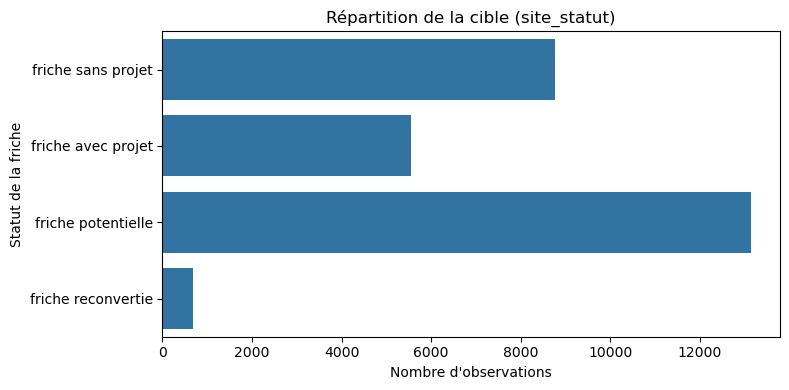

In [123]:
# Répartition des classes cible
print("Répartition des classes cible :")
print(df_ml["site_statut"].value_counts(dropna=False))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(y="site_statut", data=df_ml)
plt.title("Répartition de la cible (site_statut)")
plt.xlabel("Nombre d'observations")
plt.ylabel("Statut de la friche")
plt.tight_layout()
plt.show()


In [124]:
import pandas as pd
import plotly.express as px

# Comptage groupé
plot_data = df.groupby(['site_statut', 'site_reconv_type']).size().reset_index(name='count')

# Calcul du total par site_statut
total_statut = plot_data.groupby('site_statut')['count'].sum().reset_index()
total_statut['site_reconv_type'] = 'Total'

# Ajout des totaux au DataFrame pour affichage par-dessus la barre
plot_data_tot = pd.concat([plot_data, total_statut], ignore_index=True)

# Création du graphique
fig = px.bar(
    plot_data_tot,
    x='site_statut',
    y='count',
    color='site_reconv_type',
    text='count',
    title="Répartition des types de reconversion selon le statut de site (avec total)",
    labels={'count': 'Nombre de sites', 'site_statut': 'Statut du site', 'site_reconv_type': 'Type de reconversion'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# N'afficher le texte (count) qu'au sommet des barres totales (Total)
fig.for_each_trace(
    lambda trace: trace.update(textposition='outside') if trace.name == 'Total' else trace.update(textposition='auto')
)

fig.update_layout(
    barmode='stack',
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=True,
    uniformtext_minsize=10,
    uniformtext_mode='hide'
)
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


In [125]:
# S’assurer de remplacer les NaN pour une vision exhaustive
df['site_reconv_type_filled'] = df['site_reconv_type'].fillna('Non renseigné')

# Croisement
cross = (
    df.groupby(['site_statut', 'site_reconv_type_filled'])
    .size()
    .reset_index(name='count')
    .sort_values(['site_statut', 'count'], ascending=[True, False])
)

# Affichage propre pour les "friche sans projet"
modalites_sans_projet = cross[cross['site_statut'] == "friche sans projet"]

print(modalites_sans_projet)


           site_statut       site_reconv_type_filled  count
28  friche sans projet                 Non renseigné   8663
32  friche sans projet                       habitat     41
31  friche sans projet  autres activités économiques     26
34  friche sans projet                         mixte     13
36  friche sans projet                  renaturation     12
33  friche sans projet                       inconnu      6
37  friche sans projet             équipement public      5
30  friche sans projet                         autre      4
29  friche sans projet   aménagement d'espace public      3
35  friche sans projet      panneaux photovoltaiques      1


il est surprenant de voir que des friches sans projets ont une valeur non nulle de site_reconv_type, ce qui peut nous améné à nous demander si on garde ou pas cette feature

⚠️regarder les échelles de données

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Liste des variables à garder (exemple à adapter)
features = [
    'site_type', 'site_occupation', 'activite_libelle_courte', 
    'comm_nom', 'bati_type', 'bati_vacance', 'bati_patrimoine', 'bati_etat',
    'proprio_type', 'proprio_personne', 'proprio_nom', 'sol_pollution_existe'
]
target = 'site_statut'

# Remplacer les NaN et valeurs vides par 'inconnu' partout (pratique pour les arbres)
df_ml = df[features + [target]].copy()
df_ml = df_ml.fillna('inconnu')
df_ml = df_ml.replace('', 'inconnu')

# Encodage label (catégories → entiers)
le_dict = {}
for col in features + [target]:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))
    le_dict[col] = le  # Garde le label encoder pour chaque colonne (utile pour interpréter ensuite)


In [127]:
X = df_ml[features]
y = df_ml[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratification pour garder l'équilibre des classes
)


In [128]:
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',  # Si classes déséquilibrées
    n_jobs=-1
)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [129]:
y_pred = clf.predict(X_test)

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report :")
print(classification_report(y_test, y_pred))


Confusion matrix :
[[ 769   18    8  312]
 [   7 2527   12   80]
 [  29    1   73   32]
 [ 259   56   25 1415]]

Classification report :
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1107
           1       0.97      0.96      0.97      2626
           2       0.62      0.54      0.58       135
           3       0.77      0.81      0.79      1755

    accuracy                           0.85      5623
   macro avg       0.77      0.75      0.76      5623
weighted avg       0.85      0.85      0.85      5623



In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df["site_statut"])  # ou ta variable cible

# Pour retrouver la correspondance
for idx, label in enumerate(le.classes_):
    print(f"{idx} => {label}")


0 => friche avec projet
1 => friche potentielle
2 => friche reconvertie
3 => friche sans projet


**Accuracy globale :** 0.85, ce qui reste très satisfaisant au vu de l’hétérogénéité du jeu de données et du nombre de classes.
Précision / recall / f1-score :
**Classes majoritaires** (1 et 3) : Très bien reconnues (f1-score respectivement de 0.97 et 0.78), ce qui signifie que le modèle capte efficacement les cas les plus courants. La performance sur ces classes tire la moyenne globale vers le haut. 1 friche potentiel, 3 friche sans projet, sachant que nous voulons améliorer le score de 0 et 2 friche avec projet et friche reconverti pour connaître les paramètres influençant la prise de décision pour la mutabilité
Classe 0 (“support”=1107) : Recall de 0.69, f1-score de 0.71. C’est honorable et cohérent avec une classe intermédiaire en termes de fréquence : le modèle n’a pas de mal particulier à la distinguer. 
Classe 2 (“support”=135) : Recall à 0.62, f1-score à 0.54. Cette classe, très minoritaire, est la moins bien détectée : le modèle en “oublie” presque et la confond probablement avec des classes voisines. Cela peut venir soit d’un manque d’exemples, soit d’une forte proximité avec d’autres profils de friches.

**Macro avg (f1-score : 0.75)** : Cette moyenne non pondérée est correcte, ce qui indique que, même sur les classes les moins représentées, la performance reste acceptable sans s’effondrer.

**Weighted avg (f1-score : 0.84)** : Cette moyenne pondérée par la taille des classes est très haute, mais elle masque les difficultés sur les minoritaires (effet “classe majoritaire”).

Déséquilibre de classes : La distribution du support montre un fort déséquilibre, ce qui explique la baisse de performance sur les classes rares (en particulier la classe 2).
Enjeux : Si la détection des classes minoritaires est importante (ex : friches à potentiel spécifique), il faudra envisager un rééquilibrage (SMOTE, rééchantillonnage, class_weight...).

In [131]:
importances = clf.feature_importances_
feat_imp = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feat_imp)


                    feature  importance
2   activite_libelle_courte    0.184373
0                 site_type    0.177751
3                  comm_nom    0.152870
10              proprio_nom    0.116813
8              proprio_type    0.096618
5              bati_vacance    0.073485
7                 bati_etat    0.045940
11     sol_pollution_existe    0.044022
1           site_occupation    0.033480
6           bati_patrimoine    0.027482
9          proprio_personne    0.026901
4                 bati_type    0.020266


In [132]:
df[["activite_libelle_courte"]].value_counts()

activite_libelle_courte                                         
                                                                    13485
Dépôt de liquides inflammables (D.L.I.)                              1821
Commerce de gros                                                     1474
Collecte et stockage des déchets non dangereux dont les ordu         1237
Dépôt d'immondices                                                    527
                                                                    ...  
 Complexe industriel fabriquant des matériels militaires et             1
 Bâtiments anciens à l'origine non connue à usage de logemen            1
 Activité\tTertiaire (bureaux) Année début activité 1978\t Ann          1
\r\n\r\nBâtiments anciens à l'origine non connue à usage de loge        1
• La société « AUBINE » : ancienne Installation Classée soum            1
Name: count, Length: 1583, dtype: int64

il serait interessant de faire les tests statistiques par rapport a ces variables.
remarque on a pris aucune variable numérique ici 

⚠️pourquoi activite_libelle_courte aussi imporante, 
il est surprenant de voir bati_type en bas de liste, 

In [133]:
import plotly.express as px
import pandas as pd

# Exemple : random forest déjà fit, features dans X.columns
importances = clf.feature_importances_
features = X.columns

df_feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fig = px.bar(
    df_feat_imp,
    x='Importance',
    y='Feature',
    orientation='h',
    color='Importance',
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Importance des variables (feature importance)",
    labels={'Importance': "Importance", 'Feature': "Variable"}
)

fig.update_layout(
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    xaxis=dict(title='Importance', tickformat='.2f'),
    yaxis=dict(title='Variable', automargin=True)
)

# Optionnel : Ajoute le score sur hover
fig.update_traces(
    hovertemplate="Variable : %{y}<br>Importance : %{x:.3f}<extra></extra>"
)

display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Prédire sur ton jeu de test
y_pred = clf.predict(X_test)

# Générer la confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = clf.classes_  # ou df['statut'].unique(), selon le mapping

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


**Commentaire**: en enlevant site_reconv_type on constate une perte de performance pour f1 score sur la classe 2 friche reconvertie, site_reconv_type est à priori une feature non disponible avant la prise décision, sa présence dans la liste des feature pour la modélisation reste a débattre car dans certains cas (111) des friches sans projets ont une valeur non nulles de site_reconv_type, ce qui signifie que une decision a été prise en amont pour décider du devenir d'une friche.

resultats avec site_reconv_type
                precision    recall  f1-score   support

           0       0.70      0.69      0.69      1107
           1       0.97      0.96      0.97      2626
           2       0.64      0.53      0.58       135
           3       0.76      0.79      0.78      1755

    accuracy                           0.84      5623
   macro avg       0.77      0.74      0.75      5623
weighted avg       0.84      0.84      0.84      5623

### Equilibrage

In [135]:
le = LabelEncoder()
y_encoded = le.fit_transform(df["site_statut"])  # ou ta variable cible

# Pour retrouver la correspondance
for idx, label in enumerate(le.classes_):
    print(f"{idx} => {label}")


0 => friche avec projet
1 => friche potentielle
2 => friche reconvertie
3 => friche sans projet


In [136]:
from collections import Counter
print(Counter(y_train))

Counter({1: 10503, 3: 7019, 0: 4431, 2: 539})


Classification report :
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      1107
           1       0.97      0.96      0.97      2626
           2       0.47      0.61      0.53       135
           3       0.78      0.77      0.77      1755

    accuracy                           0.84      5623
   macro avg       0.73      0.76      0.74      5623
weighted avg       0.85      0.84      0.84      5623



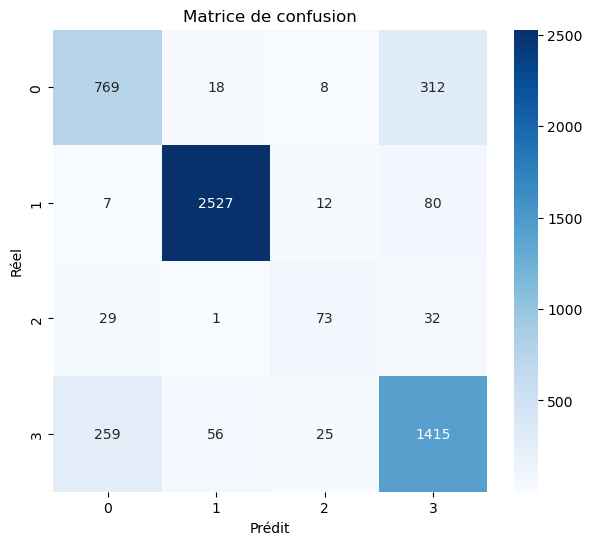

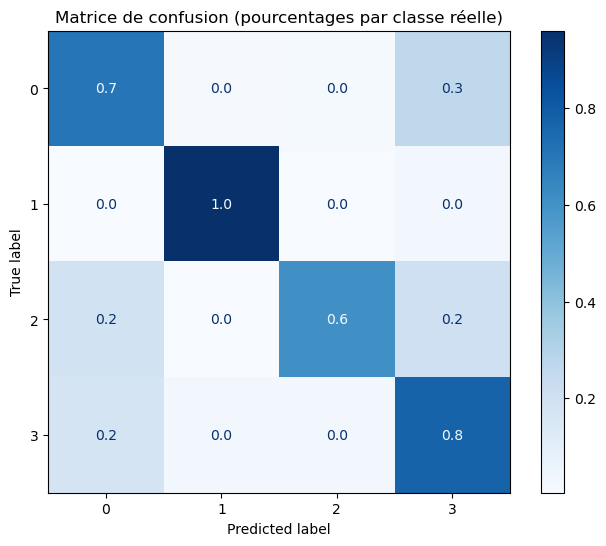

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd

# 1. Définir les features et la target (tu l’as déjà fait)
features = [
    'site_type', 'site_occupation', 'activite_libelle_courte', 
    'comm_nom', 'bati_type', 'bati_vacance', 'bati_patrimoine', 'bati_etat',
    'proprio_type', 'proprio_personne', 'proprio_nom', 'sol_pollution_existe'
]
target = 'site_statut'

# 2. Split Train/Test
X = df_ml[features]
y = df_ml[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Rééquilibrage SMOTE uniquement sur le TRAIN
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# 4. Fit modèle sur données rééchantillonnées
clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
clf.fit(X_res, y_res)

# 5. Prédiction sur le test set
y_pred = clf.predict(X_test)

# 6. Affichage des scores principaux
print("Classification report :\n", classification_report(y_test, y_pred))

# 7. (Optionnel) Matrice de confusion en pourcentages
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = clf.classes_  # ou range(len(le_dict[target].classes_))
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap='Blues', values_format='.1f')
plt.title("Matrice de confusion (pourcentages par classe réelle)")
plt.show()


### Feature engineering élargissement du choix des features

ex feature utilisé par l'EPF pour la mutabilité
Etat de la friche Surface de la parcelle: Emprise au sol du bâti  État du bâti et infrastructure Présence de pollution
Situation: En centre-ville ou centre-bourg Terrain viabilisé  Distance d'une entrée d'autoroute Distance d'une gare/ TC Voie d'eau à proximité       
Commerces / services à proximité-Distance raccordement BT/HT       
Réglementation: Zonage PLU-Risque naturel  Risque technologique  Monument historique -  Patrimoine Valeur architecturale  
Ecosystème Couvert: végétal Espèce protégée- Zonage environnemental- TVBZones humides


### Test sur les 50 variables toutes les modalités nan sont transformé en 0

In [138]:
import pandas as pd
from scipy.stats import chi2_contingency

# Étape 1 — Préparation : extraire les deux colonnes concernées
df_test = df[["site_statut", "site_reconv_type"]].copy()

# Étape 2 — Nettoyage : on enlève les lignes avec valeurs manquantes
df_test.dropna(subset=["site_statut", "site_reconv_type"], inplace=True)

# Étape 3 — Construction du tableau de contingence
# Ce tableau croise les effectifs pour chaque combinaison de modalités
contingence = pd.crosstab(df_test["site_statut"], df_test["site_reconv_type"])

# Étape 4 — Test du Chi²
# H0 : les deux variables sont indépendantes
# H1 : il existe une dépendance entre les deux variables
chi2, p_value, dof, expected = chi2_contingency(contingence)

# Étape 5 — Interprétation
print("Statistique du test du Chi² :", chi2)
print("Degrés de liberté :", dof)
print("P-value :", p_value)

if p_value < 0.05:
    print("✅ Conclusion : il existe une association significative entre le statut de la friche et son type de réhabilitation.")
else:
    print("❌ Conclusion : aucune relation significative n’a été détectée entre les deux variables.")


Statistique du test du Chi² : 368.0570615521297
Degrés de liberté : 36
P-value : 1.1782490964730334e-56
✅ Conclusion : il existe une association significative entre le statut de la friche et son type de réhabilitation.


### bac a sable pour tester les features

                              precision    recall  f1-score   support

                           0       1.00      1.00      1.00      5155
 aménagement d'espace public       1.00      0.44      0.62         9
                       autre       1.00      0.43      0.60         7
autres activités économiques       0.90      0.83      0.86        69
                      bureau       0.50      0.29      0.36         7
                    commerce       0.67      0.35      0.46        17
                     habitat       0.83      1.00      0.91       215
                   industrie       0.00      0.00      0.00         7
                       mixte       0.85      0.90      0.87        68
    panneaux photovoltaiques       0.67      0.40      0.50         5
                renaturation       1.00      0.47      0.64        17
           équipement public       0.92      0.74      0.82        47

                    accuracy                           0.99      5623
                  

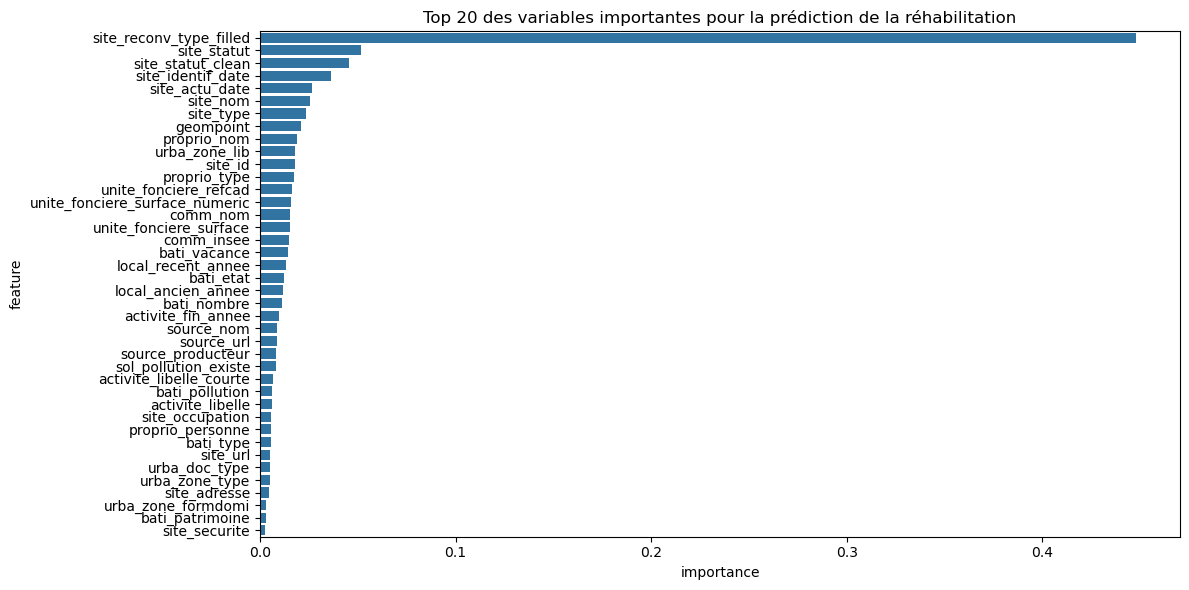

In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Colonnes cibles
target_col = "site_reconv_type"
X = df.drop(columns=[target_col])
y = df[target_col]

# 3. Remplacement des valeurs problématiques
X.replace(['inconnu', '', 'None'], np.nan, inplace=True)
y.replace(['inconnu', '', 'None'], np.nan, inplace=True)

# 4. Tout convertir en chaînes de caractères pour éviter les conflits de type
X = X.astype(str).replace("nan", np.nan)
y = y.astype(str).replace("nan", np.nan)

# 5. Imputation manuelle → 0
X = X.fillna("0")
y = y.fillna("0")

# 6. Encodage ordinal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = encoder.fit_transform(X)

# 7. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 8. Vérification finale
assert not np.isnan(X_train).any(), "X_train contient encore des NaN"
assert not np.isnan(X_test).any(), "X_test contient encore des NaN"
assert not y_train.isnull().any(), "y_train contient encore des NaN"
assert not y_test.isnull().any(), "y_test contient encore des NaN"

# 9. Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 10. Évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 11. Importance des variables
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 12. Affichage du top 20
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(40), x="importance", y="feature")
plt.title("Top 20 des variables importantes pour la prédiction de la réhabilitation")
plt.tight_layout()
plt.show()

# 13. Export CSV si besoin
# importance_df.to_csv("importances_rehabilitation.csv", index=False)


⚠️revoir def math poids variable dans feature importance

### Cramer

In [25]:
for col in df_work.columns:
    if df_work[col].dtype == 'object':
        df_work[col] = df_work[col].fillna('inconnu')

In [31]:
df_work["site_actu_date"].dtypes

dtype('<M8[ns]')

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# ---------------------
# Étape 1 : Regrouper les modalités rares
# ---------------------

def regroup_rare_modalities(series, min_count=20):
    counts = series.value_counts()
    return series.apply(lambda x: x if counts[x] >= min_count else 'Autres')

# Appliquer aux colonnes catégorielles
def preprocess_categoricals(df_work, categorical_columns, min_count=20):
    df_processed = df_work.copy()
    for col in categorical_columns:
        df_processed[col] = regroup_rare_modalities(df_processed[col], min_count=min_count)
    return df_processed

# ---------------------
# Étape 2 : Calculer le Cramér's V
# ---------------------

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # Correction de biais
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# ---------------------
# Étape 3 : Application sur ton dataset
# ---------------------

# Exemple : 'site_reconv_type' est la variable cible
target = 'site_reconv_type'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != target]

# Prétraitement
df_cleaned = preprocess_categoricals(df, categorical_cols + [target], min_count=20)

# Calcul Cramér's V pour chaque variable catégorielle vs cible
cramer_scores = {}
for col in categorical_cols:
    score = cramers_v(df_cleaned[col], df_cleaned[target])
    cramer_scores[col] = score

# Résultat trié
cramer_df = pd.DataFrame.from_dict(cramer_scores, orient='index', columns=['CramersV'])
cramer_df = cramer_df.sort_values(by='CramersV', ascending=False)


In [27]:
cramer_df

CramersV
site_statut            0.366548
site_url               0.282419
bati_vacance           0.238366
site_identif_date      0.213984
site_actu_date         0.210805
sol_pollution_existe   0.208197
bati_pollution         0.185145
bati_etat              0.143996
site_securite          0.140755
site_type              0.135850
source_producteur      0.135327
source_nom             0.135327
source_url             0.127258
bati_type              0.123535
source_contact         0.097509
site_occupation        0.096074
site_adresse           0.092132
unite_fonciere_refcad  0.089957
proprio_personne       0.086980
bati_patrimoine        0.086286
comm_nom               0.083733
proprio_type           0.082750
comm_insee             0.082257
activite_fin_annee     0.075859
urba_zone_lib          0.070383
activite_libelle       0.065840
proprio_nom            0.058338
activite_code          0.056930
urba_zone_type         0.047622
urba_zone_formdomi     0.030011
urba_doc_type          0.028956
site_nom               0.000000
sol_depollution_fiche  0.000000
sol_pollution_origine  0.000000
site_id                     NaN
geompoint                   NaN

🔎 Lecture structurée
🔝 Variables fortement corrélées avec la cible
site_statut (0.366) → cohérent, c’est souvent la variable cible ou une proche.

site_url (0.282) → étrange à première vue ; possible effet structurel (présence d’un site Web liée à des friches plus avancées ?).

bati_vacance (0.238), sol_pollution_existe (0.208), bati_pollution (0.185), site_securite (0.141) → toutes très pertinentes sur le degré de délabrement ou d’abandon.

Ces variables peuvent avoir une valeur explicative directe pour un modèle de classification du statut.

📉 Variables faiblement corrélées
urba_zone_formdomi, urba_doc_type, proprio_nom, etc. → faible Cramér’s V : à ne garder que si elles ont un intérêt métier, ou si elles se croisent bien avec d’autres.

⚠️ Variables à 0
site_nom, sol_depollution_fiche, sol_pollution_origine → attention, soit :

elles n’ont aucune variation significative liée à la cible ;

soit leur encodage ou nettoyage a masqué les signaux.

❓ Variables à NaN (non traitées)
site_id, geompoint → normal, ce sont des identifiants ou coordonnées.

➤ À exclure d’office de toute analyse statistique directe.



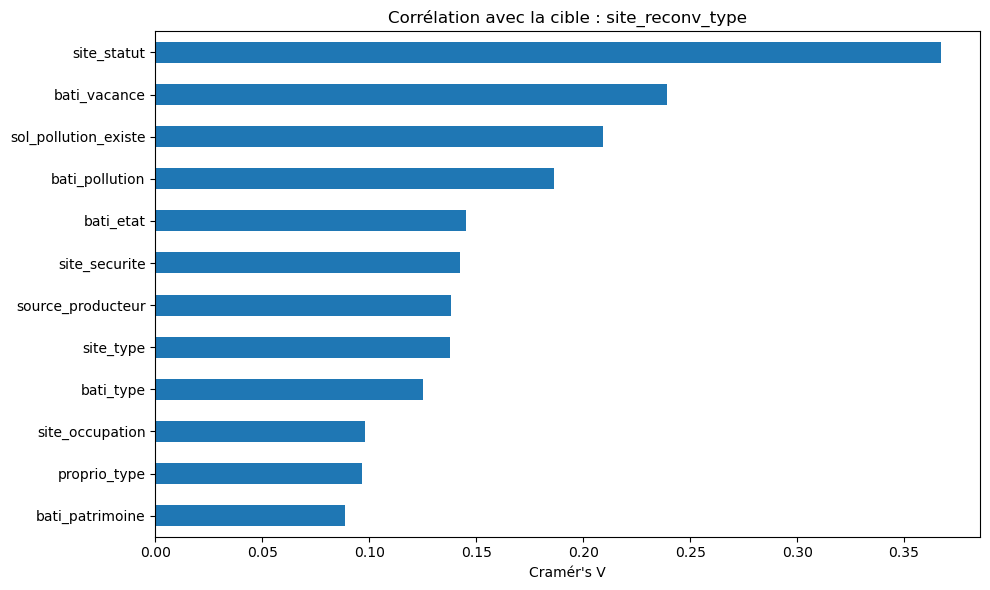

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Fonction pour regrouper les modalités rares
def regroup_rare_modalities(series, min_count=20):
    counts = series.value_counts(dropna=False)
    return series.apply(lambda x: x if counts.get(x, 0) >= min_count else 'Autres')

# Fonction de Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        return np.nan  # Cas dégénéré
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Liste manuelle des variables catégorielles pertinentes
categorical_vars_to_keep = [
    'site_statut',
    'bati_vacance',
    'sol_pollution_existe',
    'bati_pollution',
    'bati_etat',
    'site_securite',
    'site_type',
    'source_producteur',
    'bati_type',
    'site_occupation',
    'proprio_type',
    'bati_patrimoine'
]

# Cible
target = 'site_reconv_type'

# Nettoyage
df_filtered = df[[target] + categorical_vars_to_keep].copy()
df_filtered = df_filtered.fillna('inconnu')  # Remplacer les NaN par 'inconnu'

# Regrouper les modalités rares
for col in categorical_vars_to_keep + [target]:
    df_filtered[col] = regroup_rare_modalities(df_filtered[col], min_count=20)

# Calcul de Cramér’s V
cramer_scores = {
    col: cramers_v(df_filtered[col], df_filtered[target])
    for col in categorical_vars_to_keep
}
cramer_df = pd.DataFrame.from_dict(cramer_scores, orient='index', columns=['CramersV'])
cramer_df = cramer_df.sort_values(by='CramersV', ascending=False)

# Affichage du graphe
plt.figure(figsize=(10, 6))
cramer_df['CramersV'].plot(kind='barh')
plt.xlabel("Cramér's V")
plt.title("Corrélation avec la cible : site_reconv_type")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [37]:
def is_numeric_and_valid(df, col, target, min_groups=2):
    if df[col].dtype.kind not in 'fi':  # float or int
        return False
    try:
        groups = [df[col][df[target] == val].dropna() for val in df[target].unique()]
        groups = [g for g in groups if len(g) > 1]
        return len(groups) >= min_groups
    except:
        return False

valid_numeric_cols = [col for col in numeric_cols if is_numeric_and_valid(df, col, 'site_reconv_type')]


In [38]:
from scipy.stats import kruskal

def test_kruskal_all(df, numeric_vars, target_cat):
    results = []
    for col in numeric_vars:
        groups = [df[col][df[target_cat] == cat].dropna() for cat in df[target_cat].unique()]
        if len(groups) >= 2:
            stat, p = kruskal(*groups)
            results.append((col, p))
    return pd.DataFrame(results, columns=["Variable", "p_value"]).sort_values(by="p_value")

# Sélectionne les colonnes numériques
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Applique le test
kruskal_results = test_kruskal_all(df, numeric_cols, 'site_reconv_type')


In [39]:
kruskal_results

Variable       p_value
9      unite_fonciere_surface  5.494540e-67
3                 bati_nombre  1.937577e-59
6          local_recent_annee  2.165487e-30
5          local_ancien_annee  6.347834e-27
0              site_ademe_url           NaN
1             site_projet_url           NaN
2           site_reconv_annee           NaN
4                bati_surface           NaN
7         sol_pollution_annee           NaN
8   sol_pollution_commentaire           NaN
10          desserte_distance           NaN
11       desserte_commentaire           NaN
12                   geomsurf           NaN

In [44]:
selected_vars = [
    'site_reconv_type',  # Cible

    # Catégorielles utiles
    'site_statut', 'site_url', 'bati_vacance', 'sol_pollution_existe',
    'bati_pollution', 'bati_etat', 'site_securite', 'site_type',
    'source_producteur', 'source_nom', 'bati_type', 'site_occupation',

    # Numériques pertinentes
    'unite_fonciere_surface', 'bati_nombre',
    'local_recent_annee', 'local_ancien_annee',

    # Temporelles sélectionnées
    #'site_actu_annee', 'actualisation_jour',
    #'site_actu_mois_sin', 'site_actu_mois_cos'
]

In [46]:
df[selected_vars].isna().sum()

site_reconv_type              0
site_statut                   0
site_url                      0
bati_vacance                  0
sol_pollution_existe          0
bati_pollution                0
bati_etat                     0
site_securite                 0
site_type                     0
source_producteur             0
source_nom                    0
bati_type                     0
site_occupation               0
unite_fonciere_surface       63
bati_nombre                  66
local_recent_annee        10694
local_ancien_annee        12772
dtype: int64

In [22]:
df['site_url'].value_counts()

site_url
inconnu                                                                                                                                                         11120
https://www.suippes.fr/9143-2/                                                                                                                                     14
https://fiches-risques.brgm.fr/georisques/basias-detaillee/LRO6602417                                                                                              13
https://fiches-risques.brgm.fr/georisques/basias-detaillee/NA                                                                                                      10
https://www.google.com/maps/@45.5922396,0.1766609,3a,72.8y,317.09h,84.27t/data=!3m6!1e1!3m4!1smpDybbJGI3Por8GFLoUS9Q!2e0!7i13312!8i6656?authuser=0&entry=ttu        3
                                                                                                                                                                .

## 📖 Synthèse sur la qualité des données

### Complétude

In [140]:
completeness_by_column = {}
completeness_by_domaine_colonne = []

print("--- Début de l’analyse de complétude détaillée ---")
for domaine, cols in domaines.items():
    print(f"\n🔍 Domaine : {domaine}")
    for col in cols:
        if col not in df.columns:
            print(f"  ⚠️ Colonne absente : {col}")
            continue

        series = df[col]
        is_str = pd.api.types.is_string_dtype(series)
        missing_mask = series.isna()
        if is_str:
            missing_mask |= series.astype(str).str.lower().isin([s.lower() for s in MISSING_SYNONYMS])

        completeness = 100 * (1 - missing_mask.sum() / len(series))
        completeness = round(completeness, 1)

        completeness_by_column[col] = completeness
        completeness_by_domaine_colonne.append({
            "Domaine": domaine,
            "Colonne": col,
            "Complétude (%)": completeness
        })
        print(f"  • {col} : {completeness:.1f}%")

print(f"\n✅ {len(completeness_by_column)} colonnes analysées.")


--- Début de l’analyse de complétude détaillée ---

🔍 Domaine : information
  • site_id : 100.0%
  • site_nom : 100.0%
  • site_type : 38.7%
  • site_statut : 100.0%
  • site_occupation : 8.1%
  • site_reconv_type : 8.5%

🔍 Domaine : temporel
  • site_identif_date : 100.0%
  • site_actu_date : 100.0%
  • site_reconv_annee : 0.0%
  • activite_fin_annee : 14.2%
  • local_ancien_annee : 54.6%
  • local_recent_annee : 62.0%

🔍 Domaine : localisation
  • comm_nom : 99.5%
  • comm_insee : 99.5%
  • geompoint : 100.0%
  • geomsurf : 0.0%
  • site_adresse : 14.2%

🔍 Domaine : bati
  • bati_type : 7.6%
  • bati_nombre : 99.8%
  • bati_surface : 0.1%
  • bati_vacance : 7.5%
  • bati_patrimoine : 10.0%
  • bati_etat : 20.6%
  • unite_fonciere_surface : 99.8%
  • unite_fonciere_refcad : 99.9%

🔍 Domaine : proprietaire
  • proprio_type : 98.9%
  • proprio_personne : 99.8%
  • proprio_nom : 98.9%
  • activite_libelle : 52.0%
  • activite_code : 0.5%

🔍 Domaine : pollution
  • sol_pollution_annee : 0

In [141]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors

# --- Étape 1 : Créer les sous-DataFrames à partir d'un seul df ---
df_information = df[['site_id', 'site_nom', 'site_type', 'site_statut', 'site_occupation', 'site_reconv_type']]
df_temporel = df[['site_identif_date', 'site_actu_date', 'site_reconv_annee', 'activite_fin_annee', 'local_ancien_annee', 'local_recent_annee']]
df_localisation = df[['comm_nom', 'comm_insee', 'geompoint', 'geomsurf', 'site_adresse']]
df_bati = df[['bati_type', 'bati_nombre', 'bati_surface', 'bati_vacance', 'bati_patrimoine', 'bati_etat', 'unite_fonciere_surface', 'unite_fonciere_refcad']]
df_proprietaire = df[['proprio_type', 'proprio_personne', 'proprio_nom', 'activite_libelle', 'activite_code']]
df_pollution = df[['sol_pollution_annee', 'sol_pollution_existe', 'sol_pollution_origine', 'sol_pollution_commentaire', 'sol_depollution_fiche', 'site_securite', 'bati_pollution']]
df_urbanisme = df[['urba_zone_type', 'urba_zone_lib', 'urba_zone_formdomi', 'urba_doc_type', 'desserte_distance', 'desserte_commentaire']]
df_source = df[['source_nom', 'source_url', 'source_producteur', 'source_contact', 'site_url', 'site_ademe_url', 'site_projet_url']]

# --- Étape 2 : Mettre ces DataFrames dans un dictionnaire ---
df_domaines = {
    "information": df_information,
    "temporel": df_temporel,
    "localisation": df_localisation,
    "bati": df_bati,
    "proprietaire": df_proprietaire,
    "pollution": df_pollution,
    "urbanisme": df_urbanisme,
    "source": df_source
}

# --- Étape 3 : Calcul de la complétude ---
completeness_scores = {}
for domaine, d in df_domaines.items():
    taux_non_nans = 100 * (1 - d.isna().sum().sum() / d.size)
    completeness_scores[domaine] = round(taux_non_nans, 2)

# --- Étape 4 : DataFrame pour l'affichage ---
df_scores = pd.DataFrame({
    "Domaine": list(completeness_scores.keys()),
    "Complétude (%)": list(completeness_scores.values())
}).sort_values("Complétude (%)", ascending=True)

score_global = round(df_scores["Complétude (%)"].mean(), 2)

# --- Étape 5 : Graphique Plotly ---
pastel_colors = plotly.colors.qualitative.Pastel
bar_colors = pastel_colors * (len(df_scores) // len(pastel_colors) + 1)

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.65, 0.35],
    specs=[[{"type": "bar"}, {"type": "domain"}]],
    subplot_titles=("Complétude par domaine", f"Complétude globale : {score_global:.1f}%")
)

fig.add_trace(go.Bar(
    x=df_scores["Complétude (%)"],
    y=df_scores["Domaine"],
    orientation='h',
    text=[f"{v:.1f}%" for v in df_scores["Complétude (%)"]],
    textposition="outside",
    marker_color=bar_colors[:len(df_scores)]
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=["Présent", "Manquant"],
    values=[score_global, 100 - score_global],
    hole=0.5,
    marker_colors=["#AEDFF7", "#FFD3B6"],
    textinfo='none'
), row=1, col=2)

fig.update_layout(
    height=500,
    width=1000,
    showlegend=False,
    plot_bgcolor='white',
    margin=dict(t=80, l=80, r=80, b=40),
    font=dict(size=14)
)

fig.update_xaxes(range=[0, 100], row=1, col=1)
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


### Criticité

In [142]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# --- Calcul des taux de doublons par domaine ---
scores_domaine = {}

for domaine, colonnes in domaines.items():
    colonnes_valides = [col for col in colonnes if col in df.columns]
    if colonnes_valides:
        sous_df = df[colonnes_valides]
        n_lignes = len(sous_df)
        n_doublons = sous_df.duplicated().sum()
        taux_doublons = 100 * n_doublons / n_lignes if n_lignes > 0 else 0
        scores_domaine[domaine] = round(taux_doublons, 2)
    else:
        scores_domaine[domaine] = 0

# --- Score global ---
score_global = round(np.mean(list(scores_domaine.values())), 2)

# --- Tri pour affichage ---
domaines_sorted = sorted(scores_domaine, key=scores_domaine.get)
scores_sorted = [scores_domaine[d] for d in domaines_sorted]

# --- Visualisation Plotly ---
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.65, 0.35],
    specs=[[{"type": "bar"}, {"type": "domain"}]],
    subplot_titles=("Taux de doublons par domaine", f"Taux global : {score_global:.1f}%")
)

# Bar plot
fig.add_trace(go.Bar(
    x=scores_sorted,
    y=domaines_sorted,
    orientation='h',
    text=[f"{v:.1f}%" for v in scores_sorted],
    textposition="outside",
    marker_color=["#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF"] * 2
), row=1, col=1)

# Donut
fig.add_trace(go.Pie(
    labels=["Doublons", "Uniques"],
    values=[score_global, 100 - score_global],
    hole=0.5,
    marker_colors=["#FF6F61", "#C1F0F6"],
    textinfo="none"
), row=1, col=2)

fig.update_layout(
    height=500,
    width=1000,
    showlegend=False,
    plot_bgcolor='white',
    margin=dict(t=80, l=80, r=80, b=40),
    font=dict(size=14)
)
fig.update_xaxes(range=[0, 100], row=1, col=1)
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


### Unicité

In [143]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors

def graphe_unicite_par_domaine(df, domaines, missing_synonyms=None):
    """
    Calcule et affiche un graphique combiné (barres + donut) de l’unicité moyenne par domaine.
    """
    if missing_synonyms is None:
        missing_synonyms = []

    unicite_domaine = {}
    total_uniques = 0
    total_valides = 0

    for domaine, colonnes in domaines.items():
        scores = []
        for col in colonnes:
            if col not in df.columns:
                continue

            series = df[col]
            is_str = pd.api.types.is_string_dtype(series)
            missing_mask = series.isna()

            if is_str:
                missing_mask |= series.astype(str).str.lower().isin([s.lower() for s in missing_synonyms])

            valid_values = series[~missing_mask]
            if not valid_values.empty:
                nb_uniques = valid_values.nunique(dropna=True)
                unicite = (nb_uniques / len(valid_values)) * 100
                scores.append(unicite)

                total_uniques += nb_uniques
                total_valides += len(valid_values)

        if scores:
            unicite_domaine[domaine] = round(np.mean(scores), 2)

    if not unicite_domaine or total_valides == 0:
        raise ValueError("Aucun score d’unicité calculable.")

    score_global = round((total_uniques / total_valides) * 100, 2)

    # --- DataFrame trié ---
    domaines_sorted = sorted(unicite_domaine, key=unicite_domaine.get)
    scores_sorted = [unicite_domaine[d] for d in domaines_sorted]

    # --- Palette pastel ---
    pastel_colors = plotly.colors.qualitative.Pastel
    bar_colors = pastel_colors * (len(domaines_sorted) // len(pastel_colors) + 1)

    # --- Construction des subplots ---
    fig = make_subplots(
        rows=1, cols=2,
        column_widths=[0.65, 0.35],
        specs=[[{"type": "bar"}, {"type": "domain"}]],
        subplot_titles=("Unicité moyenne par domaine", f"Unicité globale : {score_global:.1f}%")
    )

    # --- Barres par domaine ---
    fig.add_trace(go.Bar(
        x=scores_sorted,
        y=domaines_sorted,
        orientation='h',
        text=[f"{v:.1f}%" for v in scores_sorted],
        textposition="outside",
        marker_color=bar_colors[:len(domaines_sorted)]
    ), row=1, col=1)

# --- Donut global (pastel cohérent) ---
    fig.add_trace(go.Pie(
        labels=["Uniques", "Doublons"],
        values=[score_global, 100 - score_global],
        hole=0.5,
        marker_colors=["#A8DADC", "#FFB5A7"],  # nouveaux tons pastel doux
        textinfo='none'
    ), row=1, col=2)


    # --- Layout ---
    fig.update_layout(
        height=500,
        width=1000,
        showlegend=False,
        plot_bgcolor='white',
        margin=dict(t=80, l=80, r=80, b=40),
        font=dict(size=14)
    )

    fig.update_xaxes(range=[0, 100], row=1, col=1)
    display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


In [144]:
graphe_unicite_par_domaine(df, domaines, missing_synonyms=None)

### Pertinence

| Score | Critère de criticité métier utilisé                                                                                     | Exemple de colonnes concernées                                                                |
| ----- | ----------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **3** | Obligatoire pour l’identification, la localisation ou la traçabilité. Colonne structurelle.                             | `site_id`, `comm_insee`, `geompoint`, `site_type`, `site_statut`, `proprio_nom`, `source_url` |
| **2** | Donnée essentielle pour caractériser l’état du site, utile pour les traitements métier mais pas strictement obligatoire | `bati_etat`, `bati_vacance`, `site_occupation`, `sol_pollution_existe`, `urba_doc_type`       |
| **1** | Donnée complémentaire ou enrichissante, souvent non structurante ou très souvent absente                                | `source_contact`, `site_projet_url`, `sol_pollution_commentaire`, `bati_patrimoine`           |


🧮 Méthodologie de pondération du score de pertinence des variables
Afin d’évaluer la pertinence globale des variables dans le cadre de l’analyse des friches, nous avons combiné trois dimensions complémentaires, chacune normalisée et pondérée selon son poids stratégique :

Criticité métier (α)
→ Issue d’un codage expert cnig (codes couleur) fondé sur le dictionnaire de variables officiel.
→ Pondérée à 0.4, car elle reflète la vision métier stratégique, bien que subjective.

Importance dans le modèle de Machine Learning (β)
→ Calculée via un algorithme de type Random Forest pour prédire la classe de friche.
→ Pondérée à 0.3, ce score reflète l’utilité prédictive mais dépend du modèle et de la cible.

Utilisation dans les indicateurs métiers existants (γ)
→ Basée sur la présence des variables dans les 22 indicateurs utilisés par Cartofriches.
→ Pondérée à 0.3, ce critère ancre l’analyse dans les usages réels du terrain.

La formule du score global de pertinence pondérée est donc :

$$score pondéré = 0.4*criticité +0.3*ImportanceMl +0.3*Usage$$


| Axe                | Nom de variable    | Origine                                   | Type de données          |
| ------------------ | ------------------ | ----------------------------------------- | ------------------------ |
| Criticité métier   | `criticite_metier` | Codes couleur / standard CNIG             | Score subjectif (1–3)    |
| Importance ML      | `importance_ml`    | Modèle Random Forest                      | Score numérique (0–0.18) |
| Usage réel (KPI 6) | `importance_usage` | Variable utilisée dans les 22 indicateurs | Score binaire ou pondéré |


🧮 Formules de calcul

**1. Score pondéré par variable :**

$$
\text{Score}_{\text{pondéré}} = 0.3 \times \text{Criticité}_{\text{métier}} + 0.4 \times \text{Importance}_{\text{ML normalisée}} + 0.2 \times \text{Indicateur}_{\text{métier}} + 0.1 \times \text{Notation}_{\text{utilité}}
$$

**2. Poids ML de chaque variable :**

$$
\text{Poids}_{\text{ML}}(i) = \frac{\text{Importance}_{\text{ML}}(i)}{\sum_{j=1}^{n} \text{Importance}_{\text{ML}}(j)}
$$

**3. Score global de pertinence (pondéré) :**

$$
\text{Score}_{\text{global}} = \sum_{i=1}^{n} \left( \text{Score}_{\text{pondéré}}(i) \times \text{Poids}_{\text{ML}}(i) \right)
$$

**4. Score global exprimé en pourcentage de la note maximale (4.0) :**

$$
\text{Score}_{\text{global (\%)} } = \left( \frac{\text{Score}_{\text{global}}}{4.0} \right) \times 100
$$


⚠️ réevaluer les cofficients de pondérations avec un modèle plus robuste

In [145]:
from IPython import get_ipython
import re
import pandas as pd

# Accès aux cellules du notebook
cells = get_ipython().user_ns['In']

# Regex pour extraire les variables et niveaux
pattern = r'encadre_html\(\s*["\'](.*?)["\']\s*,\s*niveau\s*=\s*["\'](.*?)["\']\s*\)'

# Dictionnaire pour stocker les résultats
balises = []

for cell in cells:
    if cell:
        matches = re.findall(pattern, cell)
        for var, niveau in matches:
            balises.append({'colonne': var, 'niveau': niveau})

# Conversion en DataFrame pour une utilisation facile
df_balises = pd.DataFrame(balises).drop_duplicates()

# Optionnel : transformation en score (vert=2, orange=1.5, rouge=1, gris=0.5)
notation_map = {'vert': 2, 'orange': 1.5, 'rouge': 1, 'gris': 0.5}
df_balises['notation_utilite'] = df_balises['niveau'].map(notation_map)

display(df_balises)


colonne  niveau  notation_utilite
0                     site_id    vert               2.0
1                    site_nom  orange               1.5
2                   site_type    vert               2.0
3                 site_statut    vert               2.0
4             site_occupation    gris               0.5
5            site_reconv_type  orange               1.5
6           site_identif_date    vert               2.0
7              site_actu_date    vert               2.0
8              local_xx_annee   rouge               1.0
9           site_reconv_annee    gris               0.5
10         activite_fin_annee  orange               1.5
11                 comm_insee    vert               2.0
12                   comm_nom    vert               2.0
13               site_adresse   rouge               1.0
14                  geompoint    vert               2.0
15                   geomsurf    gris               0.5
16              urba_doc_type  orange               1.5
17             urba_zone_type  orange               1.5
18              urba_zone_lib  orange               1.5
19         urba_zone_formdomi    gris               0.5
20           deserte_distance   rouge               1.0
21        sol_pollution_annee    gris               0.5
22       sol_pollution_existe   rouge               1.0
23      sol_pollution_origine   rouge               1.0
24             bati_pollution   rouge               1.0
25  sol_pollution_commentaire    gris               0.5
26              site_securite   rouge               1.0
27       sol_pollution_statut   rouge               1.0
28                  bati_type   rouge               1.0
29                bati_nombre    vert               2.0
30               bati_surface   rouge               1.0
31               bati_vacance    gris               0.5
32            bati_patrimoine   rouge               1.0
33                  bati_etat   rouge               1.0
34     unite_fonciere_surface    vert               2.0
35      unite_fonciere_refcad    vert               2.0
36               proprio_type    vert               2.0
37                proprio_nom    vert               2.0
38           proprio_personne    vert               2.0
39           activite_libelle  orange               1.5
40              activite_code    gris               0.5
41                 source_nom  orange               1.5
42          source_producteur  orange               1.5
43                 source_url  orange               1.5
44             source_contact    gris               0.5
45                   site_url  orange               1.5
46             sitr_url_ademe    gris               0.5
47            site_projet_url    gris               0.5

In [146]:
import pandas as pd
import numpy as np

# === 1. Feature importances déjà calculées ===
importance_df = pd.DataFrame({
    'colonne': X.columns,
    'importance_ml': model.feature_importances_
})

# === 2. Normalisation ML sur 0-4 ===
ml_max = importance_df['importance_ml'].max()
importance_df['importance_ml_normalisée'] = (importance_df['importance_ml'] / ml_max) * 4

# === 3. Import manuel des criticités métiers ===
criticite_metier = {
    'site_type': 4, 'site_occupation': 4, 'comm_nom': 4, 'proprio_nom': 4,
    'bati_vacance': 3, 'bati_etat': 3, 'proprio_type': 3, 'sol_pollution_existe': 3,
    'activite_libelle_courte': 4, 'bati_patrimoine': 2, 'bati_type': 2, 'proprio_personne': 2
}

# === 4. Liste des indicateurs Cartofriches ===
indicateurs = [
    'site_type', 'comm_nom', 'site_occupation', 'bati_vacance', 'bati_etat',
    'bati_type', 'bati_patrimoine', 'sol_pollution_existe', 'proprio_type',
    'proprio_nom', 'proprio_personne'
]

# === 5. Ton code couleur personnel (à enrichir si besoin) ===
# Niveau de confiance subjectif : vert=2, orange=1.5, rouge=1, gris=0.5
notation_utilite_dict = dict(zip(df_balises['colonne'], df_balises['notation_utilite']))

# === 6. Fusion des infos ===
importance_df['criticite_metier'] = importance_df['colonne'].map(criticite_metier).fillna(1)
importance_df['indicateur_metier'] = importance_df['colonne'].apply(lambda x: 1 if x in indicateurs else 0)
importance_df['notation_utilite'] = importance_df['colonne'].map(notation_utilite_dict).fillna(1)


# === 7. Score pondéré enrichi ===
importance_df['note_ponderee'] = (
    0.3 * importance_df['criticite_metier'] +
    0.4 * importance_df['importance_ml_normalisée'] +
    0.2 * importance_df['indicateur_metier'] +
    0.1 * importance_df['notation_utilite']
)

# === 8. Tri final et affichage ===
importance_df = importance_df.sort_values('note_ponderee', ascending=False).reset_index(drop=True)
display(importance_df)

# Ajout manuel de site_reconv_type avec note subjective mais importance ML nulle
ligne_site_reconv_type = pd.DataFrame([{
    'colonne': 'site_reconv_type',
    'importance_ml': 0.0,
    'importance_ml_normalisée': 0.0,
    'criticite_metier': 4.0,
    'indicateur_metier': 0,
    'notation_utilite': 1.5,
    'note_ponderee': 0.3 * 4.0 + 0.4 * 0 + 0.2 * 0 + 0.1 * 1.5  # = 1.35
}])

# Ajout à la fin de la table
importance_df = pd.concat([importance_df, ligne_site_reconv_type], ignore_index=True)


# === Score global de pertinence pondéré (déjà calculé)
score_global_pertinence = (importance_df['note_ponderee'] * importance_df['importance_ml']).sum()

# === Passage en pourcentage sur une échelle de 0 à 4
score_max_possible = 4
pourcentage_pertinence = (score_global_pertinence / score_max_possible) * 100

print("Score de pertinence global en % :", round(pourcentage_pertinence, 2), "%")

colonne  importance_ml  importance_ml_normalisée  \
0          site_reconv_type_filled       0.448020                  4.000000   
1                        site_type       0.023554                  0.210293   
2                      proprio_nom       0.018997                  0.169605   
3                         comm_nom       0.015251                  0.136162   
4                  site_occupation       0.005704                  0.050923   
5                     proprio_type       0.017433                  0.155648   
6          activite_libelle_courte       0.006587                  0.058810   
7                        bati_etat       0.012121                  0.108221   
8             sol_pollution_existe       0.008200                  0.073208   
9                     bati_vacance       0.014099                  0.125880   
10                proprio_personne       0.005674                  0.050660   
11                       bati_type       0.005592                  0.049923   
12                 bati_patrimoine       0.003226                  0.028805   
13                     site_statut       0.051649                  0.461134   
14               site_identif_date       0.036268                  0.323810   
15                  site_actu_date       0.026691                  0.238302   
16                       geompoint       0.021122                  0.188577   
17                         site_id       0.017752                  0.158492   
18               site_statut_clean       0.045399                  0.405331   
19           unite_fonciere_refcad       0.016395                  0.146376   
20          unite_fonciere_surface       0.015156                  0.135314   
21                      comm_insee       0.014873                  0.132789   
22                        site_nom       0.025535                  0.227979   
23                     bati_nombre       0.011008                  0.098285   
24                   urba_zone_lib       0.018082                  0.161437   
25              activite_fin_annee       0.009884                  0.088248   
26                      source_nom       0.008694                  0.077622   
27                      source_url       0.008672                  0.077427   
28               source_producteur       0.008357                  0.074616   
29                activite_libelle       0.005972                  0.053320   
30                        site_url       0.005241                  0.046794   
31                   urba_doc_type       0.005059                  0.045171   
32                  urba_zone_type       0.005020                  0.044818   
33  unite_fonciere_surface_numeric       0.015720                  0.140350   
34              local_recent_annee       0.013362                  0.119294   
35              local_ancien_annee       0.011637                  0.103897   
36                  bati_pollution       0.006208                  0.055422   
37                    site_adresse       0.004408                  0.039355   
38                   site_securite       0.002485                  0.022189   
39            bati_surface_numeric       0.000000                  0.000000   
40               desserte_distance       0.000000                  0.000000   
41                    bati_surface       0.000000                  0.000000   
42                  site_ademe_url       0.000000                  0.000000   
43            desserte_commentaire       0.000000                  0.000000   
44           sol_depollution_fiche       0.000000                  0.000000   
45           sol_pollution_origine       0.000000                  0.000000   
46              urba_zone_formdomi       0.003287                  0.029348   
47                  source_contact       0.001107                  0.009882   
48                   activite_code       0.000499                  0.004456   
49               site_reconv_annee       0.000000                  0.000000  

Score de pertinence global en % : 32.97 %


Afin d'évaluer la criticité d'un paramètre nous devons lui associer un besoin métier.
`site_statut` est un indicateur final de la présence ou non de friche, 
Pourtant dans les critères de l'epf celui ci n'est pas utilisé, dans leur critère de mutabilité ils ont inclus 22 paramètres que nous avons repris pour déterminer la pertinence d'une feature. le résultat de ce modèle donne un score qui determine quel type de reconversion sera appliqué, ceci ressemble le plus  a `site_reconv_type` qui semble être une variable critique.

on va tenter de savoir si il y a une corrélation entre ces deux variables

source : "Connaitre les friches pour un développement territorial sobre" webinaire proposé par l’EPF Normandie"

In [147]:
import plotly.express as px
import plotly.graph_objects as go

# --- Étape 1 : sélection des top variables ---
top_vars = importance_df.sort_values('note_ponderee', ascending=False).head(30)

# --- Étape 2 : barplot interactif ---
fig = px.bar(
    top_vars,
    x="note_ponderee",
    y="colonne",
    orientation="h",
    text="note_ponderee",
    color="note_ponderee",
    color_continuous_scale=px.colors.sequential.Teal,
    title="Top 30 variables les plus pertinentes (pondération composite)"
)

# --- Étape 3 : mise en forme ---
fig.update_traces(texttemplate="%{text:.2f}", textposition="outside")
fig.update_layout(
    xaxis_title="Score pondéré de pertinence",
    yaxis_title="Variable",
    height=800,
    margin=dict(l=120, r=40, t=80, b=40),
    plot_bgcolor="white",
    coloraxis_showscale=False
)
fig.update_xaxes(range=[0, 4])
display(HTML(fig.to_html(full_html=False, include_plotlyjs=False)))


### Validité

⚠️revoir le code

In [148]:
import pandas as pd
import plotly.express as px
import numpy as np

def generer_kpi_simplifie_et_afficher(df, domaines):
    """
    Génére et affiche les taux de validité par domaine + KPI global,
    avec visualisation barplot et camembert Plotly.

    Args:
        df (pd.DataFrame): DataFrame complet contenant les colonnes de tous les domaines.
        domaines (dict): Dictionnaire {nom_domaine: liste_colonnes}.
    """

    audits_par_domaine = {}
    lignes = []
    total_valides = 0
    total_elements = 0

    for domaine in domaines:
        audit_df = audit_dataframe_by_domain(df, domaine)
        if isinstance(audit_df, pd.DataFrame):
            audits_par_domaine[domaine] = audit_df
        else:
            continue  # Ignore domaine non valide

    for domaine, audit_df in audits_par_domaine.items():
        df_total = audit_df[audit_df['colonne'] == 'TOTAL DOMAINE']
        if df_total.empty:
            continue

        nb_valides = df_total['Nb_Lignes_Valides_Selon_Regle'].values[0]
        nb_total = df_total['valeur_manquant_effectif'].values[0] + nb_valides

        taux_validite = (nb_valides / nb_total) * 100 if nb_total > 0 else 0.0
        total_valides += nb_valides
        total_elements += nb_total

        lignes.append({
            'domaine': domaine,
            'taux_validité': taux_validite,
            'colonnes': ", ".join(domaines.get(domaine, []))
        })

    taux_global = (total_valides / total_elements) * 100 if total_elements > 0 else 0.0
    lignes.append({
        'domaine': 'Global',
        'taux_validité': taux_global,
        'colonnes': ''
    })

    df_kpi = pd.DataFrame(lignes)

    # 📊 Affichage barplot Plotly (hors global)
    df_bar = df_kpi[df_kpi['domaine'] != 'Global']
    fig_bar = px.bar(
        df_bar,
        x='domaine',
        y='taux_validité',
        text='taux_validité',
        title='✅ Taux de validité par domaine',
        labels={'taux_validité': 'Taux de validité (%)', 'domaine': 'Domaine'},
        color='domaine',
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    fig_bar.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig_bar.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, 105])
    display(HTML(fig_bar.to_html(full_html=False, include_plotlyjs='cdn')))

    # 🥧 Affichage pie chart de la validité globale
    fig_pie = px.pie(
        names=["Valide", "Non valide"],
        values=[total_valides, total_elements - total_valides],
        title=f"📌 Validité globale : {taux_global:.2f}%",
        color_discrete_sequence=["#77DD77", "#FFB347"]
    )
    fig_pie.update_traces(textposition='inside', textinfo='percent+label')
    display(HTML(fig_pie.to_html(full_html=False, include_plotlyjs=False)))

    return df_kpi


In [149]:
df_kpi = generer_kpi_simplifie_et_afficher(df, domaines)

### Actualité

In [150]:
import pandas as pd
from datetime import datetime

def kpi_actualite(df_temporalite, seuil_jours=365):
    """
    Calcule le pourcentage de fiches mises à jour depuis moins de 'seuil_jours'.
    
    Paramètres :
    - df_temporalite : DataFrame contenant 'site_identif_date' et 'site_actu_date'
    - seuil_jours : int, nombre de jours maximum entre l'identification et l'actualisation pour être considéré comme "à jour"

    Retour :
    - float : pourcentage de lignes "à jour"
    """

    # Convertir en datetime
    df = df_temporalite.copy()
    df['site_identif_date'] = pd.to_datetime(df['site_identif_date'], errors='coerce')
    df['site_actu_date'] = pd.to_datetime(df['site_actu_date'], errors='coerce')

    # Supprimer les lignes sans date exploitable
    df = df.dropna(subset=['site_identif_date', 'site_actu_date'])

    # Calcul du nombre de jours entre identif et actu
    df['delta_jours'] = (df['site_actu_date'] - df['site_identif_date']).dt.days

    # Fiches considérées comme "à jour"
    df['est_a_jour'] = df['delta_jours'] <= seuil_jours

    # Score global
    pourcentage_a_jour = df['est_a_jour'].mean() * 100
    return round(pourcentage_a_jour, 2)


In [151]:
df_temporalite = df[['site_identif_date', 'site_actu_date']].copy()
kpi_actualite(df_temporalite, seuil_jours=365)

np.float64(90.99)

In [152]:
def ajouter_age_donnees(df_temporalite):
    """
    Ajoute une colonne 'age_donnees_jours' au DataFrame.
    """
    df = df_temporalite.copy()
    df['site_identif_date'] = pd.to_datetime(df['site_identif_date'], errors='coerce')
    df['site_actu_date'] = pd.to_datetime(df['site_actu_date'], errors='coerce')
    
    df['age_donnees_jours'] = (df['site_actu_date'] - df['site_identif_date']).dt.days
    return df


In [153]:
df_temporalite = df[['site_identif_date', 'site_actu_date']].copy()
df_temporalite = ajouter_age_donnees(df_temporalite)
score_actualite = kpi_actualite(df_temporalite, seuil_jours=365)


In [154]:
df_temporalite['age_donnees_jours'].describe()

count    28083.000000
mean       323.640886
std       1812.280978
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      44969.000000
Name: age_donnees_jours, dtype: float64

## Annexe
🔍 Sigles fréquents et leur signification
|Sigle|	Nom complet|	Rôle principal|
|-----|------------|------------------|
|EPF	|Établissement Public Foncier	|Opérateur foncier public (rachète, gère, réhabilite les friches)
|DDT	|Direction Départementale des Territoires	|Services de l’État à l’échelle départementale (aménagement, foncier, urbanisme)
|DREAL	|Direction Régionale de l’Environnement, de l’Aménagement et du Logement	|Coordination régionale pour l'environnement, urbanisme, risques
|ADEME	|Agence de la Transition Écologique	|Études et accompagnement sur les friches, pollutions, reconversions
|BRGM	|Bureau de Recherches Géologiques et Minières	|Expertise sol, pollution, géorisques ; édite les fiches pollution
|CEREMA	|Centre d'Études et d'Expertise sur les Risques, l’Environnement, la Mobilité et l’Aménagement	|Appui technique aux territoires (carto, friches, observatoires)
|IGN	|Institut national de l'information géographique et forestière	|Fournisseur de données spatiales et cartographiques
|ANCT	|Agence Nationale de la Cohésion des Territoires	|Soutien aux collectivités pour l'aménagement, la reconversion
|DEAL	|Direction de l’Environnement, de l’Aménagement et du Logement (en Outre-mer)	|Équivalent DREAL dans les DOM-TOM
|Insee	|Institut national de la statistique et des études économiques	|Données démographiques, socio-éco, INSEE codes (communes, etc.)
|Basias	|Base de données des Anciens Sites Industriels et Activités de Service	|Inventaire des sites industriels potentiellement pollués
|Basol	|Base des Sites et Sols Pollués	|Sites nécessitant une action de l’État ou un suivi réglementaire
|Cartofriche	|Plateforme de visualisation des friches	|Portail de consultation des données Cerema, ADEME, etc.
|Géorisques	|Portail d'information sur les risques naturels et technologiques	|Données BRGM, fiches pollution, mouvements de terrain, etc.